# Predicting Glacier Sensitivity to Climate Change

## Overview

This project aims to determine how sensitive Arctic glaciers are to temperature increase through analysis and modelling of large glacier change datasets (>20k points) across a diverse range of climatic and geographical regions.

# Table of Contents

## 1. [Introduction](#Intro)
### 1.1. [Technical Background](#Tech_BG)
#### 1.1.1. [Measuring Glacier Mass Balance](#Measuring_Mass) 
##### 1.1.1.1.  [Methods to Collect Observational Mass Balance Data](#Obs_Dat) 
### 1.1.2. [Calculating Mass Balance Sensitivity](#Mass_Sens)
## 2. [Model Overview](#Model_Overview)
### 2.1. [Model Inputs](#Model_Inputs)
### 2.2. [Model Physics](#Model_Physics)
## 3. [Data Overview](#Data_Overview)
### 3.1. [Glacier Summary Data](#Glac_Summ)
#### 3.1.1. [RGI Data](#RGI)
##### 3.1.1.1. [Spatial Distribution of Glaciers](#RGI_Space)
##### 3.1.1.2. [Glacier Area](#RGI_Area)
##### 3.1.1.3. [Glacier Altitude](#RGI_Alt)
##### 3.1.1.4. [Glacier Slope](#RGI_Slope)
##### 3.1.1.5. [Glacier Terminus Type](#RGI_Term)
#### 3.1.2. [Hypsometry Data](#Hyps_Dat)
### 3.2. [Climate Data](#Climate)
### 3.3. [Glacier Mass Balance Data](#Massbal)
## 4. [Model Calibration and Validation](#Calibration)
## 5. [Analysis of Modelled Results](#Results)
### 5.1. [Visualizing Climate Change Scenarios](#Results_Glacmap)
### 5.2. [Quantifying Mass Balance Sensitivity](#Quant_Sens)
### 5.3. [Impact of Precipitation on Mass Balance Sensitivity](#Precip)
### 5.4. [Regional Volume Change Across Climate Scenario](#Volume)
### 5.5. [Sensitivity of Mass Balance Components](#Sens_Final) 
## 6. [Summary](#Summary)
## 7. [References](#Ref)
## 8. [Glossary of Terms](#Terms)

# 1. Introduction <a id='Intro'></a>

Climate change and global warming have become an increasingly pressing problem; over the next 100 years, global air temperatures are expected to rise up to 5 °C from the 1986-2005 average and the Arctic region is expected to experience temperature increase 2.4 times the magnitude of global average warming ([Cohen et al., 2014](#Cohen_2014)). In response to past and present warming, the rate of global sea level rise has increased to three times the 20th century average (from 1.1 to 3.1 mm yr$^{-1}$) in the past 25 ([Horton et al., 2018](#Horton_2018)). 

Approximately 70% of sea level rise is attributed to melt from of glaciers and ice caps ([Slangen et al., 2017](#Slangen_2017)). Arctic glaciers outside of Greenland currently account for the majority (62%) of global glacial melt ([Zemp et al. 2019](#Zemp_2019)) and the meltwater contribution from Arctic glaciers is likely to increase due to the disproportionate temperature increase expected in the region. It has therefore become increasingly important to understand the past and present rates of Arctic glacier mass loss, and how sensitive glaciers in this region are to potential future increases in temperature.

## 1.1. Technical Background <a id='Tech_BG'></a>

### 1.1.1. Measuring Glacier Mass Balance <a id='Measuring_Mass'></a>

Glacier mass balance, commonly measured in kg m$^{-2}$ yr$^{-1}$ or annual meters water equivalent (m w.e. a$^{-1}$) (where 1 m w.e. a$^{-1}$ = 1000 kg m$^{-2}$ yr$^{-1}$), is the sum of the mass that accumulates onto ablates from a glacier system over a specified period of time ([Cogely, 2011](#Cogley_2011)).

Climatic mass balance ($b_{clim}$) which is the change in glacier mass due to climatological influences can be described as the following: 

$ b_{clim }=a+c+R+F $ (1)<a id='eq_1'></a>

in which $a$ represents ablation, $c$ represents accumulation, $R$ represents refreezing and $F$ represents frontal ablation in m w.e. (Cogley, 2011). 

Ablation ($a$) of glacier mass is predominantly driven by glacier melt, which occurs after several days of <0 ˚C surface air temperature. Accumulation ($c$) of glacier mass is driven predominantly by snowfall onto the glacier surface. Snowfall is most likely to occur at between ~0 to -10 ˚C, as colder air (< -20 ˚C) cannot hold enough moisture for substantial precipitation ([Cogely, 2011](#Cogley_2011)).

Refreezing ($R$) is when melt ($m$) from upstream of the glacier refreezes further down on the glacier column, once more adding to the glacier mass. Frontal ablation ($F$) is predominantly driven by glacier calving, which is the breakage of ice from a [glacier terminus](#terminus). Unlike melt and ablation, glacier calving is not directly tied to temperature and is instead influenced by mechanical stresses applied to the [glacier terminus](#terminus) and ocean dynamics ([Cogely, 2011](#Cogley_2011)).

The sum of these components represents the mass balance of a glacier. 
 
#### 1.1.1.1.	Methods to Collect Observational Mass Balance Data <a id='Obs_Dat'></a>

Glacier mass balance is most commonly collected through the geodetic and glaciological methods. Glaciological mass balance is collected through annual measurement of glacier surface elevation changes from stakes drilled into the glacier surface. Glaciological mass balance will capture spatial and temporal variability but may accumulate error over time due to compounding of small annual biases over multiple decades. In addition, the glaciological method only measures surface processes and may be unable to capture changes within or underneath the glacier ([Thomson et al., 2016](#Thomson_2016)). Another drawback to glaciological measurements is, because someone needs to hike to the glacier to physically take the measurement, glaciological measurements may favor small, land-terminating glaciers, as they are safer to access on foot. Such glaciers are likely to have more negative mass balance than regional averages ([Gardner et al., 2013](#Gardner_2013)), which may lead to further biases when using glaciological data to make regional assumptions. 

Geodetic mass balance is determined by measuring changes in glacier surface elevation in the same location over time and then factoring in the density and area of the glacier in question to determine volume change. Changes in glacier surface elevation may be measured using a number of devices, such as satellites (Ice, Cloud, and land Elevation Satellite; ICESat ([Brenner et al., 2007](#Brenner_2007)) and airplanes (IceBridge aircrafts ([Bezeau et al., 2013](#Bezeau_2013)). Unlike the glaciological method, the geodetic method is not limited to small, land terminating glaciers, as satellites and airplanes can access remote areas not accessible by foot. In addition, because geodetic measurements occur from a fixed point in space rather than from the dynamic glacier surface, they may capture changes to the glacier surface as well as to the interior of the glacier ([Thomson et al., 2016](#Thomson_2016)). However, geodetic mass balance measurements have a coarse temporal resolution, as repeat measurements have historically only been taken once every few years. Measurement errors can arise from atmospheric interference with the measurement signal, poor measurement density, incorrect projection, and incorrect geo-referencing, which may cause interpretation of surface elevation differences for two unrelated points ([Zemp et al., 2013](#Zemp_2013)).

Mass balance measurement with both glaciological and geodetic methods have improved with the creation of the Randolph Glacier Inventory (RGI), which provides information on glacier area, shape, and elevation, for each glacier in 19 glacier regions ([Kargel et al., 2005](#Kargel_2005)). Access to glacier shape, elevation, and volume data allows for estimation of regional volume loss, and modelling of entire glacier regions. 

### 1.1.2. Calculating Mass Balance Sensitivity <a id='Mass_Sens'></a>

Analysis of observational mass balance data is important to understanding how glaciers presently contribute to sea level rise. However, to better estimate how glaciers may contribute to sea level rise in the future, an understanding glacier response to projected temperature increase is essential. This is particularly important for determining mitigation strategies in coastal communities that are vulnerable to sea level rise. 

Glacier mass balance is predominantly influenced by temperature and precipitation, which drive glacier melt and accumulation, respectively. The degree to which glaciers respond to temperature and precipitation changes depends on a variety of location-specific factors, such as glacier altitude, slope of the glacier surface, and [albedo](#albedo). These factors suggest that glaciers in different regions may respond differently to the same climatic forcing. For example, Arctic Canada North and Svalbard have experienced a mean annual temperature increase of ~1 °C in the past two decades ([Noël et al., 2018](#Noel_2018)), but Arctic Canada North experienced a greater mass loss of glacier ice (-0.31 m w.e. a$^{-1}$ or -310 kg m$^{-2}$ yr$^{-1}$) than Svalbard between 2003-2009 (-0.13 m w.e. a$^{-1}$ or -130 kg m$^{-2}$ yr$^{-1}$) (Gardner et al. 2013). It is therefore important to determine the magnitude of mass balance sensitivity in different Arctic regions and explore what factors may contribute to the differences in sensitivity. 

Mass balance sensitivity studies are often conducted using degree-day/temperature-index models (e.g. [Braithwaite & Zhang, 1999](#Braithwaite_1999); [De Woul & Hock, 2005](#DeWoul_2005); [Huss & Fischer, 2016](#Huss_2016)), which rely on the relationship between air temperature and ablation to determine mass balance:  

$ \sum_{i=1}^{n}M=DDF \sum_{i=1}^{n}T^{+}∆t$ (2)<a id='eq_2'></a>

where $M$ is the amount of snow/ice melt, $DDF$ is the degree day factor, $T^{+}$ is the sum of positive air temperatures at each time interval  $Δt$, and $n$ is the number of time periods available for measurement. The $DDF$ is the amount of melt that is expected to occur on a glacier during a positive degree day ([Hock, 2003](Hock_2003)). Degree day models are computationally inexpensive and can be extrapolated to a large number of glaciers due to the small data requirements. However, they may overestimate the magnitude of mass balance sensitivity because they rely on the correlation between solar radiation and melt but do not take into account important mass balance components like glacier surface [albedo](#albedo) ([Anderson et al., 2008](#Anderson_2008)). 

High-quality climate data are critical for accurate assessment of glacier balance sensitivity. Many studies rely on modelled historical climate data ([climate reanalysis products](#climate_reanalysis)) ([Engelhardt et al., 2015](#Engelhardt_2015)) to determine climate. 

The majority of studies that look at mass balance sensitivity increase temperature by 1-3 °C and precipitation by 10% (e.g. [Anderson et al., 2010](#Anderson_2010); [Anderson & MacKintosh, 2012](#Anderson_2012); [Six & Vincent, 2014](#Six_2014)). Under these conditions, the mass balance sensitivity varies by region and by study, spanning a range of -0.2 to -2 m w.e. a$^{-1}$ °C$^{-1}$ (e.g. [De Woul & Hock, 2005](#DeWoul_2005);[Six & Vincent, 2014](#Six_2014)). Large differences between mass balance sensitivity across regions were attributed to the degree of ‘continentality’, whereby continental glaciers in cold, dry regions has a smaller mass balance sensitivity than glaciers in the warm, wet maritime climates ([De Woul & Hock, 2005](#DeWoul_2005)). 
 
The objective of this project is to determine the spatiotemporal mass balance sensitivity of [circum-Arctic](#circum_Arctic) glaciers to changes in temperature (by +1 to +3 °C), and to increases in precipitation (4% °C$^{-1}$) ([Bintanja & Andry, 2017](#Bintanja_2017)) and investigate the factors that contribute to this sensitivity.

# 2. Model Overview <a id='Model_Overview'></a>

The Python Glacier Evolution Model (PyGEM) is the most sophisticated glacier evolution model currently available for use. PyGEM is a process-based degree day model that calculates mass balance for every glacier on a monthly timescale using thickness, area, surface elevation, and climate data ([Rounce et al., 2019](#Rounce_2019)). PyGEM is one of the two global scale models that incorporates a dynamic meltwater refreeze and a frontal ablation component into the mass balance model ([Huss & Hock, 2015](#Huss_2015)). The glacier thickness, surface elevation, and extent are updated at the end of every mass balance year. 

## 2.1. Model Inputs <a id='Model_Inputs'></a>

PyGEM requires a variety of inputs to model glacier evolution and mass balance over time. 

1. Glacier identification data: including glacier latitude and longitude, slope, as well as glacier area, ice thickness, and width for every 10m of elevation.
2. Monthly gridded climate data: including 2 m air temperature, precipitation, and temperature lapse rates, from a [climate reanalysis product](#climate_reanalysis). These data are required to calculate the ablation, accumulation, refreeze, and frontal ablation components of the model
3. Mass balance data: for each glacier modelled is required for model calibration. In the absence of mass balance for individual glaciers, a regional value may be used (Rounce, 2019). 

## 2.2. Model Physics <a id='Model_Physics'></a>

PyGEM calculates climatic mass balance ($b_{clim}$, as per [equation 1](#eq_1)) at each 10 m elevation bin, in which all four of components of mass balance (ablation ($a$), accumulation ($c$), refreeze ($R$), and frontal ablation ($F$)) are calculated individually.  

A degree-day model is used to calculate ablation ($a$), as follows: 

$ a=f_{snow,ice,firn}∙(T_{m}^{+}∙f_{temp})∙n $ (3)<a id='eq_3'></a>

in which $f_{snow,ice,firn}$ is the degree day factor of snow, ice, or firn on the glacier surface in m w.e. d$^{-1}$ °C$^{-1}$, $T_{m}^{+}$ is the mean monthly temperature that is positive in °C, $f_{temp}$ is the temperature bias used for calibration, and $n$ is the number of days in the month with temperature at which melt can occur (Cogley, 2011). 

Accumulation ($c$) at each elevation bin is calculated with the following equation: 

$ c= δ_{m}∙P_{m}∙f_{prec}$ (4)<a id='eq_4'></a>

in which $δ_{m}$ is the fraction of solid precipitation in the month, $P_{m}$ is the total monthly precipitation ([Huss and Hock, 2015](#Huss_2015)), and $f_{prec}$ is the precipitation factor used for calibration. Temperature and precipitation on which the degree day model relies to compute accumulation ablation uses the nearest neighbor from the gridded elevation-dependent temperature (corrected for bias) and lapse rate calculated from the ERA-Interim climate reanalysis pressure-level temperature.

Refreezing ($R$) is calculated using the following equation: 

$ R=-0.0069∙T_{a}+0.000096$ (5)<a id='eq_5'></a>

in which $T_{a}$ is the weighted mean annual air temperature, which accounts for the number of days in each month ([Woodward et al., 1997](#Woodward_1997)). Frontal ablation ($F$) is calculated using the model created by Oerlemans and Nick ([2005](#Oerlemans_2005)). 

Once initial mass balance is calculated with default model parameters, the model is calibrated using observational data, at which point parameter adjustment is made to the degree-day factor of snow, temperature bias, and the precipitation factor. These parameters account for physical processes, such as [debris cover](#debris_cover), that are not accounted for in a degree-day model, or bias in the input temperature and precipitation data. The parameters are adjusted until the modelled mass balance matches the observational mass balance for each glacier. Each glacier is calibrated individually such that:  

$∆M_{g}=∆M_{obs} ± z_{tol}$ (6) <a id='eq_6'></a>

$∆M_{reg}= \sum_{i=1}^{n}∆M_{g}$ (7)<a id='eq_7'></a>

in which $ΔM_{g}$ is the modeled mass balance for a glacier, $ΔM_{obs}$ is observational mass balance for the glacier, $z_{tol}$ is the user specified z-score tolerance (set at 0.1 for this study) which allows for variability between modelled and observational results, and $ΔM_{reg}$ is observed regional mass balance. The observed regional mass balance (taken from prior studies) should be equal to the sum of the modelled mass balance of all ($n$) individual glaciers in the region.

Once these parameters are adjusted within the specified z-score requirements, the model is calibrated and can be used for prediction and analysis.

For more information on PyGEM and full model documentation, please refer to its $\href{https://github.com/drounce/PyGEM}{GitHub}$ page.

# 3. Data Overview <a id='Data_Overview'></a>

This project, visualized and summarized below, analyzed a number of publicly available datasets, including glacier summary data, climate data, and glacier mass balance data, to determine mass balance sensitivity of Arctic glaciers to temperature and precipitation increase. 

First, let's will import all relevant libraries, so they are in one place ease of use and reference.

In [1]:
import os 
import netCDF4 as nc 
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy as car
import glob 
from itertools import compress
import matplotlib.pyplot as plt
from scipy import stats as st

%matplotlib inline

pd.options.display.max_columns = None

filepath=os.getcwd()

## 3.1. Glacier Summary Data <a id='Glac_Summ'></a>

Summary data for Arctic glaciers, such as latitude/longitude coordinates, glacier size, altitude, thickness, etc., were obtained from the $\href{https://www.glims.org/RGI/}{RGI}$ and Huss and Farinotti ([2012](#Huss_2012)). 

### 3.1.1. RGI Data  <a id='RGI'></a>

The RGI was established to create a complete and universal catalog of all glaciers, including glacier location, size, and shape. The world's glaciers were split into 19 regions, based on their proximity to each other, their patterns of flow, and the climatic and geographic conditions of the glacier locations ([Radić and Hock, 2010](#Radic_2010)). The RGI also provides a universal identification number to refer to specific glaciers across multiple datasets. This project will reference glaciers by their RGI-assigned numbers. 

This project is focused on the circum-Arctic, which are classified in the following regions:

- R1: Alaska
- R3: Arctic Canada North
- R4: Arctic Canada South
- R5: Greenland 
- R6: Iceland 
- R7: Svalbard 
- R8: Scandinavia
- R9: The Russian Arctic 

![Circum-Arctic Glacier Regions](Project_Data/images/regions.png)
> Circum-Arctic regions of interest for this project

Due to the large number of studies that exist for Greenland in comparison to all other [circum-Arctic](#circum_Arctic) regions, Greenland is excluded from analysis. 

Now, let's take a look at the data. Summary data for individual glaciers are available in csv flies, divided by RGI region. Instead of importing eight individual files, let's will create a list of relevant filepaths.

In [2]:
dat_fp=sorted(glob.glob(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI/00_rgi60_attribs/*.csv'))

To better understand the file structure, let's pull up a file as an example. 

In [3]:
temp=pd.read_csv(dat_fp[0])
print(temp.shape)
print(temp.columns)

(27108, 22)
Index(['RGIId', 'GLIMSId', 'BgnDate', 'EndDate', 'CenLon', 'CenLat',
       'O1Region', 'O2Region', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope',
       'Aspect', 'Lmax', 'Status', 'Connect', 'Form', 'TermType', 'Surging',
       'Linkages', 'Name'],
      dtype='object')


Of the 22 columns in this file, we are interested in: 
- RGIId: Main identification number assigned to all glaciers by RGI and what this project uses for identification 
- GLIMSId: Alternate identification number provided by the RGI that may help identify glaciers without an RGI number (more on this later)
- CenLon: Longitude at centerpoint of glacier
- CenLat: Latitude at centerpoint of glacier 
- Area: Total glacier area
- Zmin: Minimum glacier altitude
- Zmax: Maximum glacier altitude 
- Zmed: Median glacier altitude 
- Slope: Average slope of glacier 
- TermType: Description of the [glacier terminus](#terminus) (i.e. does it terminate on land? in a lake? in the ocean?) 

So let's take a look at these columns in a little more detail. Data exploration will happen a little later, when we compare all the regions. For now, let's look at how the data are input. 

In [4]:
print(temp[['RGIId','GLIMSId','CenLon','CenLat','Area','Zmin','Zmax','Zmed','Slope','TermType']].dtypes)
temp[['RGIId','GLIMSId','CenLon','CenLat','Area','Zmin','Zmax','Zmed','Slope','TermType']].head()

RGIId        object
GLIMSId      object
CenLon      float64
CenLat      float64
Area        float64
Zmin          int64
Zmax          int64
Zmed          int64
Slope       float64
TermType      int64
dtype: object


RGIId         GLIMSId   CenLon  CenLat   Area  Zmin  Zmax  Zmed  \
0  RGI60-01.00001  G213177E63689N -146.823  63.689  0.360  1936  2725  2385   
1  RGI60-01.00002  G213332E63404N -146.668  63.404  0.558  1713  2144  2005   
2  RGI60-01.00003  G213920E63376N -146.080  63.376  1.685  1609  2182  1868   
3  RGI60-01.00004  G213880E63381N -146.120  63.381  3.681  1273  2317  1944   
4  RGI60-01.00005  G212943E63551N -147.057  63.551  2.573  1494  2317  1914   

   Slope  TermType  
0   42.0         0  
1   16.0         0  
2   18.0         0  
3   19.0         0  
4   16.0         0

Some important observations: 

- All columns except RGIId and GLIMSId are numerical, meaning they are likely to only need minor adjustment before analysis and modelling
- CenLon and CenLat are in decimal degree format, meaning that direction/hemisphere is expressed numerically rather than through 'N'/'S'/'E'/'W'; something to keep in mind for plotting and analysis 
- Area is expressed in km$^2$ to 3 decimal points 
- Altitude is expressed in meters above sea level (m a.s.l) 
- Terminal type is expressed numerically; if we look at the technical notes pdf file, 0=land terminating, 1=lake terminating, and 2=ocean terminating 


Now we are ready to do some data visualization. With these datasets, we can determine the spatial, area, altitude, slope, and [terminus](#terminus) type distribution of glaciers in each region. Understanding these distributions may provide insight into the sensitivity of glaciers in different regions to temperature increase.  

First, let's take a look at spatial distribution of the glaciers in the regions of interest. This will be most easily achieved by creating maps of glacier location. First, we need to identify the map projection we want to work with in order to project a spherical object into 2d space, as well as what land features we want to display.

For the purpose of visualizing the data points in each region of interest, a Plate Carree [equirectangular](#equirectangular) projection works well.

In [5]:
projection = ccrs.PlateCarree()

Since the majority of the regions I'm interested in represent entire countries or islands, we will only include land and political border outlines at a 50m spatial resolution. 

In [6]:
land_50m = car.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor='none')
borders_50m= car.feature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land','50m',
                                                     edgecolor='k',
                                                     facecolor='none')

Now, we will define the regions of interest for this project, their total glacier area (in km$^{2}$) so they are easily referable. We will also create a color legend to represent all the different variables that will be visualized throughout this project.

In [7]:
regions={
    1:['Alaska',86725],
    3:['Canada North',105111],
    4:['Canada South',40888],
    6:['Iceland',11060],
    7:['Svalbard',33959],
    8:['Scandinavia',2949],
    9:['Russian Arctic',51592]
}

colorleg={
    'glacier':'#4896CB',
    'temp':'r',
    'ppt':'b',
    'massbal':'#9C1313',
    'neutral':'#959595',
    'geo':'#E00AE7',
    'glac':'#976DC3',
    'valid':'#B4950B',
    'melt':'#AC5E85',
    'acc':'#4897DE',
    'refreeze':'#48DE9E',
    'frontalablation':'#E1A510',
    'Control': '#C6B5AC',
    'T1':'#C8957C',
    'T2':'#CD7042',
    'T3':'#CF4804'
    
}

With these basics set, we can now create a loop to plot the glacier location (and relative area) in each region of interest.

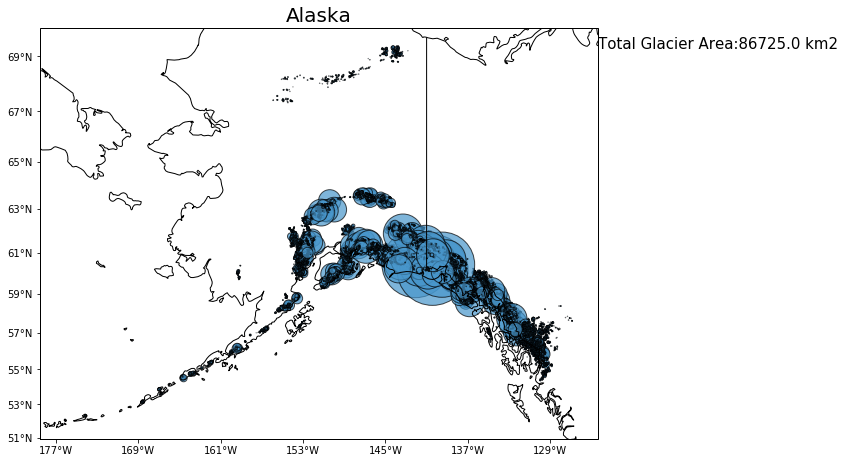

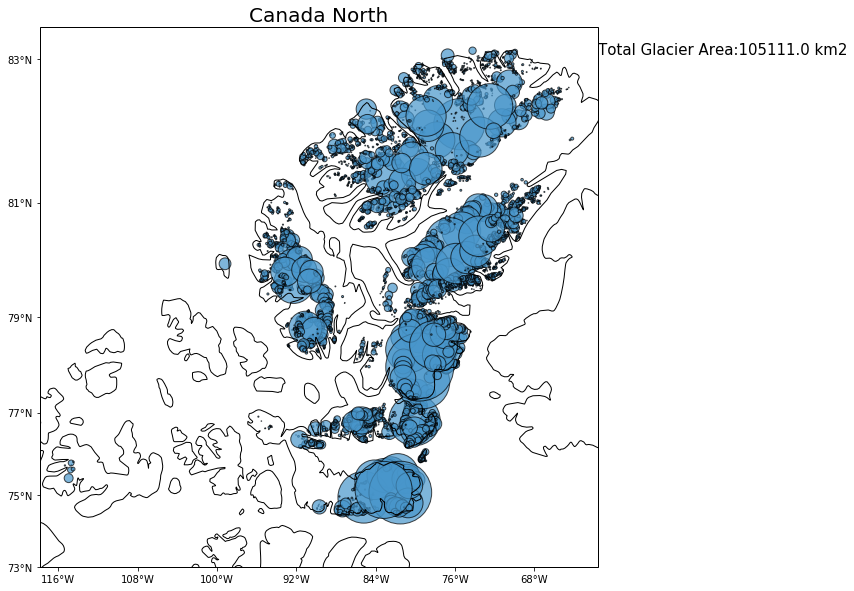

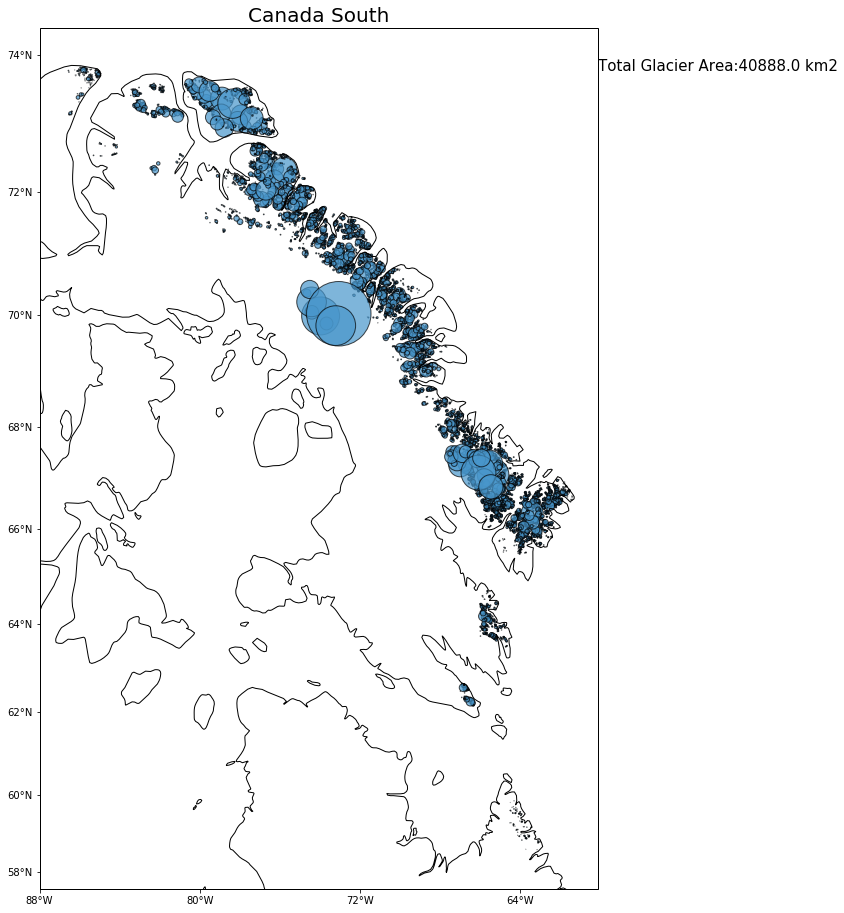

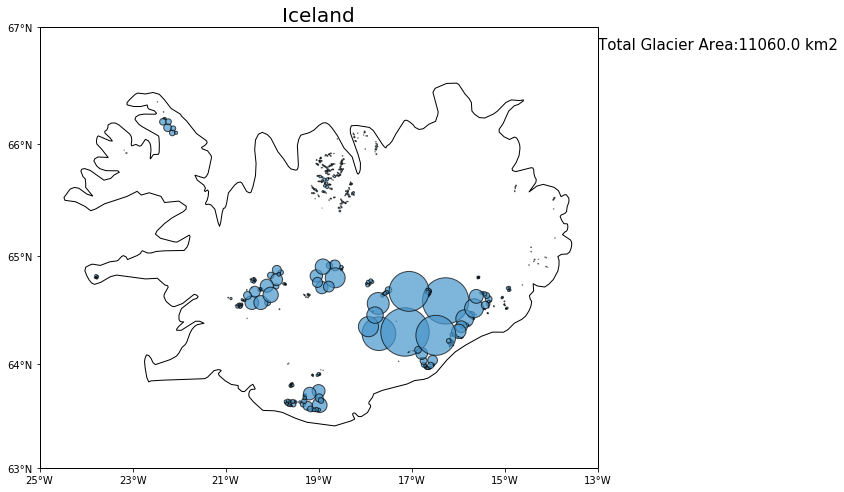

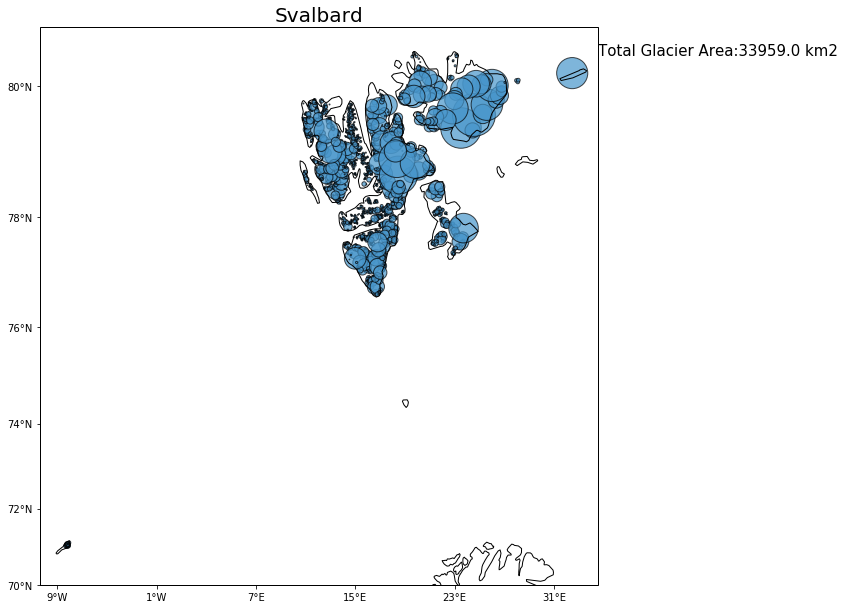

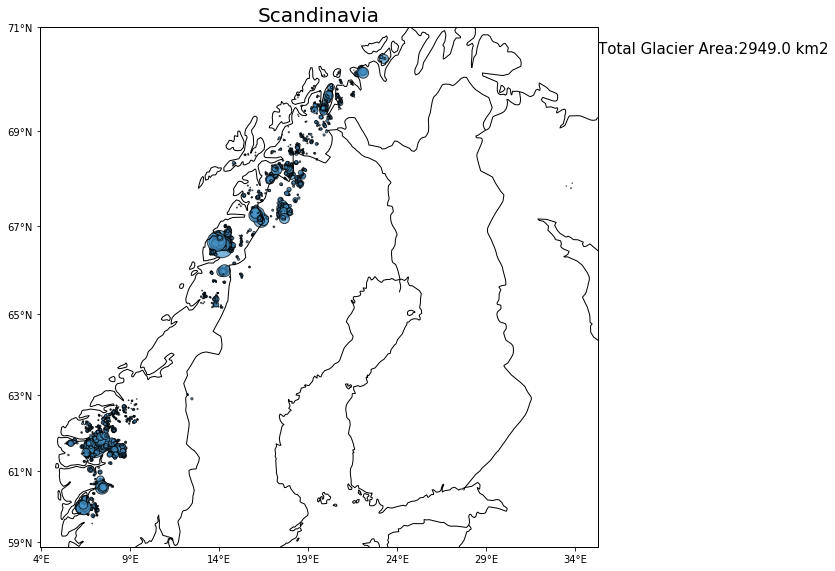

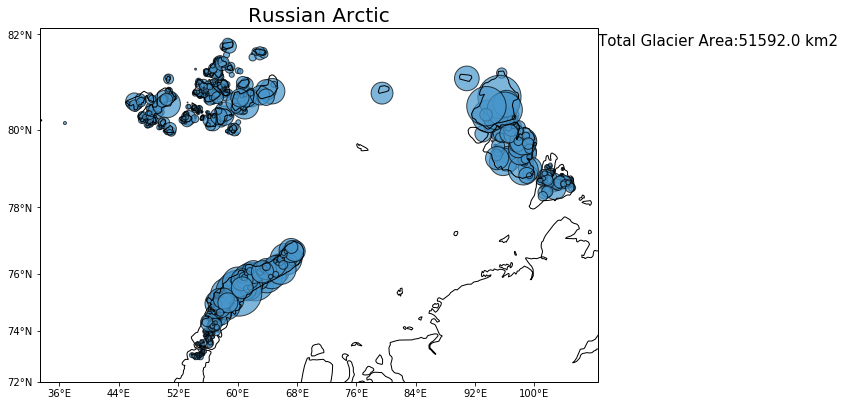

In [8]:
#create objects so that lat/long coordinates can be represented with projection
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()



for x in regions: 
   
    #from the filepath (hyps_fp) list, select file that matches the exact region number 
    temp=pd.read_csv([y for y in dat_fp if '0'+str(x) + '_rgi60' in y][0], encoding='latin')

    #create bounding box for glaciers in each region based on the min and max lat/long of glaciers +/- degree for better visualization 
    east = int(round(temp['CenLon'].min())) - 1
    west = int(round(temp['CenLon'].max())) + 1
    south = int(round(temp['CenLat'].min())) - 1
    north = int(round(temp['CenLat'].max())) + 1

    
      
    #if size of glaciers to be represented by plot, magnitude of each area is x1.5 for better visualization 
    #10x in Scandinavia due to small size of glaciers 
    
    mag=1.5
    
    #specify spread of x and y  (lat/long) ticks on plot 
    if x == 6: 
        xtick=2
        ytick=1
    elif x ==8:
        xtick=5
        ytick=2
        #specifying magnitude of Scandinavia here for space saving 
        mag=10
    else:
        xtick=8
        ytick=2
        
    #create figure object, and add land/border features to map   
    fig, ax=plt.subplots(1,1, figsize=(10,20), subplot_kw={'projection': ccrs.Mercator()})
    ax.add_feature(land_50m)
    ax.add_feature(borders_50m)

    ax.scatter(temp['CenLon'],temp['CenLat'], transform=projection, 
                           s=temp['Area']*mag, alpha=0.7, edgecolor='black', c=colorleg['glacier'])


    #add lat/long boinding boxes     
    ax.set_xticks(np.arange(round(east),round(west)+1,xtick), crs=projection)
    ax.set_yticks(np.arange(round(south),round(north)+1,ytick), crs=projection)

    #convert labels to lat/long 
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_title(regions[x][0],fontdict={'fontsize':20})
    ax.set_title(regions[x][0],fontdict={'fontsize':20})
    ax.text(1,0.95,'Total Glacier Area:'+str(round(np.sum(temp['Area'])))+' km2',transform=ax.transAxes, fontsize=15)
    
    plt.show()

#### 3.1.1.1. Spatial Distribution of Glaciers <a id='RGI_Space'></a>

In Alaska, it is clear that the majority of the glaciers are concentrated on the southern coast. These glaciers are therefore more likely to experience warmer, maritime climate. 

In Arctic Canada North, larger glaciers seem to be closer to the coasts, with a larger number of glaciers concentrated on the eastern coast. Due to the high latitude of these glaciers (>73˚N), the climate is likely to be cold, and dry. 

The glaciers in Arctic Canada South are concentrated towards the eastern coast and seem smaller in comparison to those in Arctic Canada North (the area differences will be quantified later). 

There are comparatively fewer glaciers in Iceland, than in Alaska, or Arctic Canada, and majority of the glacier volume is concentrated to the southeast corner of the island. 

Svalbard is almost entirely covered in glacier ice. It is important to note that as defined by the RGI, the region of Svalbard also includes the island of Jan Mayen (71˚N, 9˚W); this island is far away from mainland Svalbard and has very few glacier data. Therefore, Jan Mayen will be excluded from analysis. 

Glaciers in Scandinavia are smaller than in any other region analyzed. They are predominantly located on the western coast of Norway, experiencing a warm, maritime climate

In the Russian Arctic, there seem to be no noticeable difference in distribution of glaciers among the three main islands. 

From these maps, we can conclude that glaciers in the Arctic vary greatly in size, with glaciers in many regions concentrated on the coast. This concentration is likely because coastal environments are likely to receive more precipitation that would allow for glaciers to exist. Regions with a large number of glaciers further inland likely have colder overall climates, (whether due to altitude or latitude) which allows for glaciers to preserve for a longer period of time even without a large amount of accumulation.  

Now let's look at the distributions of and quantify the glacier area, slope, and [terminus](#terminus) type in each region of interest. We will calculate both the mean and median of each of these variables to determine if there are any outliers in these datasets.

Area


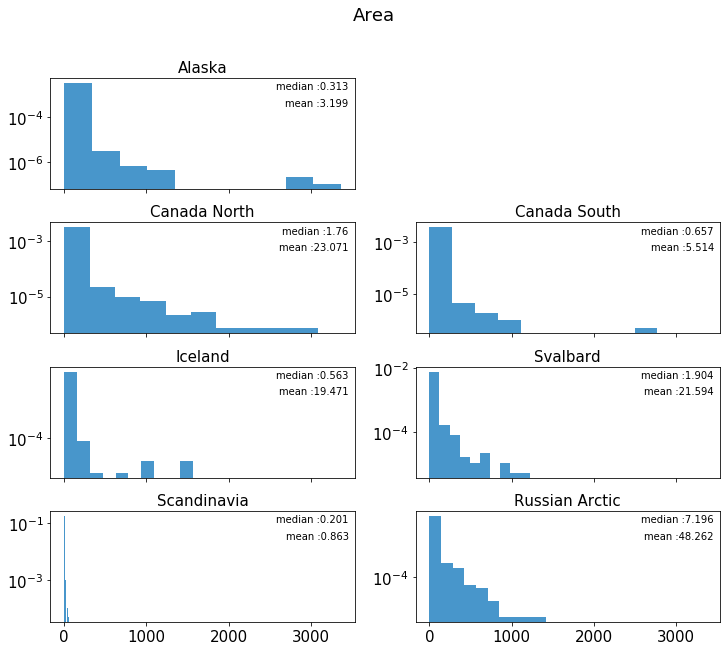

Zmed


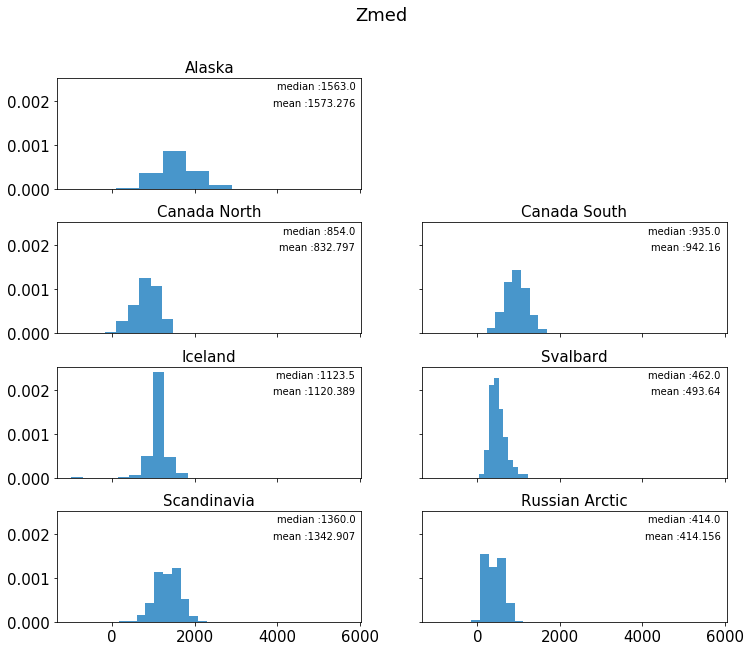

Slope


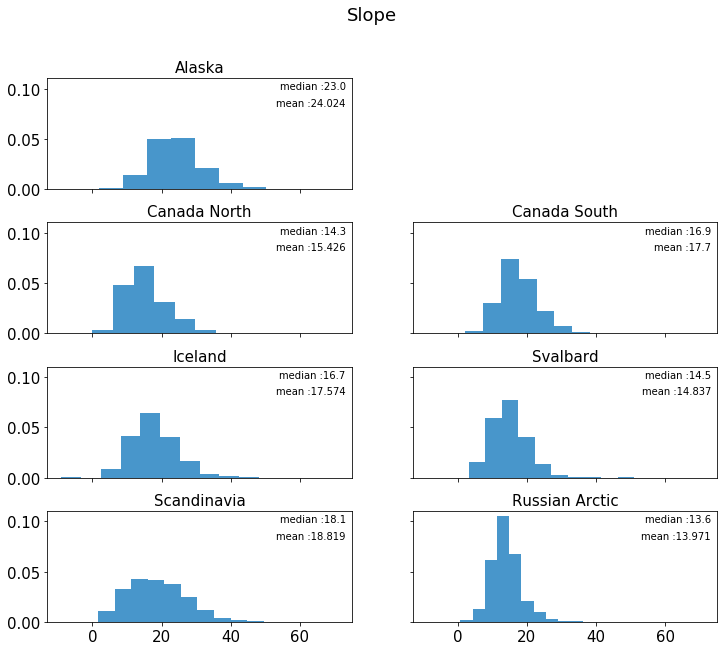

TermType


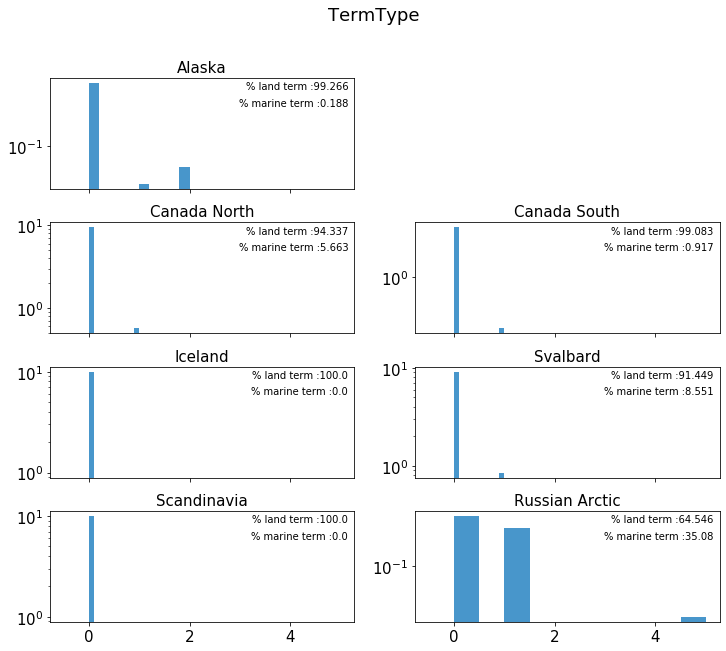

In [9]:
#to avoid too much code repetition, I put the histogram plot code on loop for each feature 
for feat in ['Area','Zmed','Slope','TermType']:  
    print(feat)
    # create subplot figures
    #because the majority of glaciers are small, a region-specific logarithmic scale creates the best visualization for Area
    if feat in ['Area','TermType']:
        logs=True
        fig, ax=plt.subplots(4,2,sharex='all', figsize=(12,10))
    else:
        logs=False
        fig, ax=plt.subplots(4,2,sharex='all', sharey='all', figsize=(12,10))
    fig.subplots_adjust(hspace=0.3,wspace=0.2)
    ax = ax.ravel()
    
    
    #now for each feature, need to populate subplots for each region 
    for counts, x in enumerate(regions): 
        
        #read relevant cvs file from filepath list 
        temp=pd.read_csv([y for y in dat_fp if '0'+str(x) + '_rgi60' in y][0], encoding='latin')


        #because we are not interested in the island of Jan Mayen, the glaciers located there need to be removed from R7. 
        if x == 7: 
            temp=temp.iloc[:1567,:]
        
        #because we have an odd number of plots, want to leave plot 1 empty for better visualization 
        #basically, after plot 0 is populated, skip plot 1 
        if counts >0:
            counts+=1
        ax[counts].hist(temp[feat],density=True, log=logs, color=colorleg['glacier'])
        ax[counts].set_title(regions[x][0], fontdict={'fontsize':15})
        ax[counts].tick_params(axis='both', which='major', labelsize=15)
        # unless feature is termtype, want to print some mean/med
        if feat!='TermType':
            ax[counts].text(0.98,0.9,'median :'+str(round(np.median(temp[feat]),3)), transform=ax[counts].transAxes,
                         horizontalalignment='right')
            ax[counts].text(0.98,0.75,'mean :'+str(round(np.mean(temp[feat]),3)), transform=ax[counts].transAxes,
                         horizontalalignment='right')  
        else: 
            ax[counts].text(0.98,0.9,'% land term :'+str(round((len(temp[feat][temp[feat]==0])/len(temp[feat]))*100,3)), transform=ax[counts].transAxes,
                         horizontalalignment='right')
            ax[counts].text(0.98,0.75,'% marine term :'+str(round((len(temp[feat][temp[feat]==1])/len(temp[feat]))*100,3)), transform=ax[counts].transAxes,
                         horizontalalignment='right')  
    fig.suptitle(feat, fontsize=18)
    #delete plot 1, which is not populated 
    fig.delaxes(ax[1])
    plt.show()

#### 3.1.1.2. Glacier Area <a id='RGI_Area'></a>

According to the median glacier area in each region, Arctic Canada North, Svalbard and the Russian Arctic have the largest glaciers while Iceland and Scandinavia have the smallest glaciers. 

Discrepancy between the relative mean and median values in Arctic Canada South and Iceland (where the mean area is larger than the median relative to the other regions of interest) suggests that these regions are dominated by small glaciers with a small number of large glaciers that account of the majority of the glacier volume. This interpretation appears to be consistent with the maps of these regions plotted above. 

Glaciers that are smaller will respond more quickly to air temperature increase, as more of the total glacier may be exposed to the atmosphere and surface air temperature. Therefore, we can expect that under the same climate conditions, glaciers in Scandinavia would melt more quickly than glaciers in the Russian Arctic because the glaciers in the Scandinavia are smaller.

#### 3.1.1.3. Glacier Altitude <a id='RGI_Alt'></a>

According to the median altitude, glaciers Alaska and Scandinavia are located at the highest altitude, while glaciers in Arctic Canada North, Svalbard, and the Russian Arctic are located at the lowest altitudes. Lack of discrepancy between the mean and median relative altitude suggests that there are not many outliers in glacier altitudes. Glaciers at higher altitudes are likely to experience colder temperatures and less precipitations than glaciers at lower altitudes. 

#### 3.1.1.3 Glacier Slope <a id='RGI_Slope'></a>

Glacier slope is relatively similar across all regions. However, glaciers in Alaska and Scandinavia have slightly steeper slopes in comparison other regions of interest while glaciers in Arctic Canada North and the Russian Arctic have slightly more gradual slopes. A steeper glacier slope may increase how quickly meltwater slides from a glacier. When all else is equal, glaciers with steeper slopes are likely to lose greater amount of mass than glaciers with more gradual slopes. 

#### 3.1.1.4. Glacier Terminus Type  <a id='RGI_Term'></a>

Where a glacier ends may impact how it behaves. More specifically, we are primarily interested in whether glaciers are land-terminating (0) or marine-terminating (1). 

The majority of glaciers in the regions of interest are land-terminating. However, there are a substantial number of glaciers in the Russian Arctic that are marine-terminating (35%). Marine terminating glaciers are subject to calving, where large portions of glacier ice break off the [glacier terminus](#terminus) and become icebergs. 

Glacier calving is difficult to model and predict, as its ties to climate is loose, and instead is driven predominantly by ocean dynamics and stress fractures. Glaciers that are marine-terminating are therefore more difficult to model using climate as an indicator of change.

### 3.1.2. Hypsometry Data <a id='Hyps_Dat'></a>

More detailed information about the area and thickness of each glacier is available at 10 m elevation bands from Huss and Farinotti ([2012](#Huss_2012)). These data are important to more accurate calculation of glacier melt, as temperature will change with altitude. While studies using this dataset may be published, access to the dataset itself must be obtained from Matthias Huss directly. Therefore, we will run and visualize the results through the Jupyter notebook but will not include the file itself. 

Now let's take a look at the files. The Huss hypsometry data are organized by RGI region, so we will once more create a list of relevant filenames.

In [10]:
dat_fp=sorted(glob.glob(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/IceThickness/bands_10/*.csv'))

Let's take a look at the file structure to better understand the data. 

In [11]:
temp=pd.read_csv(dat_fp[0])
print(temp.shape)
print(temp.columns)

(27108, 624)
Index(['RGI-ID', 'Cont_range', '5', '15', '25', '35', '45', '55', '65', '75',
       ...
       '6125', '6135', '6145', '6155', '6165', '6175', '6185', '6195', '6205',
       '6215'],
      dtype='object', length=624)


So the folders are arranged by RGI number, and 10m elevation starting at 5m 

Now let's take a look at the details of each column. 

In [12]:
temp.head()

RGI-ID  Cont_range   5  15    25    35    45    55    65    75  \
0  RGIv6.0.01-00001           0 -99 -99 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
1  RGIv6.0.01-00002           1 -99 -99 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
2  RGIv6.0.01-00003           1 -99 -99 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
3  RGIv6.0.01-00004           0 -99 -99 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
4  RGIv6.0.01-00005           1 -99 -99 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   

     85    95   105   115   125   135   145   155   165   175   185   195  \
0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
1 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
2 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
3 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
4 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   

    205   215   225   235   245   255   265   275   285   295   305   315  \
0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
1 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
2 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
3 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
4 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   

    325   335   345   355   365   375   385   395   405   415   425   435  \
0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
1 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
2 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
3 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
4 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   

    445   455   465   475   485   495   505   515   525   535   545   555  \
0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
1 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
2 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
3 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
4 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   

    565   575   585   595   605   615   625   635   645   655   665   675  \
0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
1 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
2 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
3 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
4 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   

    685   695   705   715   725   735   745   755   765   775   785   795  \
0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
1 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
2 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
3 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
4 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   

    805   815   825   835   845   855   865   875   885   895   905   915  \
0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
1 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
2 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
3 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
4 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   

    925   935   945   955   965   975   985   995  1005  1015  1025  1035  \
0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
1 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0   
2 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.

The data are organized by RGI-ID and area/thickness values are split into 10m elevation bands, starting at 5m. 

As per the PDF file that describe these data, a -99 value indicates there is no glacier mass at the elevation bin in question.

It is important to notice that the RGI ID values are written in a slightly different way in these datasets than in the RGI datasets that we just analyzed, which means that they cannot be matched or joined exactly. This is important to consider when using this dataset for modelling and analytics.

While we have already examined the glacier area and mean glacier altitude in each region, let's look in detail at the glacier volume per elevation band.

Text(2, 0, 'glaier volume (x10$^{3}$ km$^{3}$)')

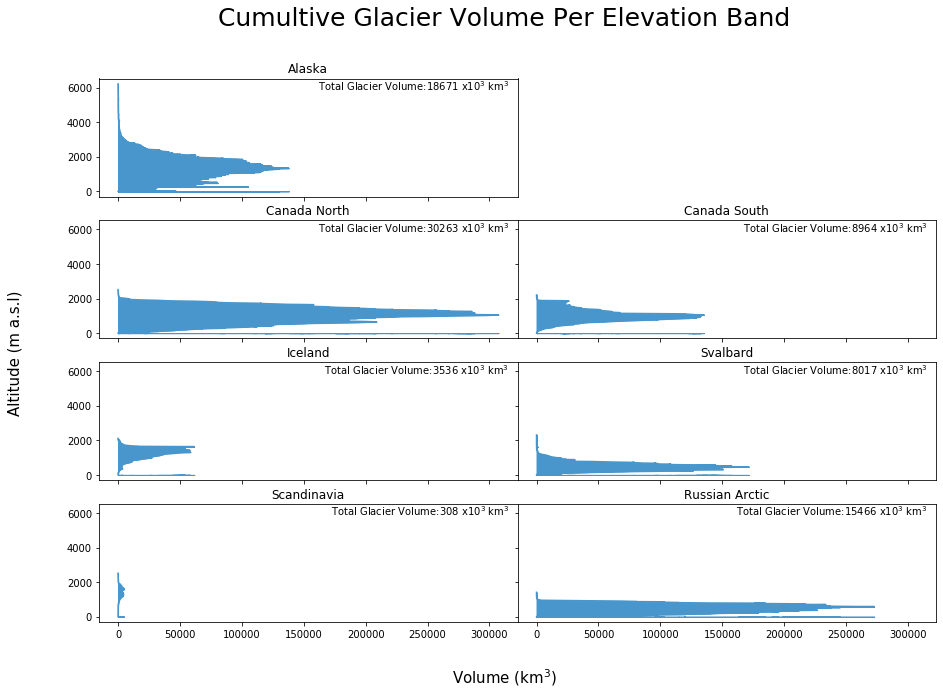

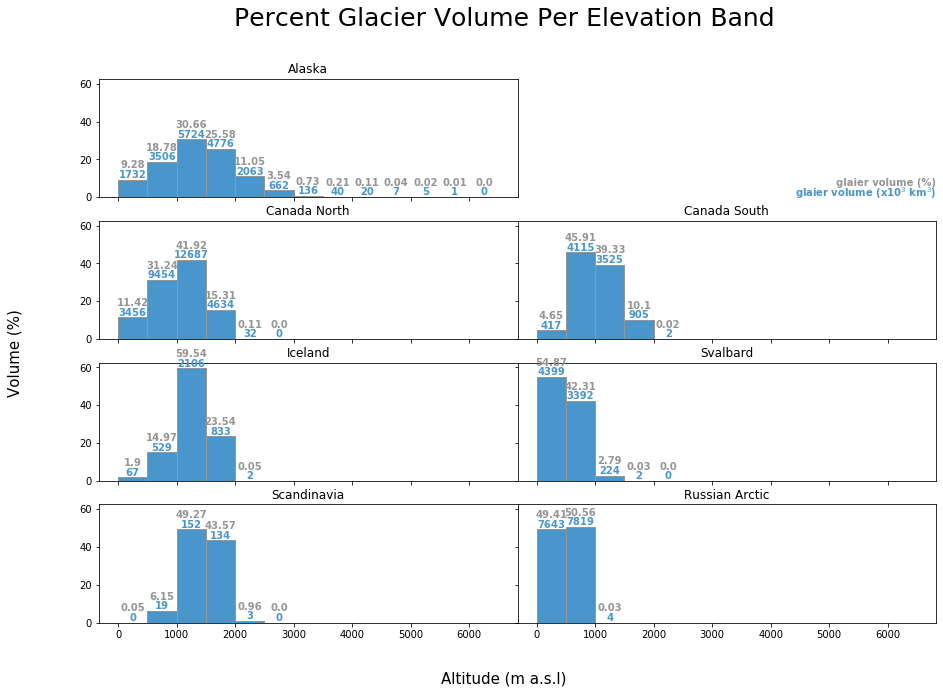

In [13]:
#i want to look at volume in km3 and in % of total volume, so will create 2 plots to do this

fig, ax= plt.subplots(4,2,sharex='all', sharey='all', figsize=(15,10))
fig.subplots_adjust(hspace=0.2,wspace=0) 
ax=ax.ravel()

fig2, ax2= plt.subplots(4,2,sharex='all', sharey='all', figsize=(15,10))
fig2.subplots_adjust(hspace=0.2,wspace=0) 
ax2=ax2.ravel()

#create loop to populate plots in each region 
for counts, x in enumerate(regions):
    
    #pull relevant files from list of filepaths 
    thickness=[y for y in dat_fp if 'thickness_RGI0'+str(x) in y]
    area=[y for y in dat_fp if 'area_RGI0'+str(x) in y]  

    #here we replace the -99 with 0, to indicate that these data points have no ice for numeric calculation
    area=pd.read_csv(area[0]).iloc[:,2:].replace(-99,0)
    thickness=pd.read_csv(thickness[0]).iloc[:,2:].replace(-99,0)

    #calculate volume from thickness and area, and extract altitude 
    volume=area.values*thickness.values
    volume=volume.sum(axis=0)
    alt=area.columns.values.astype(int)
    

    #because we have an odd number of plots, want to leave plot 1 empty for better visualization 
    #basically, after plot 0 is populated, skip plot 1 
    if counts >0:
        counts+=1
        
    ax[counts].plot(volume, alt, c=colorleg['glacier'])
    ax[counts].set_title(regions[x][0])
    ax[counts].fill_between(volume,alt, color=colorleg['glacier'])
    #print total glacier volume on plot 
    ax[counts].text(0.98,0.9,'Total Glacier Volume:' + str(round(sum(volume)/1000))[:-2]+ ' x10$^{3}$ km$^{3}$', transform=ax[counts].transAxes,
                     horizontalalignment='right')
    
    #for percentage, putting data into 500m elevation bins visualizing using barplot
    temp=np.add.reduceat(volume, np.arange(0, len(volume), 50))
    ax2[counts].bar(range(len(temp)),(temp/sum(volume))*100, color=colorleg['glacier'], width=1, align='edge',
                    edgecolor=colorleg['neutral'])
    ax2[counts].set_title(regions[x][0])
    ax2[counts].set_xticklabels([0,0,1000,2000,3000,4000,5000,6000])
    #adding numbers to the barplot for better interpretability 
    for countz, y in enumerate(temp):
        ax2[counts].text(countz+0.5,((y/sum(volume))*100)+6, str(round((y/sum(volume))*100,2)),horizontalalignment='center',
                        c=colorleg['neutral'], fontweight='bold')
        ax2[counts].text(countz+0.5,((y/sum(volume))*100)+1, str(round(y/1000))[:-2],horizontalalignment='center',
                        c=colorleg['glacier'], fontweight='bold')

fig.suptitle('Cumultive Glacier Volume Per Elevation Band', fontsize=25)
fig.text(0.5, 0.04, 'Volume (km$^{3}$)', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Altitude (m a.s.l)', va='center', rotation='vertical', fontsize=15)
#delete plot 1, which is not populated 
fig.delaxes(ax[1])

fig2.suptitle('Percent Glacier Volume Per Elevation Band', fontsize=25)
fig2.text(0.5, 0.04, 'Altitude (m a.s.l)', ha='center', fontsize=15)
fig2.text(0.04, 0.5, 'Volume (%)', va='center', rotation='vertical', fontsize=15)
#delete plot 1, which is not populated 
fig2.delaxes(ax2[1])
ax2[0].text(2,0.1,'glaier volume (%)', ha='right', transform=ax2[0].transAxes, c=colorleg['neutral'],fontweight='bold')
ax2[0].text(2,0,'glaier volume (x10$^{3}$ km$^{3}$)', ha='right', transform=ax2[0].transAxes,c=colorleg['glacier'],fontweight='bold')


These visualizations confirm that glaciers in Alaska reach the highest altitudes overall and contain the largest percentage of total volume above 2000 m a.s.l (~ 15%). Scandinavia has the largest percentage of its total volume above 1500 m a.s.l (~ 45%, in comparison to Alaska's ~ 41%). However, because there is substantially more total glacier volume in Alaska than in Scandinavia, the total glacier volume above 1500 m a.s.l is larger in Alaska. 

The largest percentage of glacier volume in Svalbard and the Russian Arctic (>95%) fall below 1000 m a.s.l, but the Russian Arctic has a more total glacier volume than Svalbard, meaning that more glacier volume will be available for melt at these altitudes in the Russian Arctic than in Svalbard. 

Arctic Canada North and South have a similar distribution of percent glacier volume, with the majority of glacier volume falling between 500-1500 m a.s.l, however, because Arctic Canada North has more glacier volume in total, more glacier volume is available for melt in Arctic Canada North at these altitudes than Arctic Canada South. 

## 3.2. Climate Data <a id='Climate'></a>
Climate reanalysis data used for model input were obtained using the ERA-Interim Climate Reanalysis Product (data for which can be found $\href{https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era-interim}{here}$), provided by the European Centre for Medium-Range Weather Forecasting (ECMRWF). Climate reanalysis data use forecasting models, point data from weather stations, and data assimilation systems to create historical gridded climate predictions at relatively fine temporal (daily) and spatial (~80km) resolution. The ERA-Interim is a third generation [climate reanalysis product](#climate_reanalysis) that spans from 1979 to 2018 ([Berrisford et al., 2011](#Berrisford_2011)).

A number of variables are modelled in the ERA-Interim, but only three are relevant to this project: 
1. 2 m surface air temperature
2. total precipitation
3. pressure level temperature with altitude (the derivative of which is temperature lapse rates) 

The data are extracted and stored in NetCDF files, which can store data in n-d arrays, commonly used to represent spacial data over time. NetCDF files also allow storage of information about each variable. 

Let's load the files and take a look

In [14]:
era_temp=nc.Dataset(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERA_Int/ERAInterim_Temp.nc')
era_prec=nc.Dataset(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERA_Int/ERAInterim_Prec.nc')

Let's now take a look at how the variables are stored. We will use 2 m surface air temperature (era_temp) as an example. 

In [15]:
era_temp.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (361,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: time
 current shape = (473,)
 filling on, default _FillValue of -2147483647 used,
 't2m': <class 'netCDF4._netCDF4.Variable'>
 int16 t2m(time, latitude, longitude)
     scale_factor: 0.0017505931157179397
     add_offset: 256.96055048469213
     _FillValue: -32767
     missing_value: -32767
     units: K
     long_name: 2 metre temperature

The variable era_temp contains three 1-d 'label' arrays (latitude, longitude, time) and one 3-d array  to which the 1-d arrays correspond (2 m air surface temperature over time, across the select latitude and longitude coordinates). We can expect that era_prec (total precipitation) to have the same structure. 

To get a better sense of the average temperature and total precipitation, let's create [circum-Arctic](#circum_Arctic) plots to map these variables.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


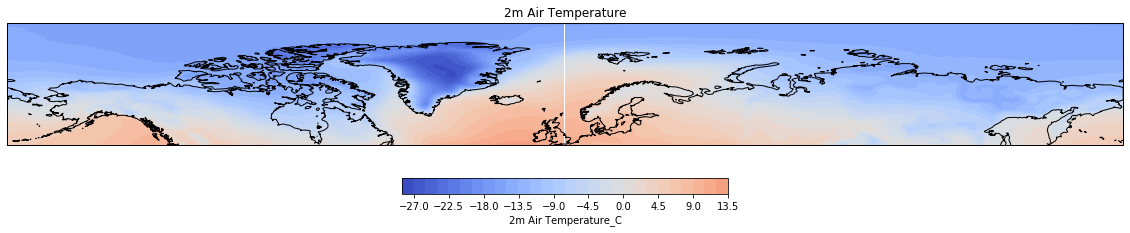

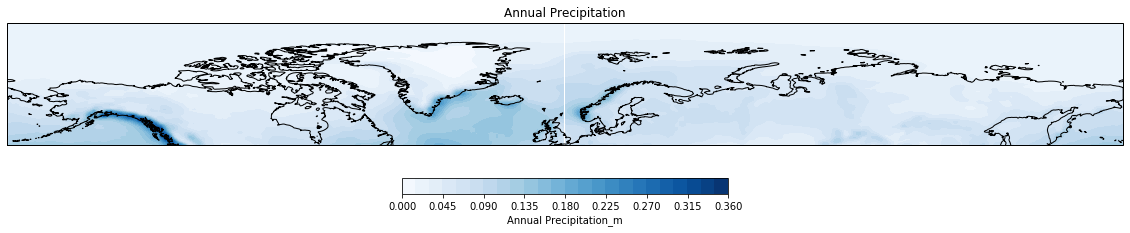

In [16]:
#setting up a dictionary for everything needed to visualize t2m and tp
era_files={
            't2m':[era_temp,'2m Air Temperature','C','coolwarm'],
            'tp':[era_prec,'Annual Precipitation','m','Blues'],
          }

for x in era_files:
    
    #extract latitude, longitude and the relevant variable (tp and t2m)
    latitude=era_files[x][0]['latitude'][:]
    longitude=era_files[x][0]['longitude'][:]
    temp=era_files[x][0][x][:]

    #create bounding boxes for maps; I'm interested in circum-Arctic, so will stop visualization at 50N 
    #because variables are split into ~half degrees, need to calculate what 50N would bound to 
    southlat=int(round((90-50)*(len(latitude)/180)))

    latitude=latitude[:southlat]
    temp=temp[:468,:southlat,:]

    #create monthly means across the entire time period   
    data_set=[]
    for y in list(range(0,int(len(temp)/12))): 
        data_set.append(np.mean(temp[(y*12):(y*12)+12,:,:], axis=0))

    
    #if precipitation (tp) we want the total annual precipitation (therefore sum)
    #if temperature (t2m) we want the mean annual tempperature (therefore mean)
    if x=='tp':
        snap=np.sum(data_set,axis=0)
    else:
        snap=np.mean(data_set, axis=0)
        
    #temperature is provided in K, will convert to C to make easier to read     
    if x=='t2m':
        snap=snap-273.15
        
    #create plot object, define projection and add land features 
    fig, ax=plt.subplots(figsize=(20,15))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(land_50m)
    #to better visualize locaiton of 0C, setting vmin and max values so that 0C falls at the midpoint of colormap
    if x=='t2m':
        cs=ax.contourf(longitude, latitude, snap, 30, vmin=np.amin(snap), 
                       vmax=-np.amin(snap), cmap=era_files[x][3])
    else:
        cs=ax.contourf(longitude, latitude, snap, 30, cmap=era_files[x][3])
    #add colorbars 
    cb = fig.colorbar(cs, fraction=0.02, pad=0.04, orientation='horizontal')
    plt.title(era_files[x][1])
    cb.set_label(era_files[x][1]+'_'+era_files[x][2])
    fig.show()



These visualizations suggest that mean annual temperature > 65 ˚N often falls below 0 ˚C, suggesting that Arctic Canada North, Arctic Canada South, Svalbard, and the Russian Arctic will experience colder temperatures all year and will provide fewer opportunities for glaciers to melt. Precipitation is highest at the coasts, particularly on the coasts of Alaska, Iceland, and Scandinavia, where annual temperatures are above 0 ˚C. These regions will likely receive more precipitation and therefore more accumulation onto the glacier surface.

While these maps provide a good approximation of climate conditions across the [circum-Arctic](#circum_Arctic), it is important to look more closely at glacier-specific climate in our regions of interest. Mean annual temperature and precipitation on each glacier between 1980 and 2017 were extracted from ERA-Interm using PyGEM. Let's take a look at what insights these data can provide.

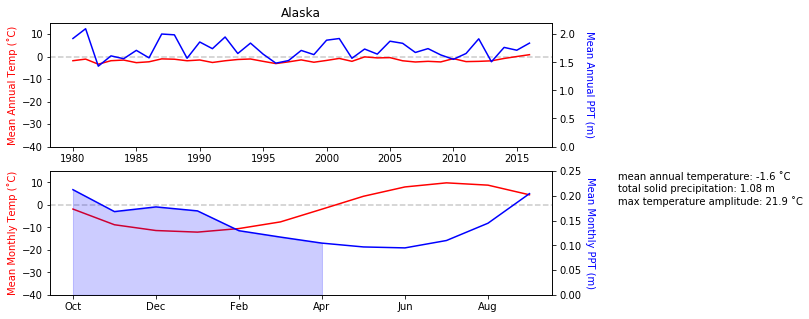

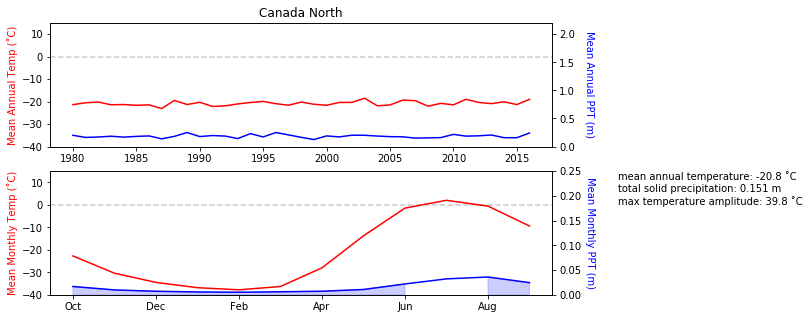

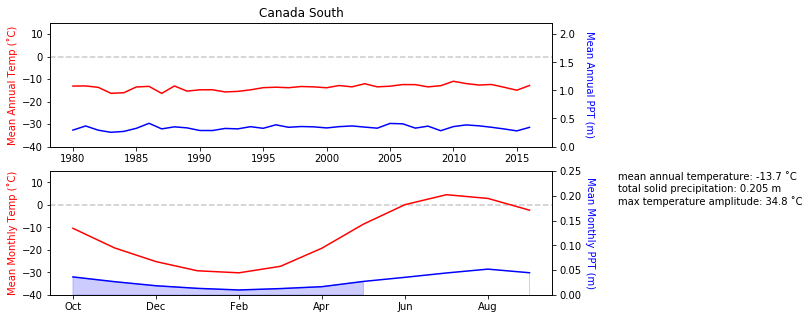

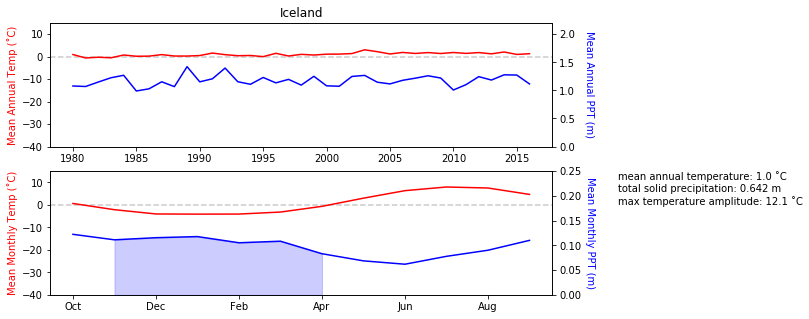

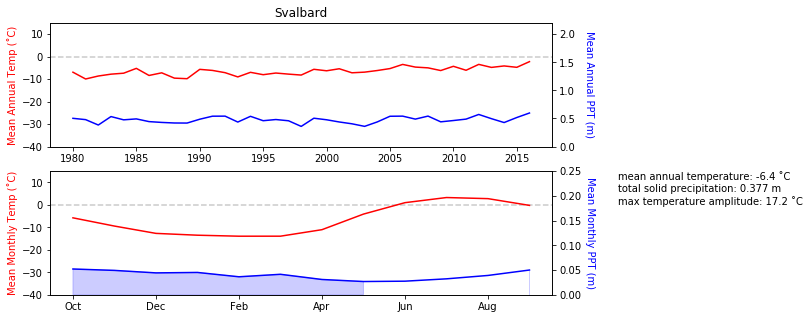

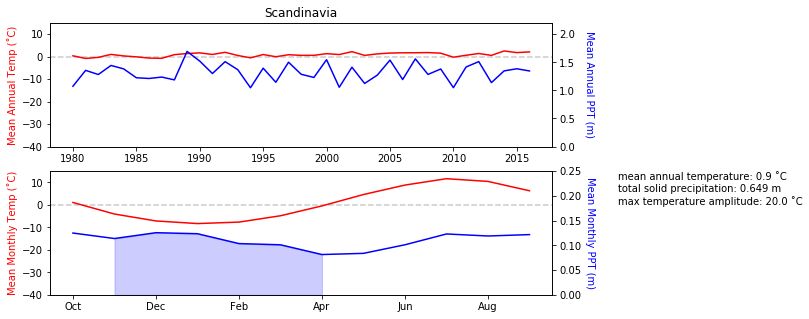

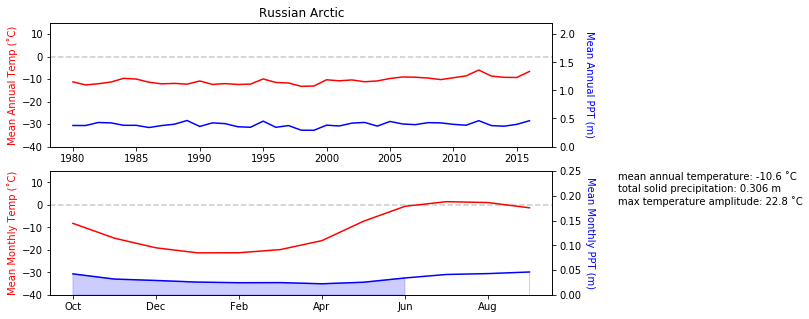

In [17]:
#define years over which simulation was done 
year=list(range(1980,2017))

#loop to create plots for each region 
for x in regions:
    #read csv files 
    subset_temp=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERAInt_Sim_Selection/RGI_0'+str(x)+'_ERA_Int_Glacier_Temp.csv').iloc[:,1:]
    subset_ppt=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERAInt_Sim_Selection/RGI_0'+str(x)+'_ERA_Int_Glacier_PPT.csv').iloc[:,1:]
    
    #calculate annual and monthly mean temp for glaicers across total time period 
    annual_temp=np.mean((np.array(np.mean(subset_temp,axis=0)).reshape(-1,12)),axis=1)
    monthmean_temp=np.mean((np.array(np.mean(subset_temp,axis=0)).reshape(-1,12)),axis=0)
    
    #calculate annual total and monthly total ppt for a single glacier 
    annual_ppt=np.sum((np.array(np.mean(subset_ppt,axis=0)).reshape(-1,12)),axis=1)
    monthsum_ppt=np.mean((np.array(np.mean(subset_ppt,axis=0)).reshape(-1,12)),axis=0)

    #create a figure with 2 plots, one for monthly and one for annual summaries 
    fig, (ax,ax3)= plt.subplots(2,1, figsize=(9,5))

    #create a reference line at which point temp is 0 C
    ax.axhline(0,ls='--',c=colorleg['neutral'],alpha=0.5)
    ax3.axhline(0,ls='--',c=colorleg['neutral'], alpha=0.5)
    ax.plot(year,annual_temp, c=colorleg['temp'])
    ax.set_title(regions[x][0])
    ax.set_ylabel('Mean Annual Temp (˚C)', c=colorleg['temp'])
    #plot precip on a secondary y axis for both plots 
    ax2=ax.twinx()
    ax2.plot(year,annual_ppt, c=colorleg['ppt'])
    ax2.set_ylabel('Mean Annual PPT (m)',c=colorleg['ppt'],rotation=270)
    ax4=ax3.twinx()
    ax4.plot(monthsum_ppt,c=colorleg['ppt'])
    ax3.plot(monthmean_temp, c=colorleg['temp'])
    ax3.set_xticks([0,2,4,6,8,10])
    ax3.set_xticklabels(['Oct','Dec','Feb','Apr','Jun','Aug'])
    ax3.set_ylabel('Mean Monthly Temp (˚C)',c=colorleg['temp'])
    ax4.set_ylabel('Mean Monthly PPT (m)',c=colorleg['ppt'],rotation=270)
    ax4.yaxis.set_label_coords(1.085,0.5)
    ax2.yaxis.set_label_coords(1.085,0.5)
    #setting a universal y limit for both temp and precipitation so plots are comparable against each other 
    ax.set_ylim([-40,15])
    ax3.set_ylim([-40,15])
    ax2.set_ylim([0,2.2])
    ax4.set_ylim([0,0.25])
    #fill precip plots when temp is >0 to indicate that ppt is solid at the time 
    ax4.fill_between(list(range(12)),monthsum_ppt, where=np.array(monthmean_temp<0), color='b',alpha=0.2)
    #create summary stats for each plot 
    ax4.text(1.13,0.93,'mean annual temperature: ' + str(round(np.mean(monthmean_temp),1)) + ' ˚C', 
              horizontalalignment='left', transform=ax4.transAxes)
    ax4.text(1.13,0.83,'total solid precipitation: ' + str(round(np.sum(monthsum_ppt[monthmean_temp<0]),3)) + ' m', 
              horizontalalignment='left', transform=ax4.transAxes)
    ax4.text(1.13,0.73,'max temperature amplitude: ' + str(round(np.max(monthmean_temp)-np.min(monthmean_temp),1)) + ' ˚C', 
              horizontalalignment='left', transform=ax4.transAxes)
    
    plt.show()
    
    

Mean annual temperature on the regions' glaciers is highest in Iceland, followed by Scandinavia, and Alaska (1, 0.9, and -1.6 ˚C, respectively). Iceland, Scandinavia, and Alaska also have the smallest seasonal temperature amplitudes (12.1, 20.0, and 21.9 ˚C, respectively), and the largest total solid precipitation is in these regions as well (0.642, 0.649, and 1.08 m, respectively) over a relatively short [accumulation season](#accumulation_season) (5 months in Scandinavia and Iceland and 6 months in Alaska). These results suggest that the glaciers in Iceland, Scandinavia, and Alaska experience relatively mild climates, don't experience a lot of temperature variability and receive a lot of snow and rainfall.Based on these results, Iceland, Scandinavia, and Alaska are likely to be classified as 'maritime' regions. 

Mean annual temperature on the region's glaciers is lowest in Arctic Canada North, Arctic Canada South, and the Russian Arctic (-20.8, -13.7, and -10.6 ˚C, respectively). These Regions also experience the highest seasonal temperature amplitude (39.8, 34.8, and 22.8 ˚C, respectively). These regions also experience the lowest rates or precipitation (0.151, 0.205, and 0.306 m, respectively) over a relatively long [accumulation season](#accumulation_season) (9, 7, and 8 months in Arctic Canada North, Arctic Canada South, and the Russian Arctic, respectively). These results suggest that Arctic Canada North, Arctic Canada South, and the Russian Arctic are likely to be classified as 'continental' regions. 

Svalbad's climate is in between the maritime and continental regions. The air temperature and precipitation are higher than in the continental regions but lower than in the maritime regions (-6.4 ˚C and 0.377 m, respectively). Svalbard's seasonal temperature amplitude is the second highest of all regions (17.2 ˚C), suggesting that the temperature oscillates at a slightly lower range than in the maritime regions. Because both the temperature and precipitation in Svalbard are closer to the continental rather than maritime regions, Svalbard is also likely classified as 'continental'.

## 3.3. Glacier Mass Balance Data  <a id='Massbal'></a>

Observational glacier mass balance data, used for model calibration, were obtained from the World Glacier Monitoring Service (WGMS), found $\href{https://wgms.ch/data_databaseversions/}{here}$ (v. 2018_06). 

The majority of glacier melt data recorded by the WGMS is either geodetic or glaciological, separated into two different .csv files (D-CHANGE, and EE-MASS-BALANCE, respectively), and both will be used in this project for model calibration. 

Let's take a look at how the geodetic data data are recorded.

In [18]:
geo_dat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-D-CHANGE.csv', encoding='latin')

geo_dat.head()

POLITICAL_UNIT           NAME  SURVEY_ID  WGMS_ID  YEAR  LOWER_BOUND  \
0             AF  UNNAMED 13308      10116    13308  2016         9999   
1             AF  UNNAMED 13310      10118    13310  2016         9999   
2             AF  UNNAMED 13311      10119    13311  2016         9999   
3             AF  UNNAMED 13312      10120    13312  2016         9999   
4             AF  UNNAMED 13582      24806    13582  2010         9999   

   UPPER_BOUND  AREA_SURVEY_YEAR  AREA_CHANGE  AREA_CHANGE_UNC  THICKNESS_CHG  \
0         9999               NaN          NaN              NaN        -5498.0   
1         9999               NaN          NaN              NaN        -5005.0   
2         9999               NaN          NaN              NaN        -5971.0   
3         9999               NaN          NaN              NaN         -531.0   
4         9999             2.141          NaN              NaN        -7276.0   

   THICKNESS_CHG_UNC  VOLUME_CHANGE  VOLUME_CHANGE_UNC  SURVEY_DATE  \
0             5144.0            NaN                NaN   20169999.0   
1             4945.0            NaN                NaN   20169999.0   
2             4819.0            NaN                NaN   20169999.0   
3             5109.0            NaN                NaN   20169999.0   
4             8413.0            NaN                NaN   20100921.0   

  SD_PLATFORM_METHOD  REFERENCE_DATE RD_PLATFORM_METHOD  \
0                 sP      20009999.0                 sP   
1                 sP      20009999.0                 sP   
2                 sP      20009999.0                 sP   
3                 sP      20009999.0                 sP   
4                 sP      20000817.0                 sP   

                      INVESTIGATOR  \
0                       Fanny Brun   
1                       Fanny Brun   
2                       Fanny Brun   
3                       Fanny Brun   
4  Martina Barandun, Robert McNabb   

                                        SPONS_AGENCY  \
0  Univ. Grenoble Alpes, CNRS, IRD, Grenoble INP,...   
1  Univ. Grenoble Alpes, CNRS, IRD, Grenoble INP,...   
2  Univ. Grenoble Alpes, CNRS, IRD, Grenoble INP,...   
3  Univ. Grenoble Alpes, CNRS, IRD, Grenoble INP,...   
4   Department of Geosciences, University of Frib...   

                                           REFERENCE  \
0  Brun et al. (2017); Nature Geoscience, 10(9), ...   
1  Brun et al. (2017); Nature Geoscience, 10(9), ...   
2  Brun et al. (2017); Nature Geoscience, 10(9), ...   
3  Brun et al. (2017); Nature Geoscience, 10(9), ...   
4                                                NaN   

                                             REMARKS  PUB_IN_FOG  PUB_IN_GGCB  \
0  More than 50 000 DEMs were derived from the va...         NaN          NaN   
1  More than 50 000 DEMs were derived from the va...         NaN          NaN   
2  More than 50 000 DEMs were derived from the va...         NaN          NaN   
3  More than 50 000 DEMs were derived from the va...         NaN          NaN   
4  Granule name of the reference/survey DEM: AST_...         NaN          NaN   

  REF_ID  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

Some key observations: 

- Mass balance change is recorded as thickness change and will need to be converted to meters water equivalent (m w.e. for visualization and model processing
- The year in which the measurement was taken is recorded, as is the specific survey and reference date, which provide the month of measurement as well. These will be important in order to convert to water year (October-September), which is used for measurement of mass balance. 
- While there is a Survey and WGMS ID attached to the glacier measurements (as well as the political area in which the glacier is found), there is no RGI ID, which is what PyGEM uses to reference glaciers. This issue will also need to be addressed

Let's take a look at the glaciological data.

In [19]:
glac_dat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-EE-MASS-BALANCE.csv', encoding='latin')

glac_dat.head()

POLITICAL_UNIT              NAME  WGMS_ID  YEAR  LOWER_BOUND  UPPER_BOUND  \
0             AQ          ALBERICH     1062  1972         9999         9999   
1             AQ          ALBERICH     1062  1973         9999         9999   
2             AQ          ALBERICH     1062  1974         9999         9999   
3             AQ          ALBERICH     1062  1975         9999         9999   
4             AQ  ANVERS I ICE CAP     3954  1966         9999         9999   

   AREA  WINTER_BALANCE  WINTER_BALANCE_UNC  SUMMER_BALANCE  \
0  1.36             0.0                 NaN            10.0   
1  1.36             0.0                 NaN            30.0   
2  1.36           -10.0                 NaN             0.0   
3  1.36            10.0                 NaN             0.0   
4   NaN             NaN                 NaN             NaN   

   SUMMER_BALANCE_UNC  ANNUAL_BALANCE  ANNUAL_BALANCE_UNC  \
0                 NaN            20.0                 NaN   
1                 NaN            30.0                 NaN   
2                 NaN           -20.0                 NaN   
3                 NaN            10.0                 NaN   
4                 NaN            44.0                 NaN   

                                             REMARKS  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Multi-annual observation (87 mm w.e.) evenly d...

The glaciological dataset has a similar structure to the geodetic dataset. Here are some key observations: 

- LOWER_BOUND and UPPER_BOUND contain important information in the glaciological dataset, as per the pdf file description; a glacier may have multiple stake measurements the locations of which will be recorded in the LOWER_BOUND and UPPER_BOUND categories, with '9999' indicating mass balance extrapolated across the entire glacier 
- There are both summer and winter balances, but we are only interested in ANNUAL_BALANCE, recorded in mm w.e. 
- While a geodetic datapoint could contain a mass balance measurement that spans multiple years, glaciological measurements will only span a single year. 
- Once more, there is only references to a political unit, glacier name and WGMS ID, and not to an RGI ID, meaning that these glacier measurements will need to be linked to the appropriate RGI glacier numbers. 

The first task will be to create a reference list through which we can link the WGMS IDs in referenced in the mass balance measurements to the RGI IDs, which contain glacier shape and location data. This list will help in determining regional mass balance values and doing analysis of observational glacier data. 

Since there is no RGI ID to indicate glacier region, let's first see how many political regions are present, and whether or not some data can be eliminated for being conclusively outside of our regions of interest.

In [20]:
print(set(list(geo_dat['POLITICAL_UNIT'])+list(glac_dat['POLITICAL_UNIT'])))

{'ID', 'FR', 'NZ', 'IN', 'PE', 'KZ', 'KG', 'MX', 'CN', 'CL', 'VE', 'KE', 'GS', 'AQ', 'HM', 'TJ', 'CO', 'CH', 'IT', 'EC', 'BO', 'UZ', 'CA', 'IR', 'MM', 'IS', 'PK', 'GE', 'JP', 'AT', 'SE', 'GL', 'SJ', 'NO', 'RU', 'BT', 'NP', 'ES', 'SI', 'TZ', 'US', 'PL', 'DE', 'AR', 'AF'}


The RGI regions of interest are encompassed by: Canada (CA), the United States (US), Iceland (IS), Sweden (SE), Norway (NO), Svalbard (SJ), and Russia (RU). While not all of the glaciers in these political regions are within the RGI regions of interest, we can at least start off by eliminating data from glaciers definitely not within the RGI regions of interest.

In addition, since we are only interested in mass balance interpolated over the entire glacier, we will eliminate glaciological data in which the UPPER_BOUND and LOWER_BOUND values are anything other than 9999.

In [21]:
#doing it in multiple steps to avoid ambiguity 
geo_dat=geo_dat.loc[geo_dat['POLITICAL_UNIT'].isin(['CA','IS','NO','RU','SE','SJ','US'])]
glac_dat=glac_dat.loc[glac_dat['POLITICAL_UNIT'].isin(['CA','IS','NO','RU','SE','SJ','US'])]
glac_dat=glac_dat[(glac_dat['UPPER_BOUND'] == 9999)&(glac_dat['LOWER_BOUND'] == 9999)]

If a glacier has multiple measurements, it will be referenced multiple times within these datasets. Therefore, we am interested in identifying the number of unique glaciers which require matching. Luckily all the glaciers in the WGMS dataset have a WGMS ID which can be used for such identification.  

In [22]:
id_dict=pd.Series(np.unique(np.concatenate([geo_dat['WGMS_ID'].unique(),glac_dat['WGMS_ID'].unique()]))).rename('WGMS_ID')

print(id_dict.nunique())

4531


There are ~ 4500 unique glaciers with observational mass balance measurements that may be located in our regions of interest. These are the glaciers for which we will a WGMS-RGI ID reference list. 

To achieve this, we will gather supplementary identification data provided by the WGMS. The WGMS provides a reference files which include latitude/longitude data, RGI IDs and GLIMS IDs (an identification id provided by the same organization as the RGI ID). 

In [23]:
glac_id=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-AA-GLACIER-ID-LUT.csv', encoding='latin')
glac_loc=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-A-GLACIER.csv', encoding='latin')

#merge files so that id_dict has lat/long and all available ids 
id_dict=pd.merge(id_dict, glac_id[['WGMS_ID','GLIMS_ID','RGI_ID']], on='WGMS_ID', how='left')
id_dict=pd.merge(id_dict, glac_loc[['WGMS_ID','LATITUDE','LONGITUDE']], on='WGMS_ID', how='left')

id_dict.head()

WGMS_ID        GLIMS_ID          RGI_ID  LATITUDE  LONGITUDE
0        0  G269123E79515N  RGI60-03.04539  79.45000  -90.69500
1        1             NaN  RGI50-03.00840  79.44158  -90.95778
2        3             NaN             NaN  59.73000 -136.68000
3        7             NaN             NaN  52.19500 -117.25000
4        8             NaN             NaN  52.14000 -117.19000

--- 
**NOTE ON HOW TO READ RGI IDS:**

RGI06-07.04982

RGI: indicates which identification guide the id belongs to, all RGI ID numbers will start with this 

60: indicates which RGI dataset version the number belongs to; 60 indicates v. 6

07: indicates which RGI region (from 1 to 19) the glacier belongs to 

04682: the 5-digit glacier identification number, unique to the glacier in that region 

---

It is immediately apparent that neither the RGI nor the GLIMS ID field are complete, meaning that we will be unable to link all these glaciers to their RGI IDs through looking at this list alone. But, let's investigate what can be done. 

Let's see how many WGMS ID values are linked to either GLIMS or RGI IDs.

In [24]:
print(id_dict['RGI_ID'].nunique())
print(id_dict['GLIMS_ID'].nunique())

3177
2203


It looks like ~ 3K of the glaciers have RGI IDs, while only ~ 2K have GLIMS IDs. There seems to be a problem, however, with some of the RGI IDs. If we look at the RGI ID in rows 1 and 2 of the id_dict.head() output, we can see that these glaciers reference a different version of the RGI (v. 5 vs 6). RGI50 data are outdated and PyGEM works exclusively with RGI60 data. Unfortunately, because glaciers are dynamic and may emerge, disappear, merge, split, etc. we cannot simply assume that the glacier numbers will remain the same across versions. Therefore, glaciers with RGI50 identification numbers have to be treated as if they do not have an RGI ID number at all. 

Let's see how many glaciers have RGI50 values.

In [25]:
sum(id_dict['RGI_ID'].apply(lambda x:'RGI50' in str(x)))

344

We lose >300 values due to version discrepancy. 

In summary, we have ~ 2800 RGI60 IDs, and ~ 2200 GLIMS IDs. However, this does not mean we have identification for 5000 unique glaciers, as both an RGI and GLIMS ID may be attached to a single glacier. Let's see how many glaciers have either RGI or GLIMS values, through which we can link the mass balance measurements with the area/volume information of the RGI. 

In [26]:
len(id_dict['WGMS_ID'][(id_dict['GLIMS_ID'].isnull())|(id_dict['RGI_ID'].apply(lambda x:'RGI60' in str(x)))] )

3752

Out of the ~ 4500 WGMS-identified glaciers, ~ 3700 are likely to be connected to an RGI counterpart. However, we can still attempt to match glaciers without either an RGI or GLIMS IDs thorough latitude and longitude coordinates.

In [27]:
#here we attempt to match all of the WGM ID values in our ID dataset to a RGI ID 

#first, will compile RGI Ids provided by the RGI along with the GLIMS and lat/long data into one list 
rgi=pd.DataFrame()
for x in regions:
    rgi=rgi.append(pd.read_csv(glob.glob(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI/00_rgi60_attribs/'+'0'+str(x)+'*.csv')[0],encoding='latin'))
    
rgi60=rgi[['RGIId','O1Region','GLIMSId','CenLat','CenLon']].reset_index(drop=True)

#now will try to compare the complied RGI dataset with my ID dataset 
#will do counts manually to have an indication of how many successful matches we obtained 
counts=0
for x in range(len(id_dict)):
    #if id dict is null OR rgi 5, will try to match with RGI 6
    if pd.isnull(id_dict['RGI_ID'][x]) or id_dict['RGI_ID'][x].split('-')[0]=='RGI50':
        #first try to match with GLIMS ID
        try: 
            id_dict.loc[x, 'RGI_ID']=rgi60['RGIId'][rgi60['GLIMSId']==id_dict['GLIMS_ID'][x]].values[0]
            counts+=1
        #if cannot do GLIMS ID, try with lat/long matching 
        except:
            try: 
                #calculate (and sum) the sum and difference of lat/long
                latlon_diff=pd.Series(abs(np.diff(rgi60[['CenLat','CenLon']], axis=1)-np.diff(id_dict.iloc[x][['LATITUDE','LONGITUDE']]))[:,0]).astype(float)
                latlon_sums=abs(np.sum(abs(rgi60[['CenLat','CenLon']]), axis=1)-np.sum(abs(id_dict.iloc[x][['LATITUDE','LONGITUDE']])))
                latlon_analysis=latlon_diff+latlon_sums
                diff=rgi60[latlon_analysis<=0.004]
                #if value is <assigned threshold, will create a match 
                if len(diff)!=0:
                    #will get settingwithcopy warning on creating an new column here 
                    diff['val']=latlon_diff[latlon_diff<=0.004]
                    diff=diff[diff['val']==min(diff['val'])]
                    id_dict.loc[x, 'RGI_ID']=diff['RGIId'].values[0]
                    counts+=1
                #otherwise, cannot match and therefore cannot use mesurement, populate with nan instead 
                else: 
                    id_dict.loc[x, 'RGI_ID']=np.nan
            except :
                id_dict.loc[x, 'RGI_ID']=np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
id_dict['RGI_ID'].notnull().sum()

4033

In the end, we are able to successfully identify 4033 glaciers from their WGMS IDs. Not all of these glaciers are necessarily in our regions of interest, however. Let's separate the glaciers by region number, and isolate only the glaciers that are in our regions of interest.

In [29]:
#drop nan values on RGI_ID
id_dict=id_dict.dropna(subset=['RGI_ID'])

#seperate RGI_ID to identify glacier and region number individually 
id_dict['REGION_NO']=id_dict['RGI_ID'].apply(lambda x: int(x.split('-')[1].split('.')[0]))
id_dict['GLAC_NO']=id_dict['RGI_ID'].apply(lambda x: int(x.split('-')[1].split('.')[1]))

#now that we know which regions each glacier belongs to, we can remove regions we are not interested in 
id_dict=id_dict[id_dict['REGION_NO'].apply(lambda x: x in regions)]

#comapre unique rgi vs wgms id 
print('# unique RGI_ID: ',id_dict['RGI_ID'].nunique())
print('# of WGMS ID: ',len(id_dict))

#drop duplicate RGI ID 
id_dict=id_dict.drop_duplicates(subset=['RGI_ID'])
print(len(id_dict))

# unique RGI_ID:  3905
# of WGMS ID:  4032
3905


It looks like ~ 100 glaciers with unique WGMS IDs are classified as the same glacier by the RGI. Otherwise, only one glacier was not in our region of interest.

To reduce the chance of an unwanted glacier sneaking into our list due to input error (i.e. RGI ID indicates that it is in Alaska, but it is actually in New Zealand), let's confine our list by the max/min latitude and longitude of glaciers in each RGI-defined glacier area.

In [30]:
temp2=[]
# for each region, constrain by the min and max lat/long of RGI-identified glaciers for that region
for x in regions: 
    temp=rgi60[['CenLat','CenLon']][rgi60['O1Region']==x]
    temp3=id_dict[id_dict['REGION_NO']==x]
    temp2.append(temp3[(temp3['LATITUDE']>min(temp['CenLat']))&(temp3['LATITUDE']<max(temp['CenLat']))
              &(temp3['LONGITUDE']>min(temp['CenLon']))&(temp3['LONGITUDE']<max(temp['CenLon']))])
id_dict=pd.DataFrame(np.concatenate(temp2), columns=id_dict.columns)

In [31]:
id_dict['RGI_ID'].nunique()

3853

Great! It looks like we were able to remove ~ 40 mislabeled glaciers. 

Now let's merge relevant id data to our glaciological and geodetic mass balance datasets to conduct a some analysis. 

In [32]:
#create geodetic and glaciological datasets with all relevant info 
geo_change=pd.merge(geo_dat[['WGMS_ID','THICKNESS_CHG','THICKNESS_CHG_UNC','YEAR','SURVEY_DATE','REFERENCE_DATE']],
                    id_dict[['WGMS_ID','RGI_ID','REGION_NO','GLAC_NO']], on='WGMS_ID',how='inner')
glac_change=pd.merge(glac_dat[['WGMS_ID','YEAR','ANNUAL_BALANCE','ANNUAL_BALANCE_UNC']],
                     id_dict[['WGMS_ID','RGI_ID','REGION_NO','GLAC_NO']], on='WGMS_ID',how='inner')

geo_change.head()

WGMS_ID  THICKNESS_CHG  THICKNESS_CHG_UNC  YEAR  SURVEY_DATE  \
0      48        -2030.0             3570.0  2007   20070821.0   
1      48        -2190.0             1230.0  2008   20080729.0   
2      48        -2506.0             1704.0  2008   20089999.0   
3      48        -2024.0              627.0  2009   20099999.0   
4      48        -1760.0              390.0  2009   20090815.0   

   REFERENCE_DATE          RGI_ID REGION_NO GLAC_NO  
0      20000803.0  RGI60-04.07381         4    7381  
1      20050815.0  RGI60-04.07381         4    7381  
2      20059999.0  RGI60-04.07381         4    7381  
3      20089999.0  RGI60-04.07381         4    7381  
4      20080815.0  RGI60-04.07381         4    7381

In [33]:
glac_change.head()

WGMS_ID  YEAR  ANNUAL_BALANCE  ANNUAL_BALANCE_UNC          RGI_ID REGION_NO  \
0      48  1982           109.0                 NaN  RGI60-04.07381         4   
1      48  1983            96.0                 NaN  RGI60-04.07381         4   
2      48  1984          -775.0                 NaN  RGI60-04.07381         4   
3      32  1979          -500.0                 NaN  RGI60-01.05379         1   
4      32  1980          -520.0                 NaN  RGI60-01.05379         1   

  GLAC_NO  
0    7381  
1    7381  
2    7381  
3    5379  
4    5379

These look good. 

There are now only a few final caveats need to be addressed. 

As mentioned previously, mass balance is measured in 'water years' rather than calendar years (October-September). While glaciological data is automatically input with this in mind, we need to make sure that the survey and reference years in the geodetic dataset are reflective of this. We can use the dates of measurement referenced in SURVEY_DATE and REFERENCE_DATE for this process.

In [34]:
#isolate survey month and determine if the year needs to be changed (if oct or later)
#dropping where surviey date is not properly recorded 
surv_month=geo_change['SURVEY_DATE'].dropna().apply(lambda x: int(str(int(x))[4:6])) 
surv_month=surv_month[surv_month <=12][surv_month >=10].index
geo_change.YEAR.iloc[surv_month]+=1

#will get settingwithcopywarning here bc acting on existing dataframe; this is fine 
geo_change['REF_YEAR']=geo_change['REFERENCE_DATE'].dropna().apply(lambda x: int(str(int(x))[:4])) 

#isolate ref month and do the same 
surv_month=geo_change['REFERENCE_DATE'].dropna().apply(lambda x: int(str(int(x))[4:6])) 
surv_month=surv_month[(surv_month <=12)&(surv_month >=10)].index
geo_change.REF_YEAR.iloc[surv_month]+=1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Finally, we need to change the measurement units from thickness change (in mm) and mm w.e. into m w.e. in the geodetic dataset and glaciological datasets, respectively. 

To convert the glaciological data from mm w.e. to m w.e. just requires a division by 1000. To convert the geodetic data from height in mm to m w.e. just requires multiplication by 0.0009.

___
**CONVERTING THICKNESS TO M W.E.**

To convert thickness change in mm to m w.e., we will need to use the following logic.

As per (Cogley, 2011):

$ 1\; m\; w.e. = \frac{1000\;kg\;m^{-2}}{ρ_{w}} $

in which $ρ_{w}$ is the density of water in kg m$^{-3}$ (we can use 1000 kg m$^{-3}$). Therefore, if we know the mass of snow/ice per unit area in kg we can determine the mass balance in m w.e. 

We can calculate mass using: 

$ mass=volume•ρ_{s} $

such that: 

$ kg=m^{3}•kg\;m^{-3} $

in which $ρ_{s}$ is the density of snow/ice (we can use kg m$^{-3}$). 

Volume can be calculated using: 

$ volume=height•area $

such that: 

$ m^{3}=m•m^{2}$

We have the height change! So we can plug these variables into the first equation to get: 

$ m\;w.e.= \frac{1000•height•area•ρ_{s}•area^{-1}}{ρ_{w}} $

such that: 

$ m\; w.e. =\frac{1000•m•m^{2}•kg\;m^{-3}•m^{-2}}{kg\;m^{-3}} $

We can cancel out the unit area measurement, $ρ_{s}$=900, and $ρ_{w}$=1000, so the equation simplifies to: 

$ m\;w.e.= height•0.9 $

Because our height is in mm, we have to divide it by 1000 before multiplying by 0.9, thereby simplifying the equation even further to when height is measured in mm: 

___

In [35]:
#we will need total area/no glaciers referenced for each measurement in the next secion, so we will link it here 
#start by importing summary stats from rgi
rgi_stat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI/00_rgi60_summary.csv', skiprows=[0]).iloc[:21,:]
#strip columns of extra spaces and clean up data for merge 
rgi_stat.columns=rgi_stat.columns.map(lambda x: x.strip())
rgi_stat=rgi_stat.dropna(subset=['O1'])
rgi_stat[['O1','Count','Area']]=rgi_stat[['O1','Count','Area']].astype(int)
rgi_stat.rename(columns={'Area':'Total_Area','O1':'O1Region'}, inplace=True)

#merge data 
rgi=pd.merge(rgi, rgi_stat[['O1Region','Count','Total_Area']], on='O1Region', how='left')

#calculate geo mass bal
geo_change['THICKNESS_CHG']=(geo_change['THICKNESS_CHG']/1000)*0.9
geo_change=pd.merge(geo_change,rgi[['RGIId','Area']], left_on='RGI_ID',right_on='RGIId',how='left')
#geo_change=geo_change.dropna(subset=['REF_YEAR']) #???? 
geo_change_mass=geo_change[['RGI_ID','REF_YEAR','YEAR','THICKNESS_CHG','Area']].rename(columns={'THICKNESS_CHG':'MASSBAL'}).dropna(subset=['MASSBAL'])

#calcualte glac mass bal
glac_change['ANNUAL_BALANCE']=glac_change['ANNUAL_BALANCE']/1000
glac_change=glac_change.dropna(subset=['ANNUAL_BALANCE'])
glac_change=pd.merge(glac_change,rgi[['RGIId','Area']], left_on='RGI_ID',right_on='RGIId',how='left')

#merge for easier processing in the next step, updated due to dropping unrecorded survey dates
review_RGI=pd.DataFrame(pd.concat([geo_change_mass['RGI_ID'],glac_change['RGI_ID']]).unique()).rename(columns={0:'RGI_ID'})
review_RGI['REGION_NO']=review_RGI['RGI_ID'].apply(lambda x: int(x.split('-')[1].split('.')[0]))  

geo_change.head()


WGMS_ID  THICKNESS_CHG  THICKNESS_CHG_UNC  YEAR  SURVEY_DATE  \
0      48        -1.8270             3570.0  2007   20070821.0   
1      48        -1.9710             1230.0  2008   20080729.0   
2      48        -2.2554             1704.0  2008   20089999.0   
3      48        -1.8216              627.0  2009   20099999.0   
4      48        -1.5840              390.0  2009   20090815.0   

   REFERENCE_DATE          RGI_ID REGION_NO GLAC_NO  REF_YEAR           RGIId  \
0      20000803.0  RGI60-04.07381         4    7381    2000.0  RGI60-04.07381   
1      20050815.0  RGI60-04.07381         4    7381    2005.0  RGI60-04.07381   
2      20059999.0  RGI60-04.07381         4    7381    2005.0  RGI60-04.07381   
3      20089999.0  RGI60-04.07381         4    7381    2008.0  RGI60-04.07381   
4      20080815.0  RGI60-04.07381         4    7381    2008.0  RGI60-04.07381   

    Area  
0  0.503  
1  0.503  
2  0.503  
3  0.503  
4  0.503

In [36]:
glac_change.head()

WGMS_ID  YEAR  ANNUAL_BALANCE  ANNUAL_BALANCE_UNC          RGI_ID REGION_NO  \
0      48  1982           0.109                 NaN  RGI60-04.07381         4   
1      48  1983           0.096                 NaN  RGI60-04.07381         4   
2      48  1984          -0.775                 NaN  RGI60-04.07381         4   
3      32  1979          -0.500                 NaN  RGI60-01.05379         1   
4      32  1980          -0.520                 NaN  RGI60-01.05379         1   

  GLAC_NO           RGIId   Area  
0    7381  RGI60-04.07381  0.503  
1    7381  RGI60-04.07381  0.503  
2    7381  RGI60-04.07381  0.503  
3    5379  RGI60-01.05379  0.145  
4    5379  RGI60-01.05379  0.145

Now that we have the mass balance in m.w.e., the RGI ID, the glacier area, and the years over which measurement is taken, let's try determine annual regional mass balance using available glacier data between 1960 and 2018 (1960 is simply chosen for visualization purposes as the majority of glaciological mass balance datasets start around that time period). 

Because glaciers are different sizes, we need to weigh them by their respective areas to determine [specific mass balance](#specific_massbal). To get a better understanding of both the glaciological and geodetic datasets, we want to be able to visualize the glaciological and geodetic data individually and as a combined regional [specific mass balance](#specific_massbal) for each region.

In [37]:
#will make 3 seperate datasets: for geodetic, glaciological, and combined mass balance 
geo_final=[]
glac_final=[]
full_final=[]  

#will loop by regions 
for reg in regions: 

    #create region-specific lists that will hold all measurements for geo, glac, and all measurements per region \
    #easier to do per region because regional area needs to be taken into account 
    geo_array=[]
    glac_array=[]
    full_array=[]                      


    #identify all glaciers with measurements for the region currently being looped 
    REG_RGI=review_RGI[review_RGI['REGION_NO']==reg]

    #Select specific RGI ID 
    for x in REG_RGI['RGI_ID']: 
        print(x)
        #create RGI ID specific-lists that will hold all measurements available for RGI ID 
        temp_array=[]
        geo_temp_array=[]
        glac_temp_array=[]
        #check if the RGI ID selected is present in the geo dataset 
        if x in geo_change_mass['RGI_ID'].values: 
            temp_full=geo_change_mass[geo_change_mass['RGI_ID']==x]
            #if it is present, need to generate an array that divides geo mass bal per year
            #will loop through every unique geodetic measurement 
            for y in range(len(temp_full)): 
                temp_y=temp_full.iloc[y]
                #make a list spanned by the measurement 
                ranges=list(range(int(temp_y['REF_YEAR']),temp_y['YEAR']))
                #make an array of the years, and the geo measurement divided by number of years 
                temp=np.array([ranges, np.full(len(ranges), temp_y['MASSBAL']/len(ranges)),
                               np.full(len(ranges), temp_y['Area'])]).transpose()
                #append this for both the geo array and array for all data 
                temp_array.append(temp)
                geo_temp_array.append(temp)
            
            #we can append the geo region-array with all the processed measurements for the unique RGI ID 
            #for the full list (temp_array), we will need to wait to see if the RGI ID has glaciological data
            geo_array.append(np.array(pd.DataFrame(np.concatenate(geo_temp_array,axis=0))
                                      .groupby(by=0, as_index=False).mean()))

        #see if selected RGI ID has glaciological data 
        if x in glac_change['RGI_ID'].values: 
            #if so, just select the columns of interest and append to both full and glac arrays for this RGI number 
            #glac data structure does not require more work than that 
            temp=np.array(glac_change[glac_change['RGI_ID']==x][['YEAR','ANNUAL_BALANCE','Area']])
            glac_array.append(temp)
            temp_array.append(temp)

        #for each glacier, can only have one measurement per year
        #if multiple measurements per year for each glacier (i.e. one from glac, one from geo), need to average
        test2=pd.DataFrame(np.concatenate(temp_array,axis=0)).groupby(by=0, as_index=False).mean()
        #append to region-specific list 
        full_array.append(np.array(test2))


    #for full_array, geo_array, and glac_array, the processing steps are documented below: 
    
    #convert list of lists into dataframe 
    full_array=pd.DataFrame(np.concatenate(full_array,axis=0))
    #calculate the total area that has obs data for the year 
    full_array_sum=full_array.groupby(by=0,as_index=False).sum()[[0,2]]
    #add this total area to data 
    full_array=pd.merge(full_array,full_array_sum, on=0,how='left')
    #create column names for ease of reference 
    full_array.columns=['Year','MassBal','Glac_Area','Total_Area']
    #calculate the area weight and determine area weighted mass balance (as %of total area)
    full_array['area_weight']=full_array['Glac_Area']/full_array['Total_Area']
    full_array['MassBal_AW']=full_array['MassBal']*full_array['area_weight']
    
    #since we are interested in regional annual massbal, we group by year, and sum the area-weighted massbak 
    full_array=full_array.groupby(by='Year',as_index=False).sum()[['Year','Glac_Area','area_weight','MassBal_AW']]
    #add region number for completeness 
    full_array['REGION_NO']=[reg]*len(full_array)
    #append to the final array 
    full_final.append(full_array)

    #this process repeats for geodetic and glaciological only datasets if present for the specific region 
    if len(geo_array) >0:

        geo_array=pd.DataFrame(np.concatenate(geo_array,axis=0))
        geo_array_sum=geo_array.groupby(by=0,as_index=False).sum()[[0,2]]
        geo_array=pd.merge(geo_array,geo_array_sum, on=0,how='left')
        geo_array.columns=['Year','MassBal','Glac_Area','Total_Area']
        geo_array['area_weight']=geo_array['Glac_Area']/geo_array['Total_Area']
        geo_array['MassBal_AW']=geo_array['MassBal']*geo_array['area_weight']

        geo_array=geo_array.groupby(by='Year',as_index=False).sum()[['Year','Glac_Area','area_weight','MassBal_AW']]
        geo_array['REGION_NO']=[reg]*len(geo_array)
        geo_final.append(geo_array)

    if len(glac_array) >0: 
        glac_array=pd.DataFrame(np.concatenate(glac_array,axis=0))
        glac_array_sum=glac_array.groupby(by=0,as_index=False).sum()[[0,2]]
        glac_array=pd.merge(glac_array,glac_array_sum, on=0,how='left')
        glac_array.columns=['Year','MassBal','Glac_Area','Total_Area']
        glac_array['area_weight']=glac_array['Glac_Area']/glac_array['Total_Area']
        glac_array['MassBal_AW']=glac_array['MassBal']*glac_array['area_weight']

        glac_array=glac_array.groupby(by='Year',as_index=False).sum()[['Year','Glac_Area','area_weight','MassBal_AW']]
        glac_array['REGION_NO']=[reg]*len(glac_array)
        glac_final.append(glac_array)



#put into final dataframe form 
full_final=pd.DataFrame(np.concatenate(full_final, axis=0))
geo_final=pd.DataFrame(np.concatenate(geo_final, axis=0))
glac_final=pd.DataFrame(np.concatenate(glac_final, axis=0))

#given column ndames
full_final.columns=['Year','Area','AW_SUM','Spec_Massbal','REGION_NO']
geo_final.columns=['Year','Area','AW_SUM','Spec_Massbal','REGION_NO']
glac_final.columns=['Year','Area','AW_SUM','Spec_Massbal','REGION_NO']

#adjusted to include only data from 1960 onwards for ease of visualization 
full_final=full_final[full_final['Year']>=1960]
geo_final=geo_final[geo_final['Year']>=1960]
glac_final=glac_final[glac_final['Year']>=1960]

RGI60-01.04516
RGI60-01.21014
RGI60-01.16342
RGI60-01.20937
RGI60-01.25453
RGI60-01.16545
RGI60-01.11421
RGI60-01.03360
RGI60-01.11477
RGI60-01.02467
RGI60-01.13879
RGI60-01.11512
RGI60-01.01304
RGI60-01.25840
RGI60-01.13838
RGI60-01.01306
RGI60-01.01513
RGI60-01.16112
RGI60-01.10044
RGI60-01.13470
RGI60-01.24896
RGI60-01.02245
RGI60-01.03470
RGI60-01.17626
RGI60-01.08633
RGI60-01.01519
RGI60-01.17067
RGI60-01.08992
RGI60-01.08731
RGI60-01.08638
RGI60-01.15329
RGI60-01.17123
RGI60-01.24104
RGI60-01.09791
RGI60-01.26689
RGI60-01.11657
RGI60-01.02238
RGI60-01.19702
RGI60-01.10029
RGI60-01.22909
RGI60-01.01921
RGI60-01.17899
RGI60-01.02315
RGI60-01.09440
RGI60-01.08917
RGI60-01.00408
RGI60-01.23022
RGI60-01.02234
RGI60-01.24135
RGI60-01.25514
RGI60-01.01837
RGI60-01.08553
RGI60-01.19343
RGI60-01.17876
RGI60-01.02206
RGI60-01.18016
RGI60-01.09205
RGI60-01.17907
RGI60-01.02170
RGI60-01.24140
RGI60-01.10098
RGI60-01.22590
RGI60-01.08171
RGI60-01.09107
RGI60-01.02230
RGI60-01.11938
RGI60-01.1

RGI60-01.19947
RGI60-01.19218
RGI60-01.12260
RGI60-01.11226
RGI60-01.18815
RGI60-01.12169
RGI60-01.08228
RGI60-01.01900
RGI60-01.24315
RGI60-01.08320
RGI60-01.18859
RGI60-01.08272
RGI60-01.19960
RGI60-01.12024
RGI60-01.25063
RGI60-01.19263
RGI60-01.22025
RGI60-01.19478
RGI60-01.18919
RGI60-01.18962
RGI60-01.18842
RGI60-01.18880
RGI60-01.18415
RGI60-01.12493
RGI60-01.01582
RGI60-01.18930
RGI60-01.11986
RGI60-01.01901
RGI60-01.18732
RGI60-01.18734
RGI60-01.18952
RGI60-01.22157
RGI60-01.22117
RGI60-01.18849
RGI60-01.10944
RGI60-01.18772
RGI60-01.18902
RGI60-01.22358
RGI60-01.22146
RGI60-01.19016
RGI60-01.19816
RGI60-01.20157
RGI60-01.22217
RGI60-01.22373
RGI60-01.01806
RGI60-01.22389
RGI60-01.18558
RGI60-01.19080
RGI60-01.12348
RGI60-01.18878
RGI60-01.19049
RGI60-01.18778
RGI60-01.08213
RGI60-01.12381
RGI60-01.22949
RGI60-01.15194
RGI60-01.19329
RGI60-01.18739
RGI60-01.08191
RGI60-01.18873
RGI60-01.19116
RGI60-01.19977
RGI60-01.19174
RGI60-01.18689
RGI60-01.19103
RGI60-01.01872
RGI60-01.2

RGI60-06.00043
RGI60-06.00107
RGI60-06.00306
RGI60-06.00236
RGI60-06.00115
RGI60-06.00074
RGI60-06.00425
RGI60-06.00476
RGI60-06.00301
RGI60-06.00261
RGI60-06.00237
RGI60-06.00090
RGI60-06.00294
RGI60-06.00479
RGI60-06.00304
RGI60-06.00094
RGI60-06.00028
RGI60-06.00568
RGI60-06.00474
RGI60-06.00513
RGI60-06.00001
RGI60-06.00002
RGI60-06.00003
RGI60-06.00005
RGI60-06.00006
RGI60-06.00007
RGI60-06.00008
RGI60-06.00009
RGI60-06.00010
RGI60-06.00013
RGI60-06.00014
RGI60-06.00015
RGI60-06.00017
RGI60-06.00025
RGI60-06.00026
RGI60-06.00027
RGI60-06.00029
RGI60-06.00036
RGI60-06.00041
RGI60-06.00044
RGI60-06.00046
RGI60-06.00048
RGI60-06.00049
RGI60-06.00052
RGI60-06.00055
RGI60-06.00057
RGI60-06.00058
RGI60-06.00061
RGI60-06.00066
RGI60-06.00067
RGI60-06.00069
RGI60-06.00071
RGI60-06.00072
RGI60-06.00078
RGI60-06.00079
RGI60-06.00081
RGI60-06.00085
RGI60-06.00087
RGI60-06.00089
RGI60-06.00096
RGI60-06.00098
RGI60-06.00100
RGI60-06.00102
RGI60-06.00104
RGI60-06.00105
RGI60-06.00106
RGI60-06.0

RGI60-07.00405
RGI60-07.00407
RGI60-07.00409
RGI60-07.00410
RGI60-07.00411
RGI60-07.00413
RGI60-07.00414
RGI60-07.00416
RGI60-07.00417
RGI60-07.00418
RGI60-07.00419
RGI60-07.00420
RGI60-07.00421
RGI60-07.00430
RGI60-07.00431
RGI60-07.00432
RGI60-07.00433
RGI60-07.00435
RGI60-07.00437
RGI60-07.00438
RGI60-07.00439
RGI60-07.00440
RGI60-07.00441
RGI60-07.00442
RGI60-07.00443
RGI60-07.00444
RGI60-07.00446
RGI60-07.00447
RGI60-07.00448
RGI60-07.00449
RGI60-07.00453
RGI60-07.00454
RGI60-07.00455
RGI60-07.00456
RGI60-07.00457
RGI60-07.00458
RGI60-07.00459
RGI60-07.00462
RGI60-07.00463
RGI60-07.00465
RGI60-07.00466
RGI60-07.00467
RGI60-07.00468
RGI60-07.00469
RGI60-07.00470
RGI60-07.00471
RGI60-07.00472
RGI60-07.00473
RGI60-07.00475
RGI60-07.00480
RGI60-07.00481
RGI60-07.00482
RGI60-07.00483
RGI60-07.00487
RGI60-07.00488
RGI60-07.00489
RGI60-07.00491
RGI60-07.00495
RGI60-07.00497
RGI60-07.00498
RGI60-07.00499
RGI60-07.00500
RGI60-07.00501
RGI60-07.00503
RGI60-07.00505
RGI60-07.00506
RGI60-07.0

RGI60-07.01229
RGI60-07.01232
RGI60-07.01233
RGI60-07.01234
RGI60-07.01236
RGI60-07.01237
RGI60-07.01238
RGI60-07.01239
RGI60-07.01240
RGI60-07.01241
RGI60-07.01244
RGI60-07.01245
RGI60-07.01251
RGI60-07.01252
RGI60-07.01253
RGI60-07.01254
RGI60-07.01257
RGI60-07.01258
RGI60-07.01260
RGI60-07.01263
RGI60-07.01265
RGI60-07.01266
RGI60-07.01267
RGI60-07.01268
RGI60-07.01269
RGI60-07.01270
RGI60-07.01271
RGI60-07.01272
RGI60-07.01273
RGI60-07.01275
RGI60-07.01279
RGI60-07.01280
RGI60-07.01281
RGI60-07.01282
RGI60-07.01283
RGI60-07.01289
RGI60-07.01291
RGI60-07.01292
RGI60-07.01293
RGI60-07.01294
RGI60-07.01296
RGI60-07.01297
RGI60-07.01299
RGI60-07.01300
RGI60-07.01302
RGI60-07.01306
RGI60-07.01309
RGI60-07.01310
RGI60-07.01314
RGI60-07.01316
RGI60-07.01317
RGI60-07.01321
RGI60-07.01324
RGI60-07.01326
RGI60-07.01327
RGI60-07.01328
RGI60-07.01329
RGI60-07.01331
RGI60-07.01334
RGI60-07.01336
RGI60-07.01337
RGI60-07.01338
RGI60-07.01339
RGI60-07.01340
RGI60-07.01352
RGI60-07.01354
RGI60-07.0

RGI60-08.00613
RGI60-08.00630
RGI60-08.00639
RGI60-08.00640
RGI60-08.00649
RGI60-08.00651
RGI60-08.00658
RGI60-08.00709
RGI60-08.00716
RGI60-08.00718
RGI60-08.00733
RGI60-08.00742
RGI60-08.00743
RGI60-08.00747
RGI60-08.00752
RGI60-08.00753
RGI60-08.00755
RGI60-08.00756
RGI60-08.00757
RGI60-08.00761
RGI60-08.00762
RGI60-08.00765
RGI60-08.00767
RGI60-08.00771
RGI60-08.00772
RGI60-08.00778
RGI60-08.00779
RGI60-08.00790
RGI60-08.00797
RGI60-08.00808
RGI60-08.00811
RGI60-08.00812
RGI60-08.00814
RGI60-08.00816
RGI60-08.00827
RGI60-08.00831
RGI60-08.00845
RGI60-08.00854
RGI60-08.00869
RGI60-08.00877
RGI60-08.00878
RGI60-08.00896
RGI60-08.00898
RGI60-08.00900
RGI60-08.00920
RGI60-08.00931
RGI60-08.00934
RGI60-08.00959
RGI60-08.00960
RGI60-08.00975
RGI60-08.01021
RGI60-08.01034
RGI60-08.01040
RGI60-08.01044
RGI60-08.01046
RGI60-08.01047
RGI60-08.01049
RGI60-08.01051
RGI60-08.01052
RGI60-08.01058
RGI60-08.01059
RGI60-08.01062
RGI60-08.01065
RGI60-08.01066
RGI60-08.01069
RGI60-08.01072
RGI60-08.0

RGI60-08.00997
RGI60-08.00781
RGI60-08.00819
RGI60-08.00818
RGI60-08.00134
RGI60-08.00109
RGI60-08.00157
RGI60-08.00147
RGI60-08.00184
RGI60-08.00013
RGI60-08.00128
RGI60-08.00227
RGI60-08.00008
RGI60-08.00136
RGI60-08.00229
RGI60-08.00009
RGI60-08.00072
RGI60-08.00265
RGI60-08.00057
RGI60-08.00251
RGI60-08.00017
RGI60-08.00259
RGI60-08.00249
RGI60-08.00202
RGI60-08.00171
RGI60-08.00245
RGI60-08.00019
RGI60-08.00161
RGI60-08.00155
RGI60-08.00199
RGI60-08.00270
RGI60-08.00121
RGI60-08.00191
RGI60-08.00122
RGI60-08.00233
RGI60-08.00194
RGI60-08.00267
RGI60-08.00107
RGI60-08.00042
RGI60-08.00096
RGI60-08.00037
RGI60-08.00137
RGI60-08.00132
RGI60-08.00146
RGI60-08.00053
RGI60-08.00221
RGI60-08.00183
RGI60-08.00214
RGI60-08.00024
RGI60-08.00220
RGI60-08.00006
RGI60-08.00126
RGI60-08.00087
RGI60-08.00209
RGI60-08.00211
RGI60-08.00032
RGI60-08.00213
RGI60-08.00215
RGI60-08.00081
RGI60-08.00015
RGI60-08.00103
RGI60-08.00040
RGI60-08.00210
RGI60-08.00105
RGI60-08.00208
RGI60-08.00014
RGI60-08.0

In [38]:
geo_final.head()

Year      Area  AW_SUM  Spec_Massbal  REGION_NO
12  1960.0  3394.204     1.0     -0.110811        1.0
13  1961.0  3395.397     1.0     -0.111601        1.0
14  1962.0  3395.397     1.0     -0.111601        1.0
15  1963.0  3395.500     1.0     -0.111590        1.0
16  1964.0  3401.234     1.0     -0.117364        1.0

Now we have the specific, regional annual area-weighted mass balance for every year, we can plot [specific mass balance](#specific_massbal) over time, in addition to the mean percentage of total glacier area covered by available glacier data. Before doing that, however, let's create a map that visualizes the location of glaciers with available measurements. 

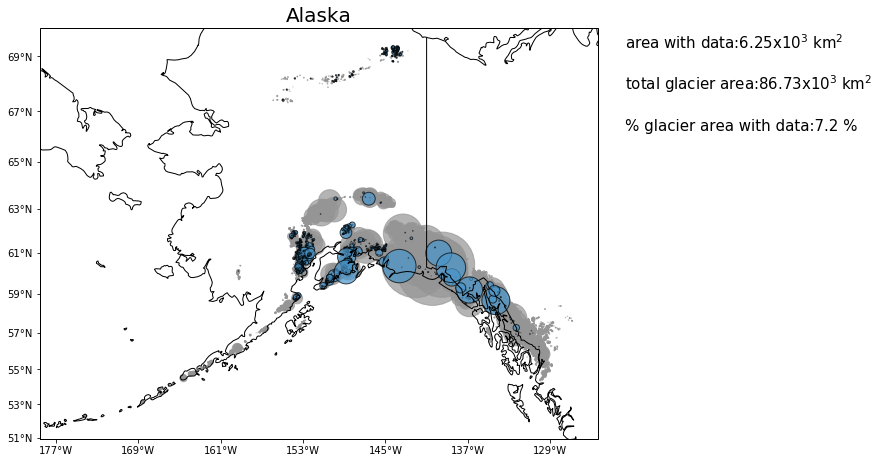

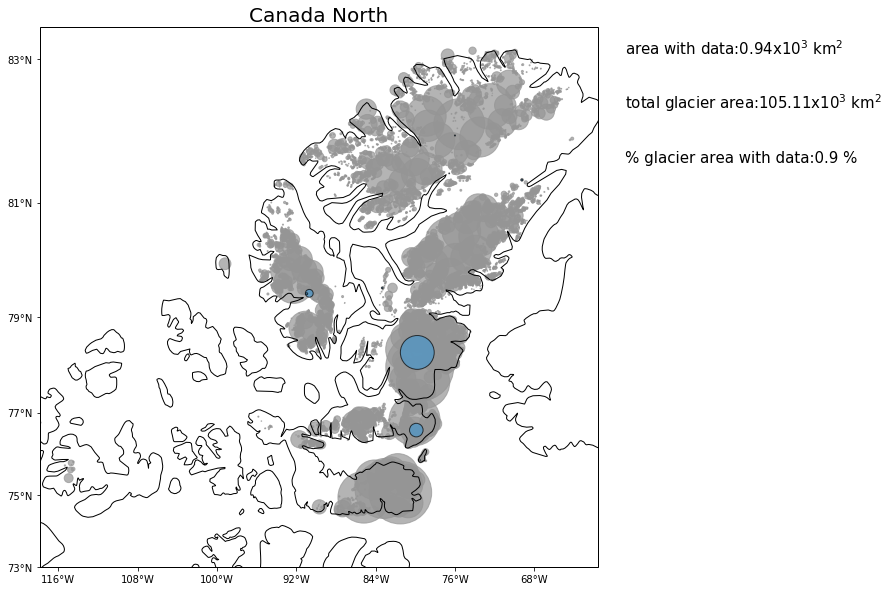

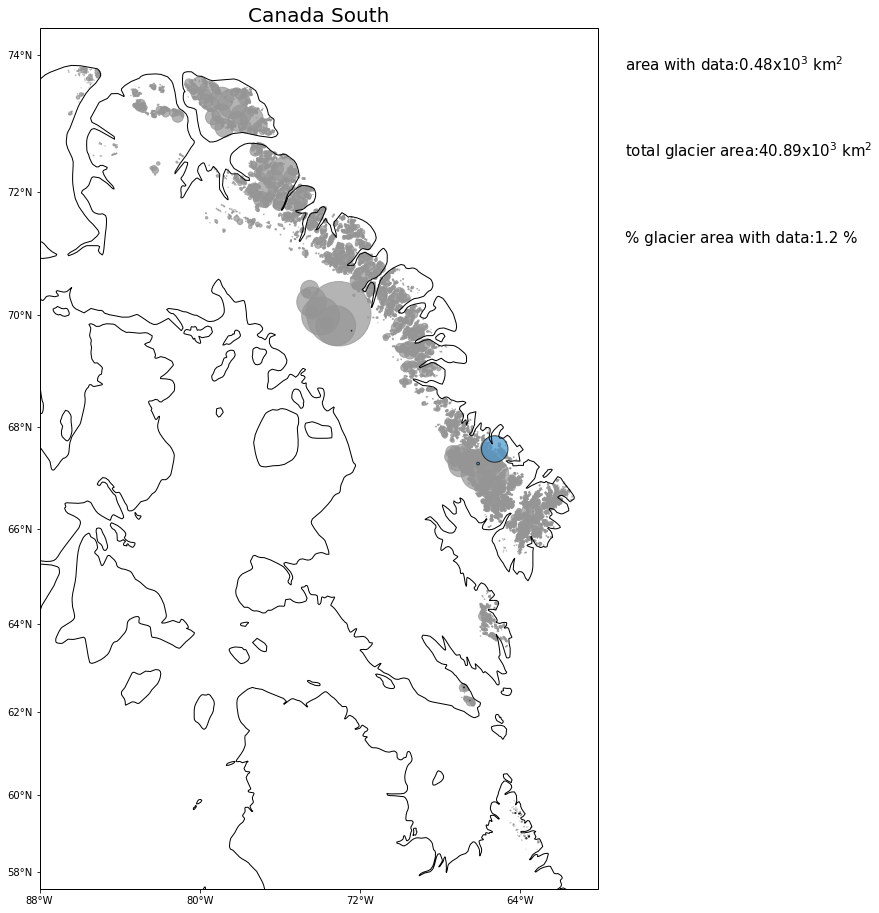

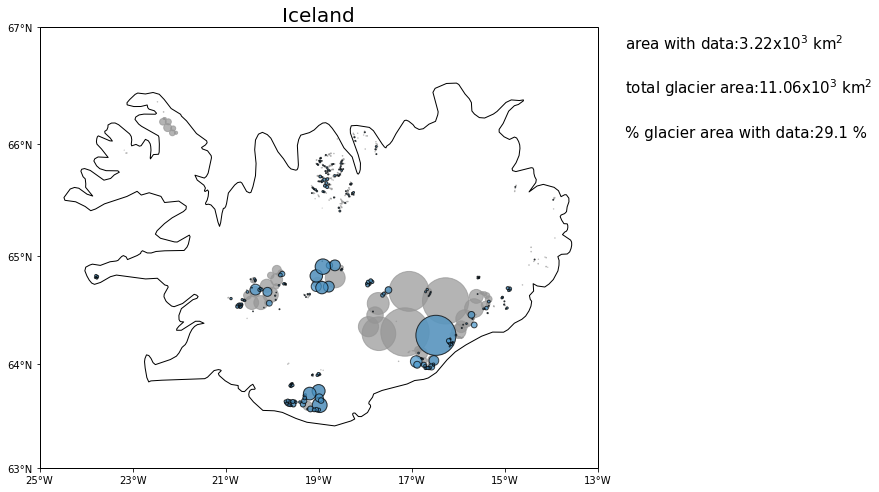

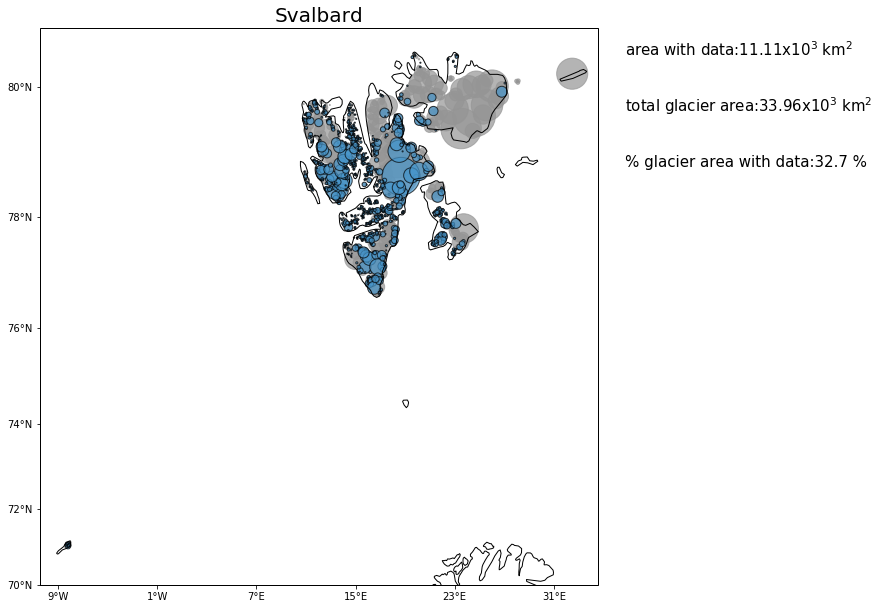

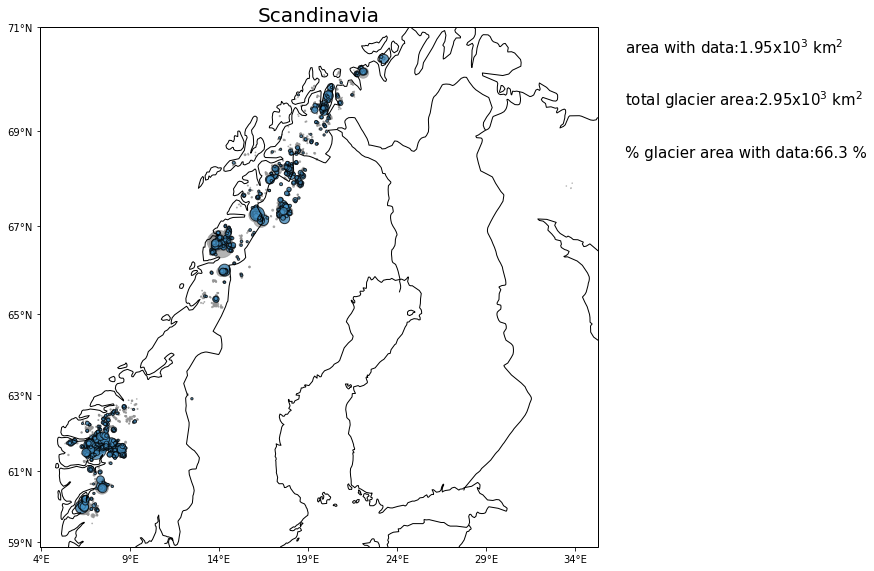

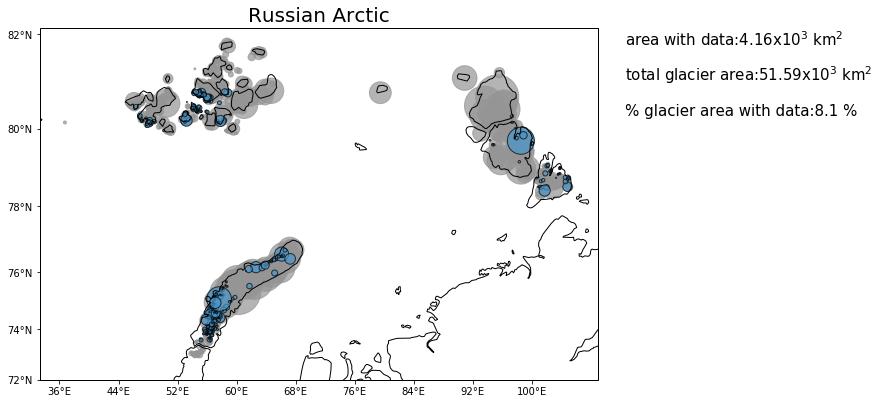

In [39]:
#combine measurement data with lat/long data for visualizaiton purposes 
measured=pd.merge(id_dict,rgi[['RGIId','Area']], left_on='RGI_ID',right_on='RGIId',how='left')[['RGI_ID','REGION_NO','LATITUDE','LONGITUDE','Area']]

dat_fp=sorted(glob.glob(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI/00_rgi60_attribs/*.csv'))

#more detailed coumentation can be found above, when first map is created 

#create objects so that lat/long coordinates can be represented with projection
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()



for x in regions:      

    #from the filepath (hyps_fp) list, select file that matches the exact region number 
    reg_df=pd.read_csv([y for y in dat_fp if '0' +str(x) + '_rgi60' in y][0], encoding='latin')

    #create bounding box for glaciers in each region based on the min and max lat/long of glaciers +/- degree for better visualization 
    east = int(round(reg_df['CenLon'].min())) - 1
    west = int(round(reg_df['CenLon'].max())) + 1
    south = int(round(reg_df['CenLat'].min())) - 1
    north = int(round(reg_df['CenLat'].max())) + 1


    #if size of glaciers to be represented by plot, magnitude of each area is x1.5 for better visualization 
    #10x in Scandinavia due to small size of glaciers 
    
    mag=1.5
    
    #specify spread of x and y ticks on plot 
    if x == 6: 
        xtick=2
        ytick=1
    elif x ==8:
        xtick=5
        ytick=2
        mag=10
    else:
        xtick=8
        ytick=2
        
    #select the glaciers in specific region that have measurements 
    temp=measured[measured['REGION_NO']==x]   
    fig, ax=plt.subplots(1,1, figsize=(10,20), subplot_kw={'projection': ccrs.Mercator()})

    #add land features 
    ax.add_feature(land_50m)
    ax.add_feature(borders_50m)


    
    #plot all glaciers in region and glaciers with measurements 
    ax.scatter(reg_df['CenLon'],reg_df['CenLat'], transform=projection, 
                           s=reg_df['Area']*mag, alpha=0.7, c=np.full(len(reg_df),colorleg['neutral']))
    
    ax.scatter(temp['LONGITUDE'],temp['LATITUDE'], transform=projection, s=temp['Area']*mag, 
                alpha=0.7, edgecolor='black', c=colorleg['glacier'])


    #add lat/long boinding boxes     
    ax.set_xticks(np.arange(round(east),round(west)+1,xtick), crs=projection)
    ax.set_yticks(np.arange(round(south),round(north)+1,ytick), crs=projection)
    ax.text(1.05,.95,'area with data:' + str(round((np.sum(temp['Area']))/1000,2)) +'x10$^{3}$ km$^{2}$',
        horizontalalignment='left',transform=ax.transAxes, fontsize=15)
    ax.text(1.05,.85,'total glacier area:' + str(round((np.sum(reg_df['Area']))/1000,2)) +'x10$^{3}$ km$^{2}$',
        horizontalalignment='left',transform=ax.transAxes, fontsize=15)
    ax.text(1.05,.75,'% glacier area with data:' + str(round(((np.sum(temp['Area']))/(np.sum(reg_df['Area'])))*100,1)) +' %',
        horizontalalignment='left',transform=ax.transAxes, fontsize=15)
    #convert labes to lat/long 
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_title(regions[x][0],fontdict={'fontsize':20})
    ax.set_title(regions[x][0],fontdict={'fontsize':20})
    
    plt.show()

This map shows the spatial distribution of glaciers which have data available for calibration. 

Scandinavia, Svalbard, and Iceland all have a reasonable number of measurements which cover 66, 32, and 29% of their total glacier area, respectively. While substantially fewer, Russian Arctic and Alaska both still have a reasonable number of measurements for analysis (8.1 and 7.2%, respectively). Arctic Canada North and South have the fewest number of measurements with 0.9 and 1.2 % of total glacier area covered by observational measurements. This data scarcity will have to be taken into account when modelling. 

Now, let's take a look at [specific mass balance](#specific_massbal) calculated with observational mass balance data in each of these regions. 

Text(0.96, 0.5, '% Area Coverage')

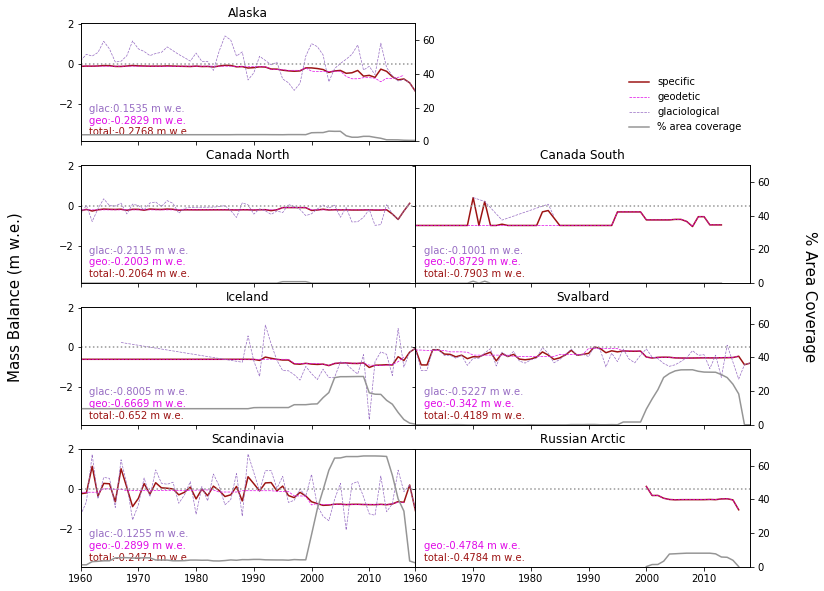

In [40]:
#create figure for subplots 
fig, ax=plt.subplots(4,2, sharex='all', sharey='all', figsize=(12,10))
fig.subplots_adjust(hspace=0.2,wspace=0)
ax = ax.ravel()

#isolate geo, glac, and full mass bal for each region 
for counts, x in enumerate(regions):
    full_temp=full_final[full_final['REGION_NO']==x]
    geo_temp=geo_final[geo_final['REGION_NO']==x]
    glac_temp=glac_final[glac_final['REGION_NO']==x]
    
    #skip plot 1 for better visualization 
    if counts >0: 
        counts+=1
    
    #plot full massbal
    ax[counts].plot(full_temp['Year'],full_temp['Spec_Massbal'],c=colorleg['massbal'], lw=1.5)
    #create a secondary y axis to plot total area coverage 
    ax2=ax[counts].twinx()
    ax2.set_ylim([0,70])
    #plot geo mass bal if it exists in region
    if len(geo_temp) > 0: 
        ax[counts].plot(geo_temp['Year'],geo_temp['Spec_Massbal'],c=colorleg['geo'],ls='--', lw=0.7)
        ax[counts].text(0.025,.15,'geo:' + str(round(np.mean(geo_temp['Spec_Massbal']),4)) +' m w.e.',
            horizontalalignment='left',transform=ax[counts].transAxes, c=colorleg['geo'])
    #plot glac mass bal if it exists in the region 
    if len(glac_temp) > 0: 
        ax[counts].plot(glac_temp['Year'],glac_temp['Spec_Massbal'],c=colorleg['glac'], ls='--', lw=0.7)
        ax[counts].text(0.025,.25,'glac:' + str(round(np.mean(glac_temp['Spec_Massbal']),4)) +' m w.e.',
            horizontalalignment='left',transform=ax[counts].transAxes, c=colorleg['glac'])
    #set years to be consistent for all regions 
    ax[counts].set_xlim([1960,2018])
    #remove secondary y-axis ticks where they overlap with plot 
    if counts in [2,4,6]:
        ax2.get_yaxis().set_visible(False)
    ax[counts].set_title(regions[x][0])
    ax[counts].text(0.025,.05,'total:' + str(round(np.mean(full_temp['Spec_Massbal']),4)) +' m w.e.',
        horizontalalignment='left',transform=ax[counts].transAxes, c=colorleg['massbal'])
    ax2.plot(full_temp['Year'],(full_temp['Area']/regions[x][1])*100, c=colorleg['neutral'],lw=1.5)
    ax[counts].axhline(0,ls=':',c=colorleg['neutral'])
    
    #make legend 
    if counts ==0:
        ax[counts].legend(['specific','geodetic','glaciological'], loc=4, bbox_to_anchor=(1.935, 0.13),frameon=False) 
        ax2.legend(['% area coverage'],loc=4,bbox_to_anchor=(2, 0),frameon=False)
    
fig.delaxes(ax[1])
fig.text(0.04, 0.5, 'Mass Balance (m w.e.)', va='center', rotation='vertical', fontsize=15)
fig.text(0.96, 0.5, '% Area Coverage', va='center', rotation=270, fontsize=15)


The mean regional mass balance for 1960-2018 is smallest in Arctic Canada North (-0.206 m w.e.) (it lost the least mass over 1960-2018 in comparison to all other regions of interest). Arctic Canada South has the largest mass balance, but because the region has so few data (< 0.001% of glacier are have data available), it is unlikely that this value accurately represents the region's actual mass balance. Iceland has the largest mass balance, following Arctic Canada South (-0.652 m w.e.). 

A comparison of Arctic Canada North and South suggests that even though Arctic Canada North has less of its glacier area covered by observational measurements, the mass balance from these measurements is more reliable in comparison to the measurements in Arctic Canada South, as they are repeated and consistent between 1960-2018, while the measurements in Arctic Canada South only span a very short period of time. 

In each region, there is discrepancy between the geodetic and glaciological mass balance. The glaciological mass loss is larger in Arctic Canada North, Iceland, and Svalbard, and smaller in Alaska, Arctic Canada South, and Scandinavia. However, the majority of Scandinavia's measurements are glaciological and Arctic Canada South is very data scarce. 

Now that we have an understanding of the nature and structure of the data input into PyGEM, we can move on to model calibration and validation.

# 4. Model Callibration and Validation <a id='Calibration'></a>

Once the model is calibrated using the above data, we can determine how successfully the it can represent our regions of interest by running a simulation and comparing the results to a test dataset.

We will compare the PyGEM simulated 1980-2016 mass balance to regional mass balance results published by Zemp et al. ([2019](#Zemp_2019)), considered to be the most accurate assessment of mass balance to date.

Let's load these datasets up. Because the files are separated by RGI region, we'll first create a list of filepaths.

In [41]:
test_fp=sorted(glob.glob(filepath+'/Project_Data/Calibration_Outputs/*.nc'))

valid_fp=sorted(glob.glob(filepath+'/Project_Data/Calibration_Outputs/ZEMP_Data/*.csv'))

The modelled/test data are output as NetCDF files, which have the same structure as the climate data. 

The validation data from Zemp are provided as csv files. Let's see how these data are input. 

In [42]:
temp=pd.read_csv(valid_fp[0])
temp[:30]

################################################################################################  \
0                                # Zemp et al. (2019)                                                 
1   #                                             ...                                                 
2   # Glacier mass changes for region 01-ALA      ...                                                 
3   #                                             ...                                                 
4   # Year: hydrological year                     ...                                                 
5   # B_INT_mwe: specific mass-change rate (m w.e....                                                 
6   # B_AVG_mwe: specific mass-change rate (m w.e....                                                 
7   # B_AW_mwe: specific mass-change rate (m w.e. ...                                                 
8   # sig_Glac_mwe: uncertainty related to glaciol...                                                 
9   # sig_Geod_mwe: uncertainty related to geodeti...                                                 
10  # sig_Int_mwe: uncertainty related to regional...                                                 
11  # sig_Total_mwe: total uncertainty of  specifi...                                                 
12  # Area_AW_ref_km2: regional area (km2) based o...                                                 
13  # Area_LW_km2: regional area (km2) based on RG...                                                 
14  # dM_INT_Gt: regional mass-change rate (Gt yr-...                                                 
15  # dM_AVG_Gt: regional mass-change rate (Gt yr-...                                                 
16  # dM_AW_Gt: regional mass-change rate (Gt yr-1...                                                 
17  # sig_Glac_Gt: uncertainty related to glaciolo...                                                 
18  # sig_Geod_Gt: uncertainty related to geodetic...                                                 
19  # sig_Int_Gt: uncertainty related to regional ...                                                 
20  # sig_Area_Gt: uncertainty related to regional...                                                 
21  # sig_Crossed_Gt: 2nd order crossed uncertaint...                                                 
22  # sig_Total_Gt: total uncertainty of regional ...                                                 
23  #                                             ...                                                 
24  ##############################################...                                                 
25                                                NaN                                                 
26                                               Year                                                 
27                                               1950                                                 
28                                               1951                                                 
29                                               1952                                                 

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0    Supplementary Data Table                     ...        NaN        NaN   
1                                                 NaN        NaN        NaN   
2                                                 NaN        NaN        NaN   
3                                                 NaN        NaN        NaN   
4                                                 NaN        NaN        NaN   
5                                         ref. run  #        NaN        NaN   
6                                                 NaN        NaN        NaN   
7                                                 NaN        NaN        NaN   
8                                                 NaN        NaN        NaN   
9                  

If we look at the structure of the Zemp validation data, it does not have consistent rows/columns until row 26. We therefore would need to remove the first 25 columns to get at the data we are interested in. 

Now, we can perform some basic tests to see how closely PyGEM modelled regional mass balance matches to the Zemp validation data. 

These results were tested for statistical similarity using an empirical test which determined whether the mean and standard deviation of compared datasets were within range of each other.

Due to the relatively short time span (therefore relatively few data) and large amplitude of variability, we could not apply a more rigorous statistical test.

[Text(0, 0, 'Alaska'),
 Text(0, 0, 'Can_N'),
 Text(0, 0, 'Can_S'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Svalbard'),
 Text(0, 0, 'Scand'),
 Text(0, 0, 'Russia')]

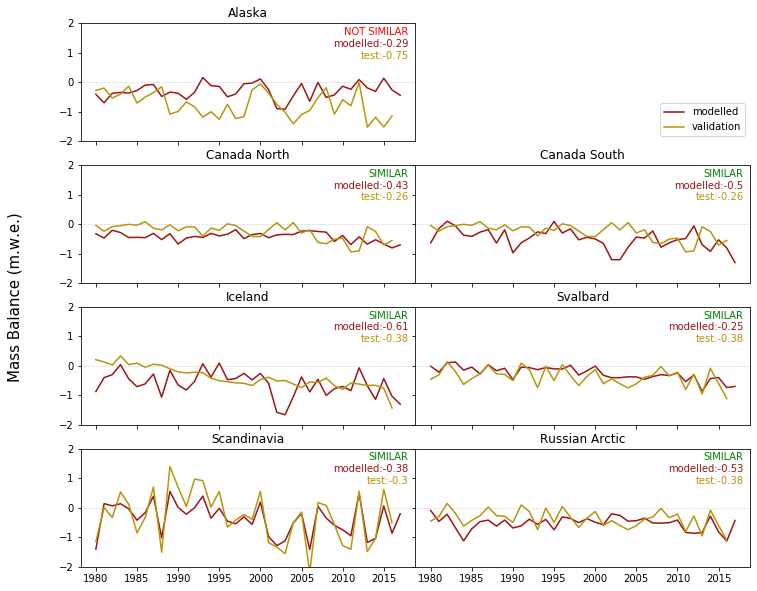

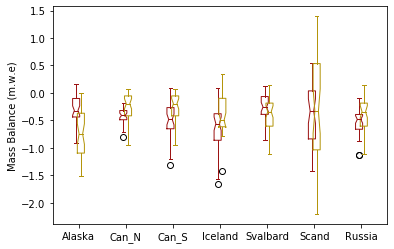

In [43]:
valid_mass=[]
test_mass=[]


#create a plots and histograms 
fig, ax=plt.subplots(4,2, sharex='all', sharey='all', figsize=(12,10))
fig.subplots_adjust(hspace=0.2,wspace=0)
ax = ax.ravel()

fig2, ax2=plt.subplots() 

for counts, x in enumerate(regions):
    test=nc.Dataset(list(compress(test_fp, ['R'+str(x)+'_' in i for i in test_fp]))[0])
    
    #extract area and mass balance data 
    test_massbal=test['massbaltotal_glac_monthly'][:,:,0]
    #area is calculated at the beginning of every water year, so need to remove 1st year 
    test_area=test['area_glac_annual'][:,1:,0] 
       
    #remove Jan Meyen glacers from savalbrd  
    if x ==7: 
        test_massbal=test_massbal[:1567,:]
        test_area=test_area[:1567,:]
    
    test_year=test['year'][:]
    valid=pd.read_csv(list(compress(valid_fp, ['_'+str(x)+'_' in i for i in valid_fp]))[0],skiprows=27)
    #will need to explore/show how to clean columns 
    valid.columns=valid.columns.map(lambda t: t.strip())
    valid=valid[(valid['Year']>=1980)&(valid['Year']<2018)]
    
    
    #create annual, area weighted mass balance from test data 
    massbal_annual=(np.sum(test_massbal.reshape(-1,12),axis=1)).reshape(len(test_massbal),len(test_year))
    test_aw=np.sum(((massbal_annual*test_area)/np.sum(test_area,axis=0)),axis=0)
    
    #extract validation data 
    valid_mass.append(valid['INT_mwe'])
    test_mass.append(test_aw)
    
    #skip plot 1 for visualization purposes 
    if counts>0:
        counts+=1
        
    ax[counts].plot(test_year,test_aw, c=colorleg['massbal'], label='modelled')
    ax[counts].plot(valid['Year'],valid['INT_mwe'], c=colorleg['valid'],label='validation')
    ax[counts].axhline(0,ls=':',c=colorleg['neutral'], lw=0.5)
    ax[counts].set_ylim([-2,2])
    ax[counts].set_title(regions[x][0])
    
    #since doing boxplots at the same time, need to undo counts modification 
    if counts>0:
        counts-=1
    
    bp=ax2.boxplot(test_aw, positions=[counts-0.05], notch=True)
    bp2=ax2.boxplot(valid['INT_mwe'], positions=[counts+0.05], notch=True)
    cols=colorleg['massbal']
    for i in [bp,bp2]:
        for t in ['boxes','medians','whiskers','caps','fliers']:
            plt.setp(i[t], color=cols)
        cols=colorleg['valid']
   

    #standard deviation and mean for stats test 
    test_mean=np.mean(test_aw)
    test_std=np.std(test_aw)
    valid_mean=np.mean(valid['INT_mwe'])
    valid_std=np.std(valid['INT_mwe'])


    if (test_mean-test_std <= valid_mean <= test_mean+test_std) or (valid_mean-valid_std
                                                                              <= test_mean <= valid_mean+valid_std) :
        temp=['SIMILAR','g']
    else:
        temp=['NOT SIMILAR','r']
        
    if counts>0:
        counts+=1
    ax[counts].text(0.98,.90, temp[0], horizontalalignment='right',transform=ax[counts].transAxes, c=temp[1])
    ax[counts].text(0.98,.80, 'modelled:' + str(round(test_mean,2)), horizontalalignment='right',transform=ax[counts].transAxes,
                  c=colorleg['massbal'])
    ax[counts].text(0.98,.70, 'test:' + str(round(valid_mean,2)), horizontalalignment='right',transform=ax[counts].transAxes,
                  c=colorleg['valid'])

fig.delaxes(ax[1])
fig.text(0.04, 0.5, 'Mass Balance (m.w.e.)', va='center', rotation='vertical', fontsize=15)
ax[0].legend( loc=4, bbox_to_anchor=(2, 0))
ax2.set_ylabel('Mass Balance (m.w.e)')
ax2.set_xticks([0,1,2,3,4,5,6])
ax2.set_xticklabels(['Alaska','Can_N','Can_S','Iceland','Svalbard','Scand','Russia'])

With the exception of Alaska, all regions meet the statistical requirement. 

Let's investigate why Alaska, specifically, failed.

To do this, let's first break the mass balance up into its individual components of melt, accumulation, frontal ablation, and refreeze.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


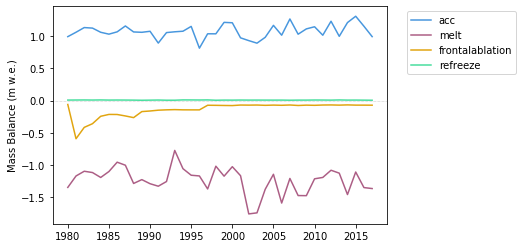

In [46]:
#plot individual components of mass balance through a loop
test=nc.Dataset(list(compress(test_fp, ['R1_' in x for x in test_fp]))[0])
fig,ax=plt.subplots()
area=test['area_glac_annual'][:,1:,0]
year=test['year']
for x in ['acc_glac_monthly', 'melt_glac_monthly',
          'frontalablation_glac_monthly','refreeze_glac_monthly']: 
    temp=test[x][:,:,0]
    temp=(np.sum(temp.reshape(-1,12),axis=1)).reshape(len(temp),len(year))
    temp=np.sum(((temp*area)/np.sum(area,axis=0)),axis=0)
    if x in ['melt_glac_monthly','frontalablation_glac_monthly']:
        temp=-temp
    ax.plot(year,temp,label=x.split('_')[0], c=colorleg[x.split('_')[0]])
ax.legend(loc=1,bbox_to_anchor=(1.4, 1.0))
ax.set_ylabel('Mass Balance (m w.e.)')
ax.axhline(0,ls=':',c=colorleg['neutral'], lw=0.5)
fig.show()



As we can see, glaciers with frontal ablation experience a sharp drop in the magnitude of mass balance very at the beginning of the simulation and then is reduced to ~0. This is likely to be a modelling error rather than something that occurs in the region.

Let's see if any other regions experience this by looking at the normalized percent annual change in mass balance. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


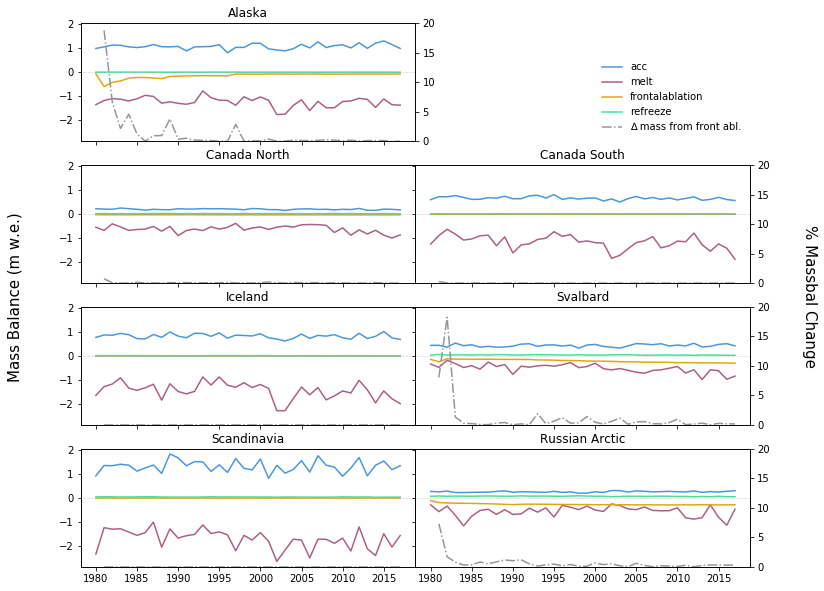

In [48]:
#create figure to plot individual components 
fig, ax=plt.subplots(4,2, sharex='all', sharey='all', figsize=(12,10))
fig.subplots_adjust(hspace=0.2,wspace=0)
ax = ax.ravel()

for counts, x in enumerate(regions):
    #skip plot 1 for visualization purposes 
    if counts >0: 
        counts+=1
    num='R'+str(x)+'_'
    #load relevant validation dataset and extract annual area and year 
    test=nc.Dataset(list(compress(test_fp, [num in i for i in test_fp]))[0])
    area=test['area_glac_annual'][:,1:,0]
    year=test['year']

    
    #in a loop, extract and plot mass bal components 
    temp2=[]
    for y in ['acc_glac_monthly', 'melt_glac_monthly',
              'frontalablation_glac_monthly','refreeze_glac_monthly']: 
        temp=test[y][:,:,0]
        #convert from monthly to area-weighted annual 
        temp=(np.sum(temp.reshape(-1,12),axis=1)).reshape(len(temp),len(year))
        temp=np.sum(((temp*area)/np.sum(area,axis=0)),axis=0)
        temp2.append(temp)
        #convert the mass loss signals to negative 
        if y in ['melt_glac_monthly','frontalablation_glac_monthly']:
            temp=-temp
        ax[counts].plot(year,temp,label=y.split('_')[0], c=colorleg[y.split('_')[0]])
        
        #determine the diff of frontal ablation, the component we are interested in 
        if y == 'frontalablation_glac_monthly':
            dxdy=np.diff(temp)
    
    temp2=np.sum(temp2,axis=0)
    #isolate the jump in that first year 
    dxdy=(dxdy/temp2[1:])*100
    
    #plot front ablation mass bal change on duel y axis 
    ax2=ax[counts].twinx()
    bb=ax2.plot(year[1:],abs(dxdy),c=colorleg['neutral'], ls='-.', label='∆ mass from front abl.')
    ax2.set_ylim([0,20])
    ax[counts].set_title(regions[x][0])
    ax[counts].axhline(0,ls=':',c=colorleg['neutral'], lw=0.5)
    if counts in [2,4,6]:
        ax2.get_yaxis().set_visible(False)

    #legend 
    if counts ==0: 
        ax[counts].legend( loc=4, bbox_to_anchor=(1.887, 0.13),frameon=False) 
        ax2.legend(loc=4,bbox_to_anchor=(2, 0),frameon=False)
fig.delaxes(ax[1])
fig.text(0.04, 0.5, 'Mass Balance (m w.e.)', va='center', rotation='vertical', fontsize=15)
fig.text(0.96, 0.5, '% Massbal Change', va='center', rotation=270, fontsize=15)
fig.show()

In Alaska and Svalbard, the change in glacier mass balance sharply drops from ~ 20% of total normalized mass balance to ~ 0%. These results show us that these regions are likely to have issues with the way in which frontal ablation has been calculated by the model. Both Svalbard and Alaska will therefore be removed from further analysis. 

---

**MODEL CALCULATION OF FRONTAL ABLAITON** 

At present, a single calving value in each region is used to calculate the frontal ablation of all glaciers in that region.  The magnitude of mass loss due to frontal ablation for individual glaciers is proportional to glacier width and thickness at the [terminus](#terminus). In Alaska and Svalbard, mass loss from frontal ablation is relatively large in the first few years of modelling, as we can see from the plots above, due to glaciers with wide and thick glacier termini. Glaciers without observational mass balance measurements (ΔM$_{obs}$) are assigned a mass balance from a regional mass balance ($ΔM_{reg}$) which adjusts to fit observational data such that: 

$∆M_{reg}=\sum_{i=1}^{n}∆M_{obs}+ \sum_{i=1}^{n}∆M_{obs-reg}$ (8)

in which $ΔM_{obs-reg}$ is glacier mass balance of an individual glacier derived from regional mass balance, assigned to glaciers without observational data. PyGEM model physics dictate that regional mass balance must be equal to the sum of mass balance from all individual glaciers. Due to wide and thick (marine-terminating) termini of a number of glaciers in Alaska and Svalbard, the calculated mass loss from frontal ablation for these glaciers are relatively large. During calibration, the model has to compensate for such a low mass balance by increasing ΔM$_{obs-reg}$ so the model can satisfy the conditions of the above. The increased mass balance of these glaciers leads to unconstrained growth over >100 year timespans. 

---

Now that the model has been calibrated, we can test the mass balance sensitivity to temperature and precipitation changes.

# 5. Analysis of Modelled Results <a id='Results'></a>

To model glacier mass balance sensitivity, a synthetic, steady climate was created from the continuous replication of 1995-2015 climate extracted from ERA-Interim. The temperature was increased by 1-3 °C and increased precipitation by 4% °C$^{-1}$ for 2000 to 2100. To determine the relative impact of the 4% °C$^{-1}$ precipitation increase on mass balance sensitivity, model runs were conducted in which temperature was increased by 1-3 °C but precipitation was held at its control scenario.

This modelling created six model outputs for Arctic Canada North, Arctic Canada South, Iceland, Scandinavia, and the Russian Arctic: 

1. 'Control scenario' in which temperature and precipitation were not changed from the 1995-2015 values
2. 'T1P4': In which temperature was increased by 1 ˚C, and precipitation increased by 4%
2. 'T2P8': In which temperature was increased by 2 ˚C, and precipitation increased by 8%
3. 'T3P12': In which temperature was increased by 4 ˚C, and precipitation increased by 12%
4. 'T1P0': In which temperature was increased by 1 ˚C, and there was no increase to precipitation 
5. 'T2P0': In which temperature was increased by 2 ˚C, and there was no increase to precipitation 
6. 'T3P0': In which temperature was increased by 3 ˚C, and there was no increase to precipitation 

From these simulations, we am interested in answering the following, which may help us better understand the magnitude and the drivers of mass balance sensitivity in these regions: 

1. What is the mass balance sensitivity, in m w.e. a$^{-1}$ C˚$^{-1}$, of glaciers in the regions of interest? 
2. How does regional glacier volume change under these different simulated climate scenarios? 
3. How much does the removal of the 4% °C$^{-1}$ impact mass balance? 
4. How do the individual components of mass balance (melt, accumulation, frontal ablation, and refreeze) change with increase in temperature? 

A Wilcoxon Signed Rank Test was used on subsequent datasets to determine whether the mean ranks of the populations differ after temperature increase ([Taheri & Hesamain, 2012](#Taheri_2012)). 

Because PyGEM stores model results in NetCDF format, we will first start by extracting the results so that they are more readily available and then create a list of filepaths for the folder in which all the models are stored in order to extract the relevant information.

We will create two lists from the extracted data: a list that stores the mean 2000-2100 mass balance for individual glaciers in each region across all climate scenarios, and a list that stores annual mass balance between 2000 and 2100 for each region across each scenario.

In [49]:
#make a list of filepaths to load data
dat_fp=sorted(glob.glob(filepath+'/Project_Data/Modelled_Data/*.nc'))

#make empty lists of 2 different structures: regional annual mass bal, and glacier-specific mass bal
full_glac=[]
full_annual=[]

#loop by temp simulation scenario 
for temp_sim in [0, 1, 2, 3]:
    #create simulation-specific lists to append to
    reg_annual=[]
    reg_glac=[]
    prec_sim=temp_sim*4 
    #make filepath list of specific climate scenario for all regions 
    scen_fp=[x for x in dat_fp if 'T'+str(temp_sim)+'_P'+str(prec_sim) in x]
    print('T'+str(temp_sim)+'_P'+str(prec_sim))
    #create loops for each region in specific scenario 
    for reg in [3,4,6,8,9]:
        #load specific region in specific scenario and extract area, volume, and id data 
        scen=[x for x in scen_fp if 'R'+str(reg) in x]
        print(reg)
        scen=nc.Dataset(scen[0])  
        area=scen['area_glac_annual'][:,1:101,0]
        volume=scen['volume_glac_annual'][:,:100,0]
        glactable=scen['glacier_table'][:]
        year=np.array(range(2000,2100))
        
        #extract mass bal and component data 
        temp_comp=[]
        for t in ['acc_glac_monthly', 'melt_glac_monthly',
          'frontalablation_glac_monthly','refreeze_glac_monthly', 'massbaltotal_glac_monthly']: 
            temp=scen[t][:,:1200,0]
            #convert to annual and area-weigh data 
            temp=np.sum(temp.reshape(-1,12),axis=1).reshape(len(temp),len(year))
            temp2=np.array([np.sum(((temp*area)/np.sum(area,axis=0)),axis=0)])
            temp_comp.append(temp2)
        temp_comp=pd.DataFrame(np.concatenate(temp_comp)).T
        temp_comp.columns=['accumulation', 'melt', 'frontal', 'refreeze', 'massbal']
        
         
        
        #load/add scenarios in which precipitation was not adjusted 
        if temp_sim in [1,2,3]:
            scen=[x for x in dat_fp if 'T'+str(temp_sim)+'_P0' in x]
            scen=[x for x in scen if 'R'+str(reg) in x]
            scen=nc.Dataset(scen[0])  
            massbal=scen['massbaltotal_glac_monthly'][:,:1200,0]
            area=scen['area_glac_annual'][:,1:101,0]
            massbal_annual=np.sum(massbal.reshape(-1,12),axis=1).reshape(len(massbal),len(year))
            noprec_annual=np.sum(((massbal_annual*area)/np.sum(area,axis=0))
                                                     ,axis=0)
        else:
            #for control scenario, to keep columns consistent, will fill with nan values 
            noprec_annual=np.full(100, np.NaN)
    
        #append to regional massbal dataset with relevant data for specific region         
        reg_annual.append(pd.concat([pd.Series(year, name='year'),
                              pd.Series(np.sum(area,axis=0), name='area'),
                              pd.Series(np.sum(volume,axis=0),name='volume'),  
                              pd.Series(np.full(100,reg),name='region'),temp_comp,
                              pd.Series(noprec_annual,name='massbal_noprec')],axis=1))
        
        
        #append to individual glacier dataset wit relevant data for specific region 
        reg_glac.append(pd.concat([pd.Series(glactable[:,1], name='glac_no'), 
                               pd.Series(np.full(len(glactable),reg),name='region'), 
                               pd.DataFrame(glactable[:,2:4], columns=['long','lat']),
                               pd.Series(np.mean(area,axis=1), name='area'),
                               pd.Series(np.mean(temp,axis=1),name='mean_massbal')],axis=1))
        
        
    #append to scenario-specific data 
    full_glac.append(['T'+str(temp_sim)+'_P'+str(prec_sim), pd.concat(reg_glac)])
    full_annual.append(['T'+str(temp_sim)+'_P'+str(prec_sim),pd.concat(reg_annual)])
  

T0_P0
3
4
6
8
9
T1_P4
3
4
6
8
9
T2_P8
3
4
6
8
9
T3_P12
3
4
6
8
9


## 5.1. Visualizing Climate Change Scenarios <a id='Results_Glacmap'></a>

Now that we have compiled lists of relevant information, let's first do a visualization of mean 2000-2100 mass balance of all glaciers in each region of interest. 

Canada North


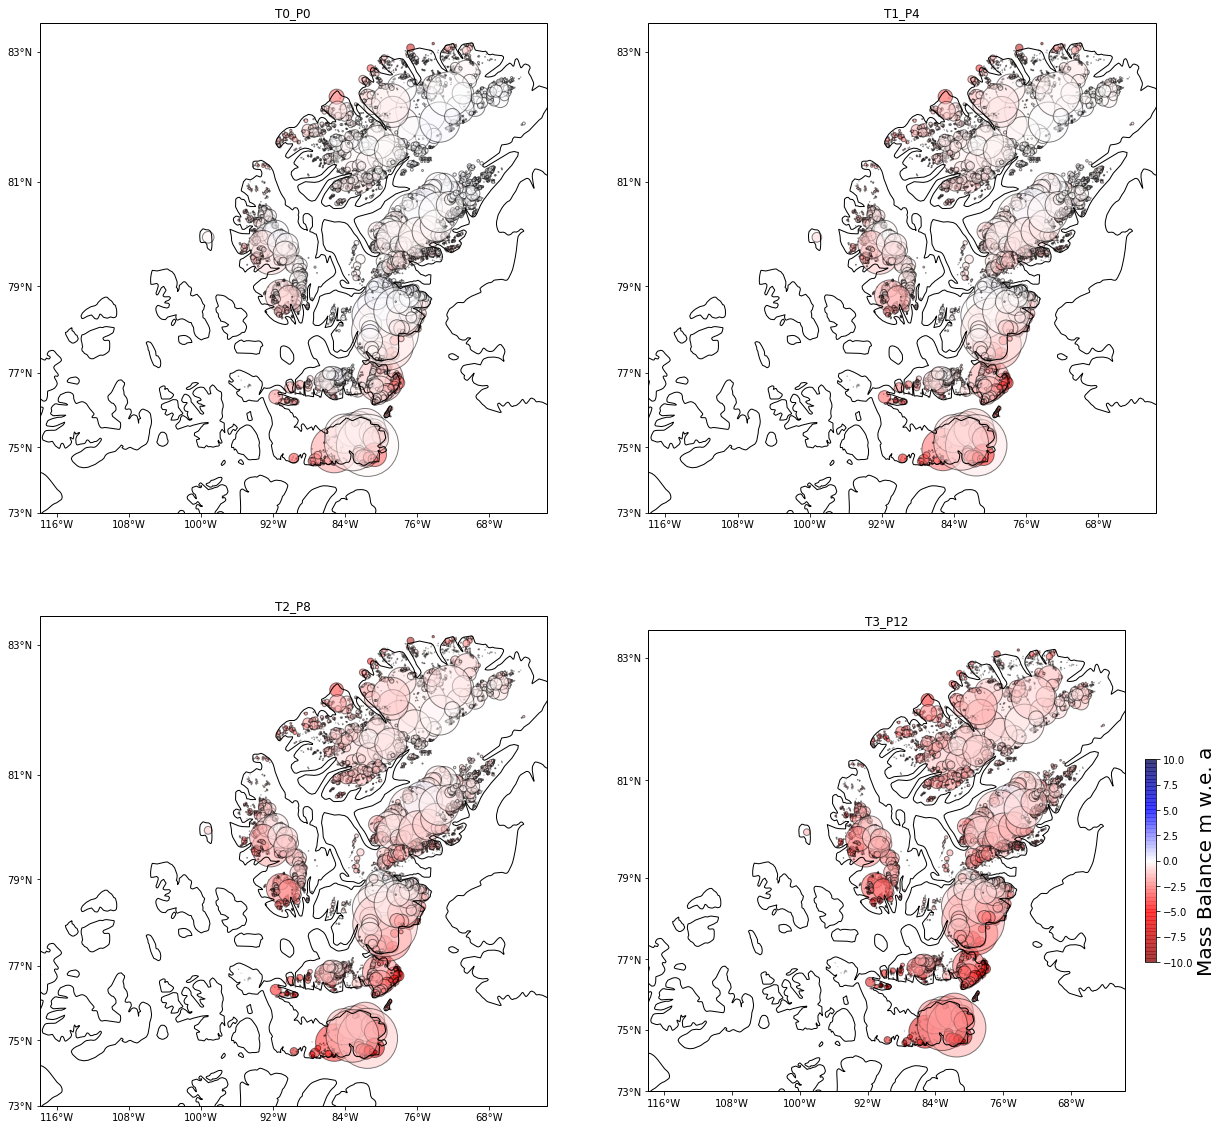

Canada South


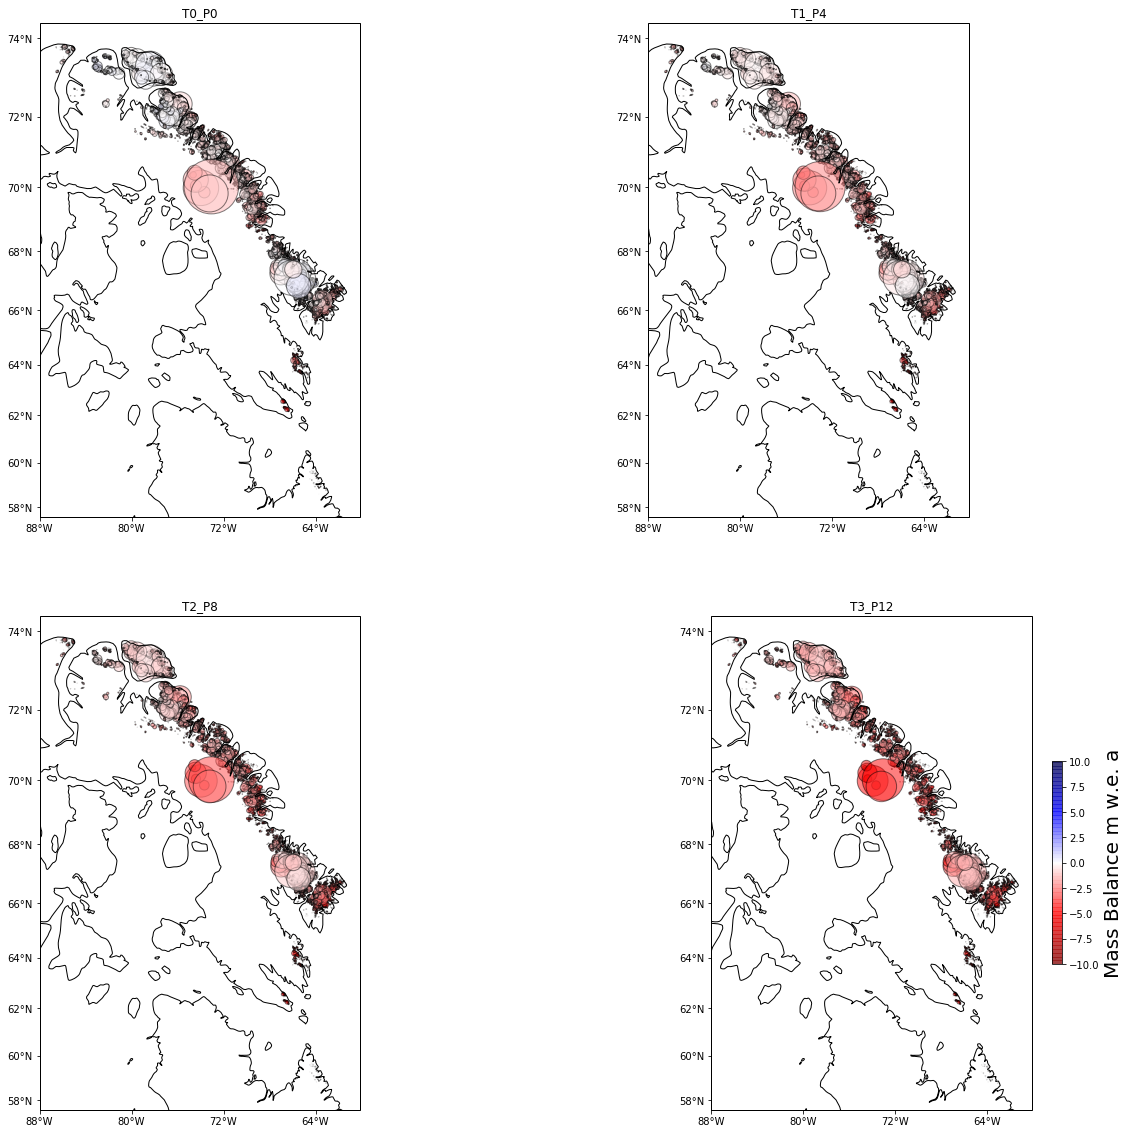

Iceland


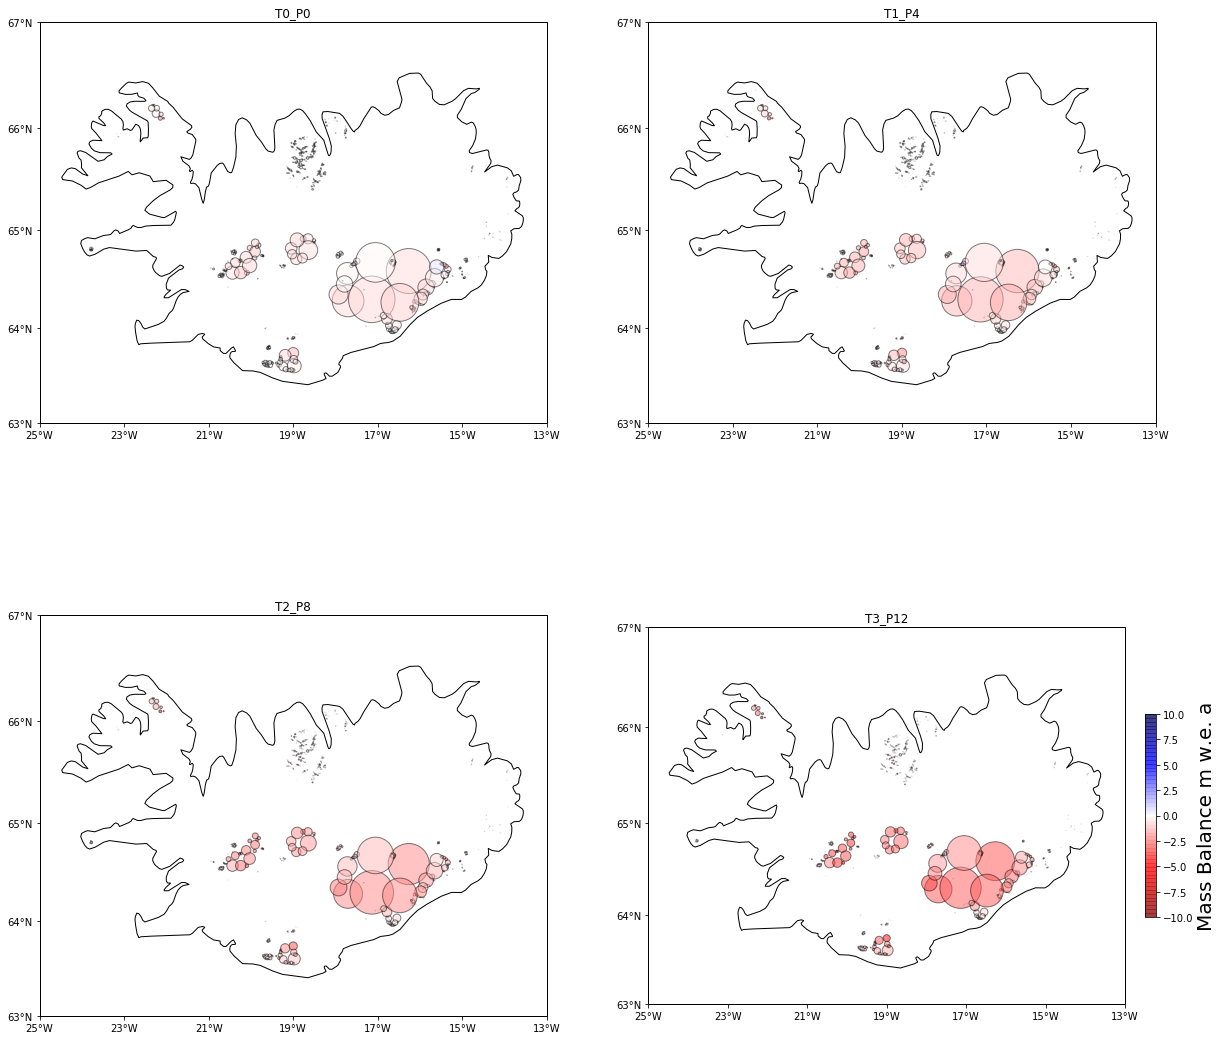

Scandinavia


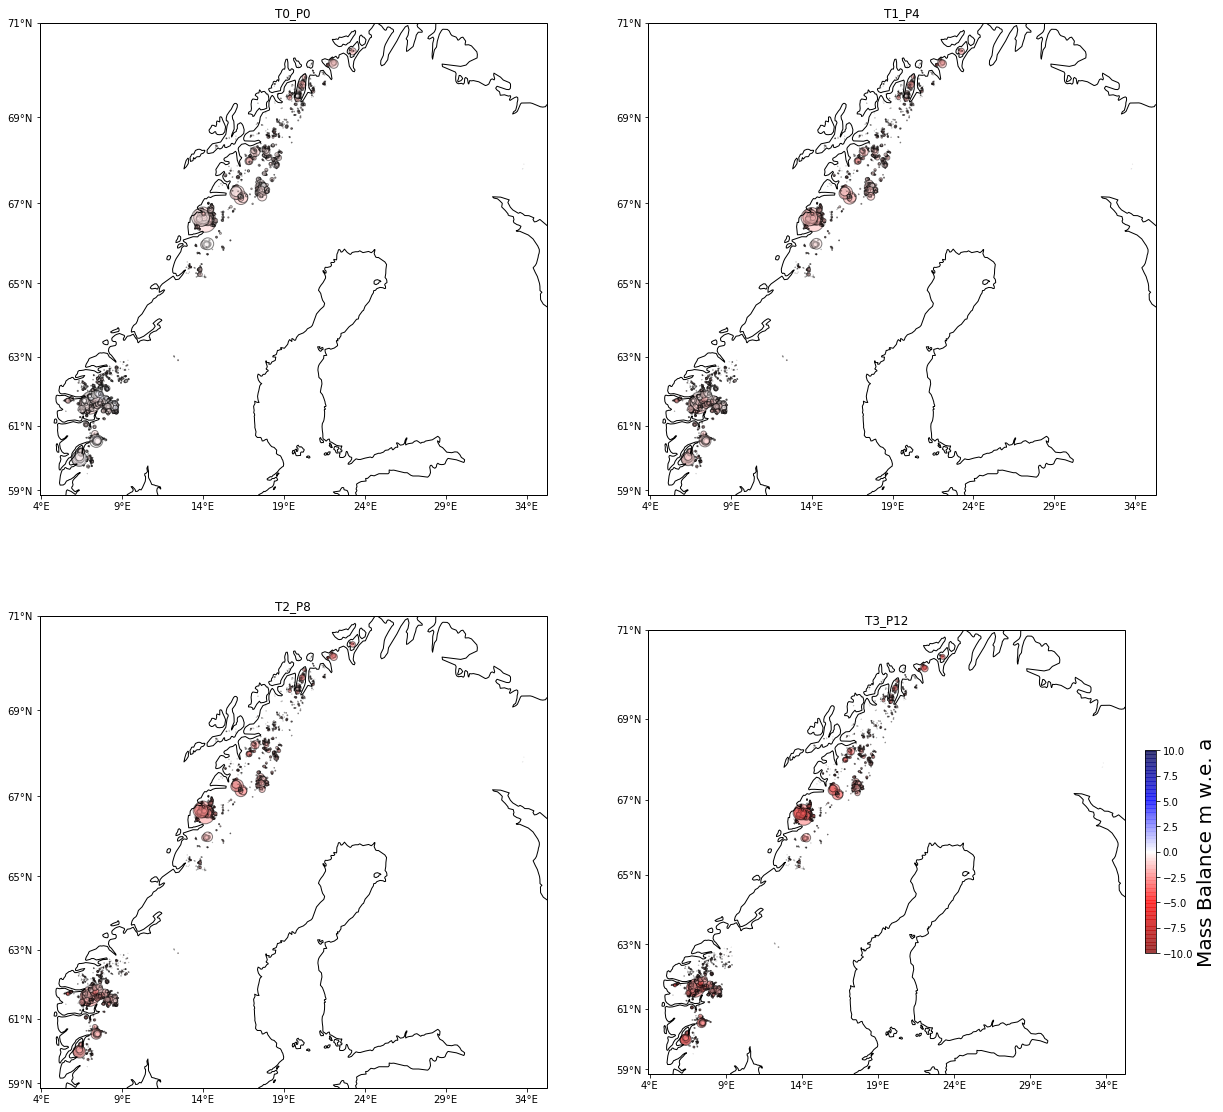

Russian Arctic


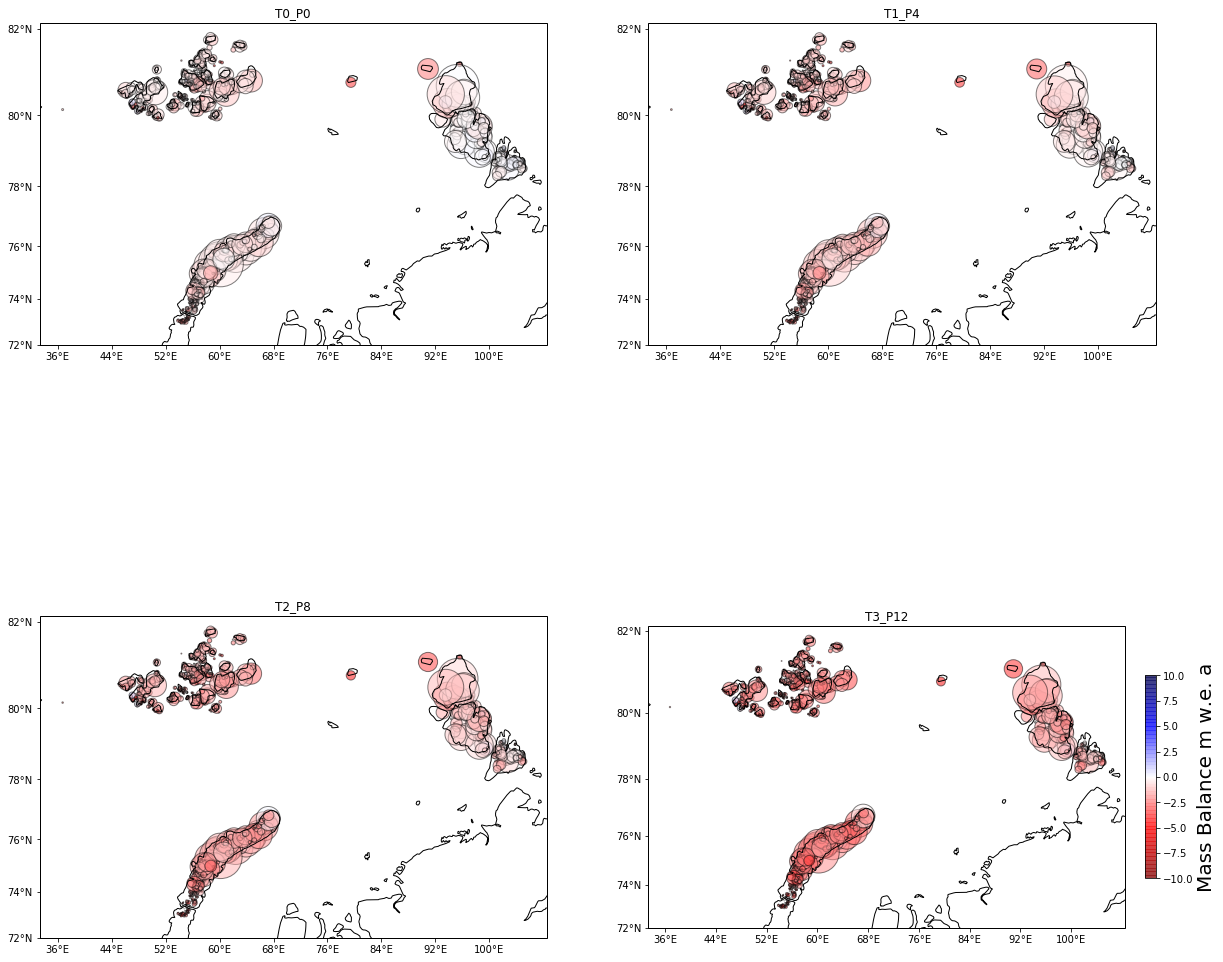

In [50]:
#loop for each region that we can analyze 
for x in [3,4,6,8,9]:
    print(regions[x][0])
    
    #create figure subplot and set up figures like in prior plots 
    fig, ax=plt.subplots(2,2,figsize=(20,20),subplot_kw={'projection':ccrs.Mercator()})
    ax=ax.ravel()
    mag=1.5
    if x == 6: 
        xtick=2
        ytick=1
    elif x ==8:
        xtick=5
        ytick=2
        mag=10
    else:
        xtick=8
        ytick=2
    
    temp=full_glac[0][1]
    temp=temp[temp['region']==x]
    east = int(round(temp['long'].min())) - 1
    west = int(round(temp['long'].max())) + 1
    south = int(round(temp['lat'].min())) - 1
    north = int(round(temp['lat'].max())) + 1
    
    #loop by scenario for each reigon 
    for y in range(len(full_glac)): 
        temp=full_glac[y][1]
        temp=temp[temp['region']==x]
        

        ax[y].add_feature(land_50m)
        scat=ax[y].scatter(temp['long'],temp['lat'],s=temp['area']*mag,c=temp['mean_massbal'],transform=ccrs.PlateCarree(), 
                     alpha=0.5,edgecolor='black',cmap='seismic_r',vmin=-10,
                     vmax=10)
        ax[y].set_xticks(np.arange(east,west+1,xtick), crs=ccrs.PlateCarree())
        ax[y].set_yticks(np.arange(south,north+1,ytick), crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        lat_formatter = LatitudeFormatter()
        ax[y].xaxis.set_major_formatter(lon_formatter)
        ax[y].yaxis.set_major_formatter(lat_formatter)
        ax[y].set_title(full_glac[y][0])

    cbar=plt.colorbar(scat, fraction=0.02, pad=0.04)
    cbar.set_label('Mass Balance m w.e. a', fontsize=20)
    plt.show()

From these visualizations, we can see that large glaciers consistently are less sensitive to temperature increase than smaller glaciers. In addition, while in a control scenario some glaciers have a positive mass balance (they gain mass over the span of a year), T3P12 scenarios do not seem to have any glaciers with positive mass balance. 

## 5.2. Quantifying Mass Balance Sensitivity <a id='Quant_Sens'></a>

Now, let's quantify the mass balance in each region and determine the sensitivity of glaciers in each region to a degree of temperature increase.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


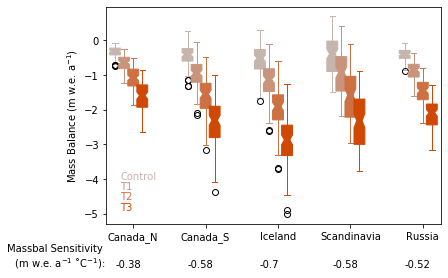

In [53]:
cols={0:'Control',1:'T1',2:'T2',3:'T3'}
fig, ax=plt.subplots()

sens=[]

#loop for each region 
for counts, x in enumerate([3,4,6,8,9]): 
    sens_calc=[]
    #set initial position for boxplot 
    position=counts*4
    #loop for each scenario 
    for y in range(len(full_annual)):
        #subset data by region 
        temp=full_annual[y][1]
        temp=temp[temp['region']==x]
        
        #for stats test, extract prior variable 
        if y > 0: 
            temp2=full_annual[y-1][1]
            temp2=temp2[temp2['region']==x]
            
            stat=st.wilcoxon(np.array(temp['massbal']),np.array(temp2['massbal']))[1]
            
            #write notice if null hypothesis cannot be rejected 
            if stat > 0.05: 
                print(f'Null hypothesis cannot be rejected between {full_annual[y-1][0]} and {full_annual[y][0]} in {regions[x][0]}')
    
        #create boxplots for scnearios 
        bp=ax.boxplot(temp['massbal'], positions=[position], widths=0.6,
                    notch=True,patch_artist=True)
        for t in ['boxes','medians','whiskers','caps','fliers']:
            plt.setp(bp[t], color=colorleg[cols[y]])
        #shift boxplot position to for next climate scenario in region 
        position+=0.5
        
        sens_calc.append(np.mean(temp['massbal']))
        
    #calculate mass balance sensitivity 
    sens2=np.mean([(t-sens_calc[0])/(countz+1) for countz, t in enumerate(sens_calc[1:])])
    ax.text(counts*4,-6.55,str(round(sens2,2)))

    sens.append(sens2)
ax.set_xticks([1,5,9,13,17])
ax.set_xticklabels(['Canada_N','Canada_S','Iceland','Scandinavia','Russia'])
ax.set_ylabel('Mass Balance (m w.e. a$^{-1}$)')
ax.text(-0.5,-6.55, 'Massbal Sensitivity \n (m w.e. a$^{-1}$ ˚C$^{-1}$):', horizontalalignment='right')
pos=-4
for t in cols:
    ax.text(0.3,pos,cols[t],c=colorleg[cols[t]])
    pos-=0.3
fig2.show()
#sens

The mass balance sensitivity is largest in Iceland (-0.7 m w.e a$^{-1}$ ˚C$^{-1}$), and smallest in Arctic Canada North (-0.38 m w.e a$^{-1}$ ˚C$^{-1}$), according to the modelled mass balance calculations. The mass balance sensitivity of the Russian Arctic, Scandinavia, and Arctic Canada South (-0.52, -0.58, and -0.58 m w.e a$^{-1}$ ˚C$^{-1}$, respectively)

According to the boxplots, Scandinavia, Iceland, and Arctic Canada South have large variability in their mean mass balance across all scenarios in comparison to the Russian Arctic and Arctic Canada North.

## 5.3. Impact of Precipitation on Mass Balance Sensitivity <a id='Precip'></a>

Let's see how precipitation influences mass balance by looking at how different the mass balance in these regions is with and without a 4% °C$^{-1}$ precipitation increase.

Text(0, 0.5, 'Mass Balance (m w.e. a)')

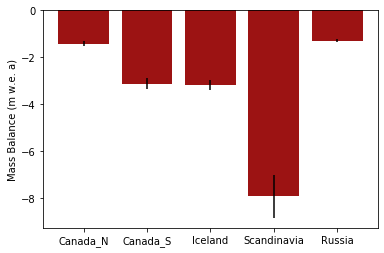

In [54]:
fig, ax=plt.subplots()
#loop for relevant regions 
for counts, x in enumerate([3,4,6,8,9]): 
    meanz=[]
    #loop for relevant climate scenarios
    for y in [1,2,3]: 
        #calculate mean relative % diff
        temp=full_annual[y][1]
        temp=temp[temp['region']==x]
        meanz.append(abs(np.mean(temp['massbal'])-np.mean(temp['massbal_noprec']))/
                     ((np.mean(temp['massbal'])+np.mean(temp['massbal_noprec']))/2))
        
        #conduct stats test 
        stat=st.wilcoxon(np.array(temp['massbal']),np.array(temp['massbal_noprec']))[1]
            
        if stat > 0.05: 
            print(f'Null hypothesis cannot be rejected {full_annual[y][0]} precitionation/no precipitation simulations in {regions[x][0]}')
    
    #plot barplots as %
    ax.bar(counts,np.mean(meanz)*100, yerr=np.std(meanz)*100, color=colorleg['massbal'])
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['Canada_N','Canada_S','Iceland','Scandinavia','Russia'])
ax.set_ylabel('Mass Balance (m w.e. a)')
        

The largest difference in mass balance with and without precipitation increase is in Scandinavia, followed by Iceland and Arctic Canada South. Arctic Canada North and the Russian Arctic both change relatively little with the addition of precipitaiton. 

## 5.4. Regional Volume Change Across Climate Scenario <a id='Volume'></a>

Let's see what further information we can gather from looking at how the volume changes over time. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


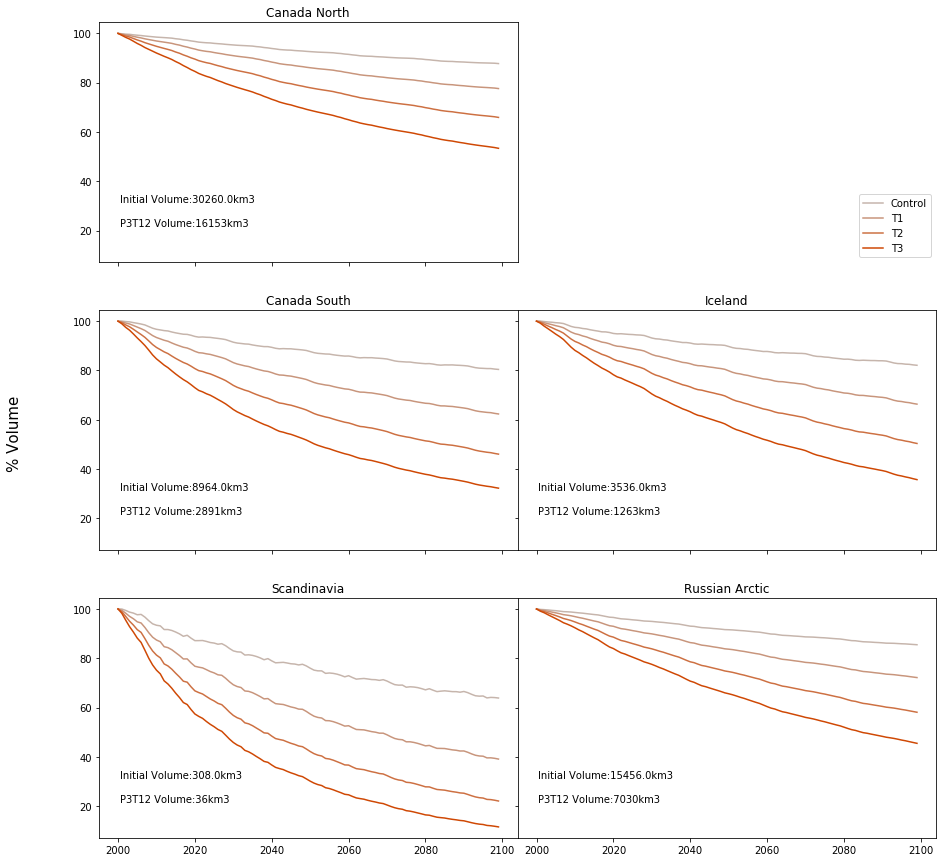

In [55]:
#create figure object 
fig,ax=plt.subplots(3,2, sharex='all', sharey='all' , figsize=(15,15))
fig.subplots_adjust(hspace=0.2,wspace=0)
ax = ax.ravel()

#loop for regions 
for counts, x in enumerate([3,4,6,8,9]): 

    if counts>0:
        counts+=1
    colz=1
    
    #plot volume as % of initial volume 
    for y in range(len(full_annual)): 
        temp=full_annual[y][1]
        temp=temp[temp['region']==x]
        ax[counts].plot(temp['year'], (temp['volume']/temp['volume'][0])*100, label=cols[y], c=colorleg[cols[y]])
        
    ax[counts].set_title(regions[x][0])
    ax[counts].text(0.05,0.25,'Initial Volume:'+ str(round(temp['volume'][0]))+'km3',transform=ax[counts].transAxes)
    ax[counts].text(0.05,0.15,'P3T12 Volume:'+ str(round(list(temp['volume'])[-1]))+'km3',transform=ax[counts].transAxes)
    
fig.delaxes(ax[1])
fig.text(0.04, 0.5, '% Volume', va='center', rotation='vertical', fontsize=15)
ax[0].legend( loc=4, bbox_to_anchor=(2, 0))    
fig.show()

Volume plots indicate that Scandinavia and Iceland, which are the two regions with the least glacier volume in total are the regions to lose the largest percentage of its total volume across temperature increase scenarios, whereas Arctic Canada North and the Russian Arctic, the two regions with the largest total glacier volume, lose the least. 

These results are consistent with the fact that Iceland and Scandinavia have the largest mass balance sensitivity and are therefore likely to lose more of their volume as temperature increases, while Arctic Canada North and the Russian Arctic have a smaller sensitivity and will therefore lose less of their volume with the same increase.

## 5.5. Sensitivity of Mass Balance Components <a id='Sens_Final'></a>

Finally, let's see how each component of mass balance changes with temperature increase. 

We will normalize the mass balance components to make them comparable across regions and climate simulation scenarios.

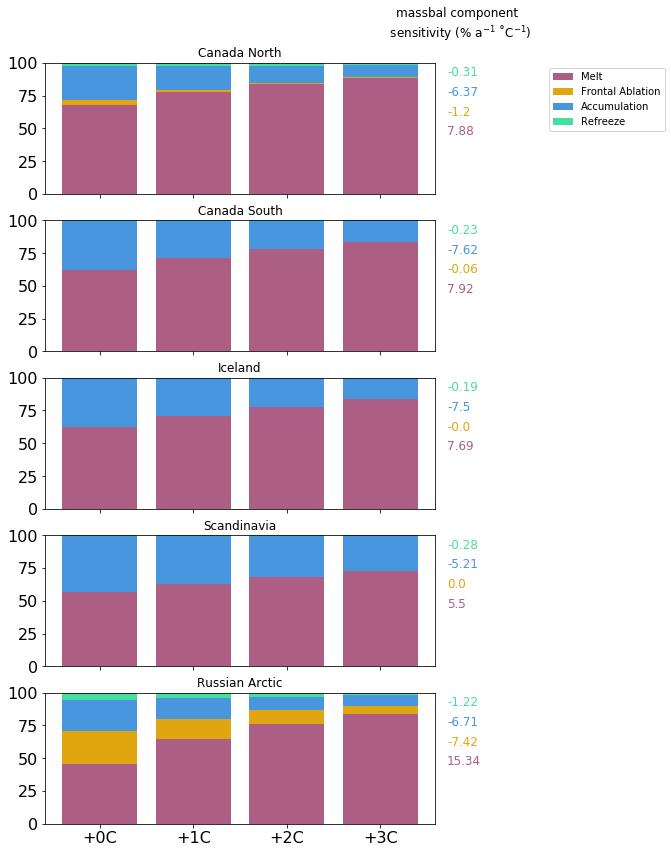

In [56]:
scen=['T0_P0','T1_P4','T2_P8','T3_P12']

barz=np.arange(5)

fig, ax = plt.subplots(5,1, sharex='all', figsize=(7,14))
fig.subplots_adjust(hspace=.2)
ax = ax.ravel()
#loop for relevant areas 
for counts, x in enumerate([3,4,6,8,9]):

    temps=[]
    #loop for scenario 
    for y in range(len(full_annual)):
        temp=full_annual[y][1]
        temp=temp[temp['region']==x]
        
        #extract compponents 
        temp=np.mean(temp[['accumulation', 'melt', 'frontal', 'refreeze']], axis=0)
        #append as normalized %
        temps.append((temp/sum(temp))*100)
    #expand out components for stacked barplot    
    melt=[temps[b][1] for b in [0,1,2,3]]
    front=[temps[b][2] for b in [0,1,2,3]]
    acc=[temps[b][0] for b in [0,1,2,3]]
    ref=[temps[b][3] for b in [0,1,2,3]]
    
    #create stacked barplot 
    ax[counts].bar([0,1,2,3],melt,color=colorleg['melt'])
    ax[counts].bar([0,1,2,3],front, color=colorleg['frontalablation'], bottom=melt)
    ax[counts].bar([0,1,2,3],acc, color=colorleg['acc'],bottom=[i+j for i,j in zip(melt,front)])
    ax[counts].bar([0,1,2,3],ref, color=colorleg['refreeze'],bottom=[i+j+k for i,j,k in zip(melt, front,acc)])
    ax[counts].tick_params(axis='y',labelsize=16, top=False)
    ax[counts].get_yticklabels([-1])
    ax[counts].set_ylim([0,100])
    ax[counts].set_title(regions[x][0])

    #calculate massbal sensitivity of individual components 
    melt=np.mean([(t-melt[0])/(countz+1) for countz, t in enumerate(melt[1:])])
    front=np.mean([(t-front[0])/(countz+1) for countz, t in enumerate(front[1:])])
    acc=np.mean([(t-acc[0])/(countz+1) for countz, t in enumerate(acc[1:])])
    ref=np.mean([(t-ref[0])/(countz+1) for countz, t in enumerate(ref[1:])])
    
    ax[counts].text(1.03,.9, str(round(ref,2)), horizontalalignment='left',transform=ax[counts].transAxes,
                  c=colorleg['refreeze'], fontsize=12)
    ax[counts].text(1.03,.75, str(round(acc,2)), horizontalalignment='left',transform=ax[counts].transAxes,
                  c=colorleg['acc'], fontsize=12)
    ax[counts].text(1.03,.6, str(round(front,2)), horizontalalignment='left',transform=ax[counts].transAxes,
                  c=colorleg['frontalablation'], fontsize=12)
    ax[counts].text(1.03,.45, str(round(melt,2)), horizontalalignment='left',transform=ax[counts].transAxes,
                  c=colorleg['melt'], fontsize=12)

#plt.xlabel('Temperature Increase')
ax[0].text(1.06,1.2, 'massbal component \n sensitivity (% a$^{-1}$ ˚C$^{-1}$)', horizontalalignment='center',transform=ax[0].transAxes,
                   fontsize=12)
ax[0].legend(['Melt','Frontal Ablation','Accumulation','Refreeze'],loc=1, bbox_to_anchor=(1.6, 1))
plt.xticks([0,1,2,3],['+0C','+1C','+2C','+3C'], fontsize=16)
plt.show()


Across all regions, the relative influence of melt on mass balance increases with temperature increase, while the relative influence of all other components, including accumulation, decreases. These results suggest that mass balance across all regions will become increasingly melt-dominated with temperature increase.

# 6. Summary <a id='Summary'></a>

In summary, Iceland is the region with the largest mass balance sensitivity of all the regions studied (-0.7 m w.e. a$^{-1}$ ˚C$^{-1}$). Iceland loses more than 70 % of its total glacier volume after 3 ˚C of temperature increase between 2000 and 2100. As mentioned previously, Iceland is considered a warm, maritime region with a low seasonal temperature amplitude (12 ˚C), relatively high mean annual temperature (1 ˚C) and relatively high levels of accumulation (each glacier receives > 0.5 m of snow annually). The situation is similar in Scandinavia, the second most sensitive region, as it is also considered a warm, maritime region. 

Arctic Canada North is the region with the smallest mass balance sensitivity of all regions studied (-0.38 m w.e. a$^{-1}$ ˚C$^{-1}$) and only loses ~ 50% of it's total glacier volume after 3 ˚C of temperature increase between 2000 and 2100. Arctic Canada North is considered a cold, continental region, with high seasonal temperature amplitude (~ 40 ˚C), low mean annual temperature (-21 ˚C), and relatively low levels of accumulation (each glacier receives ~ 0.15m of snowfall annually). The situation is similar in the Russian Arctic, the second least sensitive region. 

These results suggest that mass balance sensitivity is still dominated by the [degree of continentality](#continentality) in the region. Glaciers in warm, maritime regions are likely to be more sensitive to temperature increase than glaciers in cold, continental regions. This is likely because the temperature in these warm, maritime regions hovers close to 0 ˚C for the majority of the [accumulation season](#accumulation_season) (the period of time snow falls on the glacier). If temperature is increased by even 1-3 ˚C, the temperatures during [accumulation season](#accumulation_season) would increase enough that the precipitation would fall as rainfall and therefore not contribute to glacier mass balance. 

Therefore, these warm, wet regions will melt most rapidly in our warming climate. However, over a longer time period, glaciers in the cold, continental regions will contribute a larger volume of water to sea level rise, as these regions have larger total glacier volumes than small, maritime regions.   



# 7. References <a id='Ref'></a>


<a id='Anderson_2008'></a>Anderson, B., Lawson, W., & Owens, I. (2008). Response of Franz Josef Glacier Ka Roimata o Hine Hukatere to climate change. *Global and Planetary Change, 63*(1), 23–30. https://doi.org/10.1016/j.gloplacha.2008.04.003 

<a id='Anderson_2012'></a>Anderson, B., & MacKintosh, A. (2012). Controls on mass balance sensitivity of maritime glaciers in the Southern Alps, New Zealand: The role of debris cover. *Journal of Geophysical Research: Earth Surface, 117*(1), 1–15. https://doi.org/10.1029/2011JF002064

<a id='Anderson_2010'></a>Anderson, B., Mackintosh, A., Stumm, D., George, L., Kerr, T., Winter-Billington, A., & Fitzsimons, S. (2010). Climate sensitivity of a high-precipitation glacier in New Zealand. *Journal of Glaciology, 56*(195), 114–128. https://doi.org/10.3189/002214310791190929

<a id='Berrisford_2011'></a>Berrisford, P., Kållberg, P., Kobayashi, S., Dee, D., Uppala, S., Simmons, A.J., Poli, P. and Sato, H. (2011), Atmospheric conservation properties in ERA‐Interim. *Quarterly Journal of the Royal Meteorological Socuety, 137*(659), 1381-1399. https://doi:10.1002/qj.864

<a id='Bezeau_2013'></a>Bezeau, P., Sharp, M., Burgess, D., & Gascon, G. (2013). Firn profile changes in response to extreme 21st-century melting at Devon Ice Cap, Nunavut, Canada. *Journal of Glaciology, 59*(217), 981–991. https://doi.org/10.3189/2013JoG12J208

<a id='Bintanja_2017'></a>Bintanja, R., & Andry, O. (2017). Towards a rain-dominated Arctic. *Nature Climate Change* (March), 1–6. https://doi.org/10.1038/nclimate3240

<a id='Braithwaite_1999'></a>Braithwaite, R. J., & Zhang, Y. U. (1999). Modelling changes in glacier mass balance that may occur as a result of climate changes. *Geografiska Annaler, Series A: Physical Geography, 81*(4), 489–496. https://doi.org/10.1111/j.0435-3676.1999.00078.x

<a id='Brenner_2007'></a>Brenner, A. C., DiMarzio, J. P., & Zwally, H. J. (2007). Precision and accuracy of satellite radar and laser altimeter data over the continental ice sheets. *IEEE Transactions on Geoscience and Remote Sensing, 45*(2), 321–331. https://doi.org/10.1109/TGRS.2006.887172

<a id='Cogley_2011'></a>Cogley. (2011). Glossary of Glacier Mass Balance and Related Terms. *Internation Hydrological Programme of the United Nations Educational, Scientific and Cultural Organization (UNESCO), 86*, 114. Retrieved from unesdoc.unesco.org/images/0019/001925/192525e.pdf

<a id='Cohen_2014'></a>Cohen, J., Screen, J. A., Furtado, J. C., Barlow, M., Whittleston, D., Coumou, D., … Jones, J. (2014). Recent Arctic amplification and extreme mid-latitude weather. *Nature Geoscience, 7*(9), 627–637. https://doi.org/10.1038/ngeo2234

<a id='DeWoul_2005'></a>De Woul, M., & Hock, R. (2005). Static mass-balance sensitivity of Arctic glaciers and ice caps using a degree-day approach. *Annals of Glaciology, 42*, 217–224. https://doi.org/10.3189/172756405781813096

<a id='Engelhardt_2015'></a>Engelhardt, M., Schuler, T. V., & Andreassen, L. M. (2015). Sensitivities of glacier mass balance and runoff to climate perturbations in Norway. *Annals of Glaciology, 56*(70), 79–88. https://doi.org/10.3189/2015aog70a004

<a id='Gardner_2013'></a>Gardner, A., Moholdt, G., Cogley, J. G., Wouters, B., Arendt, A. A., Wahr, J., … Paul, F. (2013). A reconciled estimate of glacier contributions to sea level rise: 2003 to 2009. *Science, 340*(6134), 852–857. https://doi.org/10.1126/science.1234532

<a id='Hock_2003'></a>Hock, R. (2003). Temperature index melt modelling in mountain areas. *Journal of Hydrology, 282*(4), 104–115. https://doi.org/10.1016/S0022-1694(03)00257-9

<a id='Horton_2018'></a>Horton, B. P., Kopp, R. E., Garner, A. J., Hay, C. C., Khan, N. S., Roy, K., & Shaw, T. A. (2018). Mapping sea-level change in time, space and probability. *Annual Review of Environment and Resources, 43*, 481–524. https://doi.org/10.1146/annurev-environ-102017-025826

<a id='Huss_2012'></a>Huss, M., & Farinotti, D. (2012). Distributed ice thickness and volume of all glaciers around the globe. *Journal of Geophysical Research: Earth Surface, 117*(4), 1–10. https://doi.org/10.1029/2012JF002523

<a id='Huss_2016'></a>Huss, M., & Fischer, M. (2016). Sensitivity of Very Small Glaciers in the Swiss Alps to Future Climate Change. *Frontiers in Earth Science, 4*(April), 1–17. https://doi.org/10.3389/feart.2016.00034

<a id='Huss_2015'></a>Huss, M., & Hock, R. (2015). A new model for global glacier change and sea-level rise. *Frontiers in Earth Science, 3*(September), 1–22. https://doi.org/10.3389/feart.2015.00054

<a id='Kargel_2005'></a>Kargel, J. S., Abrams, M. J., Bishop, M. P., Bush, A., Hamilton, G., Jiskoot, H., … Wessels, R. (2005). Multispectral imaging contributions to global land ice measurements from space. *Remote Sensing of Environment, 99*(1–2), 187–219. https://doi.org/10.1016/j.rse.2005.07.004

<a id='Noel_2018'></a>Noël, B., van de Berg, W. J., Lhermitte, S., Wouters, B., Schaffer, N., & van den Broeke, M. R. (2018). Six Decades of Glacial Mass Loss in the Canadian Arctic Archipelago. *Journal of Geophysical Research: Earth Surface, 123*(6), 1430–1449. https://doi.org/10.1029/2017JF004304

<a id='Oerlemans_2005'></a>Oerlemans, & Nick. (2005). A minimal model of a tidewater glacier. *Annals of Glaciology, 42*, 1–6. https://doi.org/10.3189/172756405781813023

<a id='Radic_2010'></a>Radić, V., and Hock, R. (2010). Regional and global volumes of glaciers derived from statistical upscaling of glacier inventory data. *Journal of Geophysical Research, 115*(F1), https://doi:10.1029/2009JF001373

<a id='Rounce_2019'></a>Rounce, D. R., Khurana, T., Short, M., Hock, R., & Shean, D. (2019). Quantifying parameter uncertainty in a large-scale glacier evolution model with a Bayesian model - Application to High Mountain Asia. *Frontiers in Earth Science, 23*,https://doi.org/10.3389/feart.2019.00331

<a id='Six_2014'></a>Six, D., & Vincent, C. (2014). Sensitivity of mass balance and equilibrium-line altitude to climate change in the French Alps. *Journal of Glaciology, 60*(223), 867–878. https://doi.org/10.3189/2014jog14j014

<a id='Slangen_2017'></a>Slangen, A. B. A., Palmer, M. D., Ligtenberg, S. R. M., Melet, A., Church, J. A., Richter, K., … Champollion, N. (2017). Evaluating Model Simulations of Twentieth-Century Sea Level Rise. Part I: Global Mean Sea Level Change. *Journal of Climate, 30*(21), 8539–8563. https://doi.org/10.1175/jcli-d-17-0110.1

<a id='Taheri_2013'></a>Taheri, S.M., Hesamian, G. (2013). A generalization of the Wilcoxon signed-rank test and its applications. *Stat Papers 54*, 457–470. https://doi.org/10.1007/s00362-012-0443-4

<a id='Thomson_2016'></a>Thomson, L. I., Zemp, M., Copland, L., Cogley, J. G., & Ecclestone, M. A. (2016). Comparison of geodetic and glaciological mass budgets for White Glacier , Axel Heiberg Island , Canada. *Journal of Glaciology*, 1–12. https://doi.org/10.1017/jog.2016.112

<a id='Woodward_1997'></a>Woodward, J., Sharp, M., & Arendt, A. (1997). The influence of superimposed-ice formation on the sensitivity of glacier mass balance to climate change. *Annals of Glaciology*, 24(1995), 186–190.https://doi.org/10.3189/S0260305500012155

<a id='Zemp_2019'></a>Zemp, M., Huss, M., Thibert, E., Eckert, N., McNabb, R., Huber, J., … Cogley, J. G. (2019). Global glacier mass changes and their contributions to sea-level rise from 1961 to 2016. *Nature, 568*(7752), 382–386. https://doi.org/10.1038/s41586-019-1071-0

<a id='Zemp_2013'></a>Zemp, M., Thibert, E., Huss, M., Stumm, D., Rolstad Denby, C., Nuth, C., … Andreassen, L. M. (2013). Uncertainties and re-analysis of glacier mass balance measurements. *The Cryosphere Discussions, 7*(2), 789–839. https://doi.org/10.5194/tcd-7-789-2013

# 8. Glossary of Terms <a id='Terms'></a>

* **Accumulation Season<a id='accumulation_season'></a>:** The period of time over which a glacier may accumulate mass onto the glacier through precipitation. The accumulation season typically occurs while surface air temperatures are below 0˚C.


* **Albedo<a id='albedo'></a>:** The ratio of total solar radiation that is reflected from the glacier surface to the ratio of total incoming solar radiation across all incidence angles. The higher the surface albedo, the more energy is reflected from the surface.


* **Circum-Arctic<a id='circum_Arctic'></a>:** The region above 60˚N, encompassing all features and land masses. 


* **Climate Reanalysis Product<a id='climate_reanalysis'></a>:** A collection of climate variables that is modelled using weather station data and climate/weather models, typically output in a gridded format. 


* **Debris Cover<a id='debris_cover'></a>:** In glaciology, refers to a glacier that is covered by a layer of rock, ash, or dust. Debris cover impacts glacier surface albedo and rates of ablation.


* **Degree of Continentality<a id='continentality'></a>:** An index that measures regional temperature and circulation patterns. In the context of glaciology, it measures the potential of glaciers to accumulate mass due to precipitation and temperature. 


* **Equirectangular Projection<a id='equirectangular'></a>:** A map projection that maps meridians into straight, vertical lines and circles of latitude to straight, horizontal lines that are all located an equal distance from each other. 


* **Specific Mass Balance<a id='specific_massbal'></a>:** Mass balance per unit area. Useful for studying the climate impacts on glacier mass balance. 


* **Terminus of Glacier<a id='terminus'></a>:** Where the glacier ends, in its direction of flow. Typically the lowest point of the glacier.